In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.font_manager import FontProperties
import seaborn as sns
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, ttest_ind
from scipy.interpolate import interp1d
from matplotlib.ticker import MaxNLocator
from scipy.interpolate import make_interp_spline
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [37]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
path1=r"V:\tnw\bn\gk\GL\Results\QCM-D\20220209_SLb_fromation_new_chips"
file11="\Data_S1_DOPC.txt"
file12="\Data_S2_DOPS.txt"
file13="\Data2_S1_DOPS.txt"
file14="\Data2_S2_DOPC.txt"
path2 =r"V:\tnw\bn\gk\GL\Results\QCM-D\20220210"
file21= "\S1_DOPS.txt"
file22 = "\S2_DOPS.txt"
file23 = "\S3_DOPC.txt"
path3 =r"V:\tnw\bn\gk\GL\Results\QCM-D\20220217"
file31= "\Oct9i1_PC.txt"
file32 = "\Oct9i1_PIP2_1.txt"
file33 = "\Oct9i1_PIP2_2.txt"
file34 = "\Oct9i1_PS.txt"
file35= "\Hex_PIP2_1.txt"
file36 = "\Hex_PIP2_2.txt"
file37 = "\Hex_PS.txt"
path4 =r"V:\tnw\bn\gk\GL\Results\QCM-D\20220223"
file41= "\hex_PIP_GTP.txt"
file42 = "\hex_PIP_no_GTP.txt"
file43 = "\hex_PS_no_GTP.txt"
file44 = "\oct_PIP2_GTP.txt"
file45= "\oct_PIP2_no_GTP.txt"
file46 = "\oct_PS_GTP.txt"
file47 = "\oct_PS_no_GTP.txt"
path5 =r"V:\tnw\bn\gk\GL\Results\QCM-D\20220224"
file51= "\hex_DOPC_GTP.txt"
file52 = "\hex_DOPC_noGTP.txt"
file53 = "\hex_PIP2_GTP.txt"
file54 = "\hex_PIP2_noGTP.txt"
path6 =r"V:\tnw\bn\gk\GL\Results\QCM-D\20220303"
file61= "\hex_GTP1.txt"
file62 = "\hex_GTP2.txt"
file63 = "\hex_GTP3old.txt"
file64 = "\hex_GTPnew1.txt"
file65= "\hex_GTPnew2.txt"
file66 = "\hex_noGTP1.txt"
file67 = "\hex_noGTP2.txt"
path7 = r"V:\tnw\bn\gk\GL\Results\QCM-D\20220310"
file71= "\PIP_hex_GTP_1.txt"
file72 = "\PIP_hex_GTP_2.txt"
file73 = "\PIP_hex_GTP_nospin_1.txt"
file74 = "\PIP_hex_GTP_nospin_2.txt"
file75= "\PIP_hex_noGTP_1.txt"
file76 = "\PIP_hex_noGTP_2.txt"
file77 = "\PIP_hex_noGTP_nospin.txt"

path8= r"V:\tnw\bn\gk\GL\Results\QCM-D\20220316-17_mix"
file81= r"\20220316_mix_50nMhex_freshGTP.txt"
file82= r"\20220316_mix_50nMhex_freshGTP2.txt"
file83= r"\20220316_mix_50nMhex_noGTP.txt"
#####
file84= r"\20220317_mix_50nMhex_GTP.txt"
file85= r"\20220317_mix_50nMhex_GTP2.txt"
file86= r"\20220317_mix_50nMhex_noGTP.txt"
file87= r"\20220317_mix_50nMhex_noGTP2.txt"
####
file88= r"\20220317_mix_50nMhex_GTP3.txt"
file89= r"\20220317_mix_50nMhex_GTP4.txt"
file810= r"\20220317_mix_50nMhex_noGTP3.txt"
file811= r"\20220317_mix_50nMhex_noGTP4_wierd.txt"


path9= r"V:\tnw\bn\gk\GL\Results\QCM-D\20220330\\"
file91 = "50nM_Hex_mix_noGTP_1.txt"
file92 = "50nM_Hex_mix_noGTP_2.txt"
file93 = "50nM_Hex_mix_noGTP_3.txt"
file94 = "50nM_Hex_mix_noGTP_4.txt"
file95 = "50nM_Hex_mix_noGTP_5.txt"
file96 = "50nM_Hex_mix_noGTP_6.txt"
file97 = "50nM_oct_mix_noGTP_1.txt"
file98 = "50nM_oct_mix_noGTP_2.txt"

path10= r"V:\tnw\bn\gk\GL\Results\QCM-D\20220331\\"
file101 = "mormimg_ch1.txt" #mix hex, noGTP
file102 = "mormimg_ch2.txt" #mix hex, noGTP
file103 = "mormimg_ch3.txt" #mix oct, noGTP
file104 = "mormimg_ch4.txt" #mix oct, noGTP
file105 = "afternoon_ch2.txt" #mix hex, 100uL/min noGTP
file106 = "afternoon_ch3.txt" #mix hex, noGTP
file107 = "afternoon_ch4.txt" #mix hex 100nM, noGTP

path11= r"V:\tnw\bn\gk\GL\Results\QCM-D\20220405\\"
file111 = "S1.txt" #mix hex, noGTP
file112 = "S1M.txt" #mix hex, noGTP
file113 = "S2.txt" #mix hex, noGTP
file114 = "S2M.txt"#mix hex, noGTP
file115 = "S3.txt" #mix PS, noGTP
file116 = "S3M.txt"#PS hex, noGTP /bad result
file117 = "S4.txt" #mix PC, noGTP
file118 = "S4M.txt"#PS hex, noGTP / bad result

path12= r"V:\tnw\bn\gk\GL\Results\QCM-D\20220407\\"
file121 = "S1.txt" #Eggmix hex, noGTP
file122 = "S2.txt" #Eggmix hex, noGTP
file123 = "S3.txt" #EggPS hex, noGTP / bad
file124 = "S4.txt" #EggPS hex, noGTP / bad

path13= r"V:\tnw\bn\gk\GL\Results\QCM-D\20220412\\"
file131 = "S1.txt" #mix new PIP2 hex, noGTP
file132 = "S2.txt" #mix new PIP2 hex, noGTP
file133 = "S3.txt" #mix brain PIP2 hex, noGTP
file134 = "S4.txt" #mix brain PIP2 hex, noGTP

path14= r"V:\tnw\bn\gk\GL\Results\QCM-D\20220414\\" #long drying 
file141 = "S1.txt" #mix new PIP2 hex, noGTP
file142 = "S2.txt" #mix new PIP2 hex, noGTP
file143 = "S3.txt" #mix old PIP2 hex, noGTP
file144 = "S4.txt" #mix old PIP2 hex, noGTP


path15= r"V:\tnw\bn\gk\GL\Results\QCM-D\20220531\\"
file151 = "20220531_1_PC.txt" #hex, no GTP all
file152 = "20220531_2_PC.txt" 
file153 = "20220531_3_20%PS.txt" 
file154 = "20220531_4_20%PS.txt" 
file155 = "20220531_5_mix.txt" #hex, no GTP all
file156 = "20220531_6_mix.txt" 
file157 = "20220531_7_noSLB.txt" 
file158 = "20220531_8_noSLB.txt" 

path16= r"V:\tnw\bn\gk\GL\Results\QCM-D\20220602\\"
file161 = "1_ch1_octnew_GTP.txt" 
file162 = "1_ch2_octold_GTP.txt" 
file163 = "1_ch3_octnew_GTP.txt" 
file164 = "1_ch4_hex_GTP.txt" 
file165 = "2_ch1_octold_GTP.txt"
file166 = "2_ch2_octold_noGTP.txt" 
file167 = "2_ch3_octnew_GTP.txt" 
file168 = "2_ch4_octnew_noGTP.txt" 

path17= r"V:\tnw\bn\gk\GL\Results\QCM-D\20220603\\"
file171 = "1_ch1_noSLB_GTP.txt" 
file172 = "1_ch2_noSLB_GTP.txt" 
file173 = "1_ch3_noSLB_GTP.txt" 
file174 = "1_ch4_noSLB_noGTP.txt" 
file175 = "2_ch1_octnew_GTP.txt"
file176 = "2_ch2_octnew_noGTP.txt" 
file177 = "2_ch3_octold_GTP.txt" 
file178 = "2_ch4_octold_noGTP.txt" 
file179 = "3_ch1_octnew_GTP.txt"
file1710 = "3_ch2_octnew_noGTP.txt" 
file1711 = "3_ch3_octold_GTP.txt" 
file1712 = "3_ch4_octold_noGTP.txt" 

path18= r"V:\tnw\bn\gk\GL\Results\QCM-D\20220609\\"
file181 = "1_ch1_PS_oct_GTP.txt" 
file182 = "1_ch2_PS_oct_GTP.txt" 
file183 = "1_ch3_PS_hex_GTP.txt" 
file184 = "1_ch4_PS_hex_GTP.txt"

path19= r"V:\tnw\bn\gk\GL\Results\QCM-D\20220621\\"
file191 = "1_ch1_PC_hex_GTP.txt" 
file192 = "1_ch2_PC_hex_GTP.txt" 
file193 = "1_ch3_PC_hex_GTP.txt" 
file194 = "1_ch4_PS_hex_GTP.txt" 
file195 = "2_ch1_PIP2_oct_GTP.txt"
file196 = "2_ch2_PIP2_oct_GTP.txt" 
file197 = "2_ch3_PIP2_oct_noGTP.txt" 
file198 = "2_ch4_pip2_oct_noGTP.txt"

path20= r"V:\tnw\bn\gk\GL\Results\QCM-D\20220713\\"
file201 = "1_ch1_PS_oct_noGTP.txt" 
file202 = "1_ch2_PS_oct_noGTP.txt" 
file203 = "1_ch3_PS_oct_noGTP.txt" 
file204 = "1_ch4_PS_oct_GTP.txt" 
file205 = "2_ch1_PC_oct_GTP.txt"
file206 = "2_ch2_PC_oct_GTP.txt" 
file207 = "2_ch3_PC_oct_noGTP.txt" 
file208 = "2_ch4_PC_oct_noGTP.txt"

path21= r"V:\tnw\bn\gk\GL\Results\QCM-D\20220712\\"
file211 = "1_ch1_PIP2_oct_GTP.txt" 
file212 = "1_ch2_PIP2_oct_GTP.txt" 
file213 = "1_ch3_PIP2_oct_GTP.txt"

#Function to find in an array the nearset value to a given value. I use it to find the time value closest to a specific time. 
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [2]:
path1=r"M:\tnw\bn\gk\GL\Results\QCM-D\20220209_SLb_fromation_new_chips"
file11="\Data_S1_DOPC.txt"
file12="\Data_S2_DOPS.txt"
file13="\Data2_S1_DOPS.txt"
file14="\Data2_S2_DOPC.txt"
path2 =r"M:\tnw\bn\gk\GL\Results\QCM-D\20220210"
file21= "\S1_DOPS.txt"
file22 = "\S2_DOPS.txt"
file23 = "\S3_DOPC.txt"
path3 =r"M:\tnw\bn\gk\GL\Results\QCM-D\20220217"
file31= "\Oct9i1_PC.txt"
file32 = "\Oct9i1_PIP2_1.txt"
file33 = "\Oct9i1_PIP2_2.txt"
file34 = "\Oct9i1_PS.txt"
file35= "\Hex_PIP2_1.txt"
file36 = "\Hex_PIP2_2.txt"
file37 = "\Hex_PS.txt"
path4 =r"M:\tnw\bn\gk\GL\Results\QCM-D\20220223"
file41= "\hex_PIP_GTP.txt"
file42 = "\hex_PIP_no_GTP.txt"
file43 = "\hex_PS_no_GTP.txt"
file44 = "\oct_PIP2_GTP.txt"
file45= "\oct_PIP2_no_GTP.txt"
file46 = "\oct_PS_GTP.txt"
file47 = "\oct_PS_no_GTP.txt"

path5 =r"M:\tnw\bn\gk\GL\Results\QCM-D\20220224"
file51= "\hex_DOPC_GTP.txt"
file52 = "\hex_DOPC_noGTP.txt"
file53 = "\hex_PIP2_GTP.txt"
file54 = "\hex_PIP2_noGTP.txt"

path6 =r"M:\tnw\bn\gk\GL\Results\QCM-D\20220303"
file61= "\hex_GTP1.txt"
file62 = "\hex_GTP2.txt"
file63 = "\hex_GTP3old.txt"
file64 = "\hex_GTPnew1.txt"
file65= "\hex_GTPnew2.txt"
file66 = "\hex_noGTP1.txt"
file67 = "\hex_noGTP2.txt"
path7 = r"M:\tnw\bn\gk\GL\Results\QCM-D\20220310"
file71= "\PIP_hex_GTP_1.txt"
file72 = "\PIP_hex_GTP_2.txt"
file73 = "\PIP_hex_GTP_nospin_1.txt"
file74 = "\PIP_hex_GTP_nospin_2.txt"
file75= "\PIP_hex_noGTP_1.txt"
file76 = "\PIP_hex_noGTP_2.txt"
file77 = "\PIP_hex_noGTP_nospin.txt"

path8= r"M:\tnw\bn\gk\GL\Results\QCM-D\20220316-17_mix"
file81= r"\20220316_mix_50nMhex_freshGTP.txt"
file82= r"\20220316_mix_50nMhex_freshGTP2.txt"
file83= r"\20220316_mix_50nMhex_noGTP.txt"
#####
file84= r"\20220317_mix_50nMhex_GTP.txt"
file85= r"\20220317_mix_50nMhex_GTP2.txt"
file86= r"\20220317_mix_50nMhex_noGTP.txt"
file87= r"\20220317_mix_50nMhex_noGTP2.txt"
####
file88= r"\20220317_mix_50nMhex_GTP3.txt"
file89= r"\20220317_mix_50nMhex_GTP4.txt"
file810= r"\20220317_mix_50nMhex_noGTP3.txt"
file811= r"\20220317_mix_50nMhex_noGTP4_wierd.txt"

path9= r"M:\tnw\bn\gk\GL\Results\QCM-D\20220330\\"
file91 = "50nM_Hex_mix_noGTP_1.txt"
file92 = "50nM_Hex_mix_noGTP_2.txt"
file93 = "50nM_Hex_mix_noGTP_3.txt"
file94 = "50nM_Hex_mix_noGTP_4.txt"
file95 = "50nM_Hex_mix_noGTP_5.txt"
file96 = "50nM_Hex_mix_noGTP_6.txt"
file97 = "50nM_oct_mix_noGTP_1.txt"
file98 = "50nM_oct_mix_noGTP_2.txt"

path10= r"M:\tnw\bn\gk\GL\Results\QCM-D\20220331\\"
file101 = "mormimg_ch1.txt"
file102 = "mormimg_ch2.txt"
file103 = "mormimg_ch3.txt"
file104 = "mormimg_ch4.txt"
file105 = "afternoon_ch2.txt"
file106 = "afternoon_ch3.txt"
file107 = "afternoon_ch4.txt"

path11= r"M:\tnw\bn\gk\GL\Results\QCM-D\20220405\\"
file111 = "S1.txt" #mix hex, noGTP
file112 = "S1M.txt" #mix hex, noGTP
file113 = "S2.txt" #mix hex, noGTP
file114 = "S2M.txt"#mix hex, noGTP
file115 = "S3.txt" #mix PS, noGTP
file116 = "S3M.txt"#PS hex, noGTP /bad result
file117 = "S4.txt" #mix PC, noGTP
file118 = "S4M.txt"#PS hex, noGTP / bad result

path12= r"M:\tnw\bn\gk\GL\Results\QCM-D\20220407\\"
file121 = "S1.txt" #Eggmix hex, noGTP
file122 = "S2.txt" #Eggmix hex, noGTP
file123 = "S3.txt" #EggPS hex, noGTP / bad
file124 = "S4.txt" #EggPS hex, noGTP / bad

path13= r"M:\tnw\bn\gk\GL\Results\QCM-D\20220412\\"
file131 = "S1.txt" #mix new PIP2 hex, noGTP
file132 = "S2.txt" #mix new PIP2 hex, noGTP
file133 = "S3.txt" #mix brain PIP2 hex, noGTP
file134 = "S4.txt" #mix brain PIP2 hex, noGTP

path14= r"M:\tnw\bn\gk\GL\Results\QCM-D\20220414\\" #long drying 
file141 = "S1.txt" #mix new PIP2 hex, noGTP
file142 = "S2.txt" #mix new PIP2 hex, noGTP
file143 = "S3.txt" #mix old PIP2 hex, noGTP
file144 = "S4.txt" #mix old PIP2 hex, noGTP

path15= r"M:\tnw\bn\gk\GL\Results\QCM-D\20220531\\"
file151 = "20220531_1_PC.txt" #hex, no GTP all
file152 = "20220531_2_PC.txt" 
file153 = "20220531_3_20%PS.txt" 
file154 = "20220531_4_20%PS.txt" 
file155 = "20220531_5_mix.txt" #hex, no GTP all
file156 = "20220531_6_mix.txt" 
file157 = "20220531_7_noSLB.txt" 
file158 = "20220531_8_noSLB.txt" 

path16= r"M:\tnw\bn\gk\GL\Results\QCM-D\20220602\\"
file161 = "1_ch1_octnew_GTP.txt" 
file162 = "1_ch2_octold_GTP.txt" 
file163 = "1_ch3_octnew_GTP.txt" 
file164 = "1_ch4_hex_GTP.txt" 
file165 = "2_ch1_octold_GTP.txt"
file166 = "2_ch2_octold_noGTP.txt" 
file167 = "2_ch3_octnew_GTP.txt" 
file168 = "2_ch4_octnew_noGTP.txt" 

path17= r"M:\tnw\bn\gk\GL\Results\QCM-D\20220603\\"
file171 = "1_ch1_noSLB_GTP.txt" 
file172 = "1_ch2_noSLB_GTP.txt" 
file173 = "1_ch3_noSLB_GTP.txt" 
file174 = "1_ch4_noSLB_noGTP.txt" 
file175 = "2_ch1_octnew_GTP.txt"
file176 = "2_ch2_octnew_noGTP.txt" 
file177 = "2_ch3_octold_GTP.txt" 
file178 = "2_ch4_octold_noGTP.txt" 
file179 = "3_ch1_octnew_GTP.txt"
file1710 = "3_ch2_octnew_noGTP.txt" 
file1711 = "3_ch3_octold_GTP.txt" 
file1712 = "3_ch4_octold_noGTP.txt" 

path18= r"M:\tnw\bn\gk\GL\Results\QCM-D\20220609\\"
file181 = "1_ch1_PS_oct_GTP.txt" 
file182 = "1_ch2_PS_oct_GTP.txt" 
file183 = "1_ch3_PS_hex_GTP.txt" 
file184 = "1_ch4_PS_hex_GTP.txt"

path19= r"M:\tnw\bn\gk\GL\Results\QCM-D\20220621\\"
file191 = "1_ch1_PC_hex_GTP.txt" 
file192 = "1_ch2_PC_hex_GTP.txt" 
file193 = "1_ch3_PC_hex_GTP.txt" 
file194 = "1_ch4_PS_hex_GTP.txt" 
file195 = "2_ch1_PIP2_oct_GTP.txt"
file196 = "2_ch2_PIP2_oct_GTP.txt" 
file197 = "2_ch3_PIP2_oct_noGTP.txt" 
file198 = "2_ch4_pip2_oct_noGTP.txt"

path20= r"M:\tnw\bn\gk\GL\Results\QCM-D\20220713\\"
file201 = "1_ch1_PS_oct_noGTP.txt" 
file202 = "1_ch2_PS_oct_noGTP.txt" 
file203 = "1_ch3_PS_oct_noGTP.txt" 
file204 = "1_ch4_PS_oct_GTP.txt" 
file205 = "2_ch1_PC_oct_GTP.txt"
file206 = "2_ch2_PC_oct_GTP.txt" 
file207 = "2_ch3_PC_oct_noGTP.txt" 
file208 = "2_ch4_PC_oct_noGTP.txt"

path21= r"M:\tnw\bn\gk\GL\Results\QCM-D\20220712\\"
file211 = "1_ch1_PIP2_oct_GTP.txt" 
file212 = "1_ch2_PIP2_oct_GTP.txt" 
file213 = "1_ch3_PIP2_oct_GTP.txt"

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [3]:
table_dict={
    
    path15+file151:[26,20220531,"DOPC", "hex", 32, "-", 50, "a"], #0
    path15+file152:[26,20220531,"DOPC", "hex", 32, "-", 50, "a"],
    path15+file153:[26,20220531,"20%PS", "hex", 32, "-", 50, "a"], 
    path15+file154:[26,20220531,"20%PS", "hex", 32, "-", 50, "a"],
    
    path15+file155:[24.5,20220531,"mix", "hex", 29, "-", 50, "a"], #4
    path15+file156:[25,20220531,"mix", "hex", 29, "-", 50, "a"],
    path15+file157:[26.5,20220531,"noSLB", "hex", 28, "-", 50, "a"], 
    path15+file158:[26.5,20220531,"noSLB", "hex", 28, "-", 50, "b"],
    
    path16+file161:[39.5,20220531,"mix", "oct", 35, "+", 17.3, "a"], #8
    path16+file162:[40,20220531,"mix", "oct", 35, "+", 50, "a"],
    path16+file163:[40,20220531,"mix", "oct", 34, "+", 17.3, "a"], 
    path16+file164:[41,20220531,"mix", "hex", 34, "+", 50, "a"],
    path16+file165:[25,20220531,"mix", "oct", 33, "+", 50, "a"], #12
    path16+file166:[25,20220531,"mix", "oct", 33, "-", 50, "a"],
    path16+file167:[27,20220531,"mix", "oct", 32, "+", 50, "a"], 
    path16+file168:[25.5,20220531,"mix", "oct", 32, "-", 50, "a"],
    
    path17+file171:[14.5,20220531,"noSLB", "hex", 32, "+", 50, "a"], #16
    path17+file172:[14.5,20220531,"noSLB", "hex", 31, "+", 50, "a"],
    path17+file173:[18,20220531,"noSLB", "hex", 28, "+", 50, "a"], 
    path17+file174:[16,20220531,"noSLB", "hex", 31, "-", 50, "a"],
    path17+file175:[29,20220531,"mix", "oct", 33.5, "+", 50, "a"], #20
    path17+file176:[29,20220531,"mix", "oct", 33.5, "-", 50, "a"],
    path17+file177:[31,20220531,"mix", "oct", 33, "+", 50, "a"], 
    path17+file178:[31,20220531,"mix", "oct", 33, "-", 50, "a"],
    path17+file179:[25.5,20220531,"mix", "oct", 31.5, "+", 50, "a"], #24
    path17+file1710:[25.5,20220531,"mix", "oct", 31.5, "-", 50, "a"],
    path17+file1711:[27.5,20220531,"mix", "oct", 31, "+", 50, "a"], 
    path17+file1712:[27,20220531,"mix", "oct", 31, "-", 50, "c"],
    
    path8+file81:[48,20220531,"mix", "hex", 42, "+", 50, "a"], #28
    path8+file82:[48,20220531,"mix", "hex", 42, "+", 50, "a"],
    path8+file83:[48,20220531,"mix", "hex", 42, "-", 50, "a"], 

    path8+file84:[33,20220531,"mix", "hex", 41, "+", 50, "a"], #31
    path8+file85:[33,20220531,"mix", "hex", 41, "+", 50, "a"], 
    path8+file86:[33,20220531,"mix", "hex", 41, "-", 50, "a"],
    path8+file87:[34,20220531,"mix", "hex", 41, "-", 50, "a"], 
    
    path8+file88:[26,20220531,"mix", "hex", 38, "+", 50, "a"], #35
    path8+file89:[27,20220531,"mix", "hex", 38, "+", 50, "a"], 
    path8+file810:[26,20220531,"mix", "hex", 38, "-", 50, "a"],
    
    path4+file41:[26+25,20220531,"pip", "hex", 40, "~", 50, "a"], #38
    path5+file53:[40,20220531,"pip", "hex", 40, "~", 50, "a"], 
    path6+file61:[38,20220531,"pip", "hex", 20, "~", 50, "a"],
    path6+file62:[38,20220531,"pip", "hex", 20, "~", 50, "a"],
    path6+file63:[25,20220531,"pip", "hex", 39, "~", 50, "a"], 
    
    path6+file64:[25,20220531,"pip", "hex", 39, "+", 50, "a"], #43
    path6+file65:[25,20220531,"pip", "hex", 39, "+", 50, "a"], 
    path7+file73:[20,20220531,"pip", "hex", 45, "+", 50, "a"],
    path7+file74:[20,20220531,"pip", "hex", 45, "+", 50, "a"],
    
    path4+file42:[45,20220531,"pip", "hex", 40, "-", 50, "a"], #47
    path5+file54:[40,20220531,"pip", "hex", 40, "-", 50, "a"], 
    path6+file66:[38,20220531,"pip", "hex", 40, "-", 50, "a"],
    path6+file67:[38,20220531,"pip", "hex", 40, "-", 50, "a"],
    path7+file77:[20,20220531,"pip", "hex", 43, "-", 50, "a"],
    
    path18+file181:[30,20220531,"20%PS", "oct", 30, "+", 50, "a"], 
    path18+file182:[30,20220531,"20%PS", "oct", 30, "+", 50, "a"], 
    path18+file183:[30,20220531,"20%PS", "hex", 30, "+", 50, "a"],
    path18+file184:[30,20220531,"20%PS", "hex", 30, "+", 50, "a"],
    path19+file194:[29,20220531,"20%PS", "hex", 30, "+", 50, "a"],
    
    path19+file191:[29,20220531,"DOPC", "hex", 30, "+", 50, "a"],
    path19+file192:[29,20220531,"DOPC", "hex", 30, "+", 50, "c"], 
    path19+file193:[29,20220531,"DOPC", "hex", 30, "+", 50, "a"],
    
    path20+file201:[24,20220531,"20%PS", "oct", 30, "-", 50, "a"], 
    path20+file202:[24,20220531,"20%PS", "oct", 30, "-", 50, "a"], 
    path20+file203:[24,20220531,"20%PS", "oct", 30, "-", 50, "a"],
    path20+file204:[24,20220531,"20%PS", "oct", 30, "+", 50, "a"],
    
    path20+file205:[25,20220531,"DOPC", "oct", 30, "+", 50, "a"], 
    path20+file206:[25,20220531,"DOPC", "oct", 30, "+", 50, "a"], 
    path20+file207:[25,20220531,"DOPC", "oct", 30, "-", 50, "a"],
    path20+file208:[25,20220531,"DOPC", "oct", 30, "-", 50, "a"],
    
    path19+file195:[24,20220531,"pip", "oct", 30, "+", 50, "a"], 
    path19+file196:[24,20220531,"pip", "oct", 30, "+", 50, "a"], 
    path19+file197:[24,20220531,"pip", "oct", 30, "-", 50, "a"],
    path19+file198:[24,20220531,"pip", "oct", 30, "-", 50, "a"],
    
    path21+file211:[24,20220531,"pip", "oct", 30, "+", 50, "a"], 
    path21+file212:[24,20220531,"pip", "oct", 30, "+", 50, "a"], 
    path21+file213:[24,20220531,"pip", "oct", 30, "+", 50, "a"]
}


In [4]:
def FitFunction(time,N_0,t_c):
    return N_0*(1-np.exp(-time/t_c))**2

def fit_QCM (x2, y):
    p0=[1,0.1]
    N_0,t_c=curve_fit(FitFunction,y,x2,p0)[0]
    t_plot=np.linspace(0,duration,len(y))
    rmse_fit = np.sqrt(np.mean((x2-FitFunction(t_plot,N_0,t_c))**2))
    return N_0, t_c, rmse_fit


table = pd.DataFrame(columns=['F7', 'D7', 'soft', 'date', 'lipids', 'septin',"GTP", "conc", 'duration','maxF_fit', 
                              't_c', 'error_fit'])

for i in table_dict:
    #extract data and create dataframe
    T, date, lipids, septin,duration, GTP, conc, mode = table_dict[i]
    da = pd.read_table(i, decimal=',', sep='\t', lineterminator='\n')
    if mode == "a":
        da = da.set_axis(['Time', 'F5', 'D5', 'F7', 'D7', 'F9', 'D9', 'F11', 'D11', 'F13', 'D13',
                          "Meas.Temp.Time", "Tact"], axis=1)
    elif mode =="b":
        da = da.set_axis(['Time', 'F5', 'D5', 'F7', 'D7', 'F9', 'D9', "Meas.Temp.Time", 
                          "Tact"], axis=1) #for file158
    elif mode =="c":
        da = da.set_axis(['Time', 'F5', 'D5', 'F7', 'D7', 'F11', 'D11','F13', 'D13', "Meas.Temp.Time", 
                          "Tact"], axis=1) #for file1712
    #remove unnecessary table 
    da = da.drop(["Meas.Temp.Time", "Tact"], axis=1)
    da= da.dropna()
    da2=da.astype(float)
    #change time to minutes
    da2.Time=da2.Time/60
    
    #set 0 to start of septin addition
    da2.Time=da2.Time-find_nearest(da2.Time,T)
    da2.F7=da2.F7-float(da2.F7[da2.Time==0.0])
    da2.D7=da2.D7-float(da2.D7[da2.Time==0.0])
    da2=da2.set_index('Time')
    
    #fit
    f7 = da2['F7']*-1
    x2 = f7[0:duration]
    y = x2.index
    maxF ='NaN' 
    t_c = 'NaN'
    rmse_fit = "NaN"
    if lipids == "mix":
        maxF, t_c, rmse_fit = fit_QCM(x2, y)
    
    #create dataframe 
    table = table._append({'F7': f7, 'D7': da2['D7'], 'date': date, 'lipids': lipids, "septin": septin, 
                          "GTP":GTP, "conc": conc, "duration":duration, "soft": da2["D7"]/da2["F7"]*-1,
                          "maxF_fit":maxF, "t_c": t_c, "error_fit": rmse_fit}, ignore_index=True)

def end_result(inp, duration, mode):
    start = inp[(inp.index>=0)&(inp.index<=2/6)].mean(axis=0)
    end = inp[(inp.index>=duration-(2/6))&(inp.index<=duration)].mean(axis=0)
    depol = inp[(inp.index>=inp.index[-1]-(2/6))].mean(axis=0)
    if mode == "max":
        result = end-start
    elif mode == "after":
        result = depol-start
    return (result)

#get parameters from D and F
table["maxF"] = ""
table["maxD"] = ""
table["maxafterF"] = ""
table["maxafterD"] = ""
table["maxS"] = ""
table["maxafterS"] = ""
table["soft60"] = ""
table["soft29t"] = ""
for i in range(table.index[-1]+1):
    table.loc[i,"maxF"] = end_result(table.loc[i,"F7"], table.loc[i,"duration"], 'max')
    table.loc[i,"maxafterF"] = end_result(table.loc[i,"F7"], table.loc[i,"duration"], 'after')
    table.loc[i,"maxD"] = end_result(table.loc[i,"D7"], table.loc[i,"duration"], 'max')
    table.loc[i,"maxafterD"] = end_result(table.loc[i,"soft"], table.loc[i,"duration"], 'after')
    table.loc[i,"maxS"] = table.loc[i,"soft"][(table.loc[i,"soft"].index>=duration-(2/6))&(table.loc[i,"soft"].index<=duration)].mean(axis=0)
    table.loc[i,"maxafterS"] = table.loc[i,"soft"][(table.loc[i,"soft"].index>=table.loc[i,"soft"].index[-1]-(2/6))].mean(axis=0)
    table.loc[i, "soft70"] = table.loc[i,"soft"][(table.loc[i, "F7"] - 70).abs().idxmin()]
    table.loc[i, "soft29t"] = table.loc[i, "soft"][min(list(table.loc[i, "soft"].index), key=lambda x: abs(x - 29))] 
table['maxafterF%'] = table["maxafterF"]/table["maxF"]*100
table['maxafterD%'] = table["maxafterD"]/table["maxD"]*100
table['thickness'] = table['maxF']/6.1
table["thickness_after"] = table['maxafterF']/6.1

In [11]:
table

,F7,D7,soft,date,lipids,septin,GTP,conc,duration,maxF_fit,...,maxafterD,maxS,maxafterS,soft60,soft29t,soft70,maxafterF%,maxafterD%,thickness,thickness_after
0,Time -26.000265 -25.099136 -25.982252 -25....,Time -26.000265 -1.021051 -25.982252 -1.02...,Time -26.000265 0.040681 -25.982252 0.04...,20220531,DOPC,hex,-,50,32,NaN,...,0.482056,0.427862,0.360555,,0.435754,0.108031,2879.777984,549.231914,0.022769,0.655698
1,Time -26.001192 -23.775233 -25.983310 -23....,Time -26.001192 0.050690 -25.983310 0.01...,Time -26.001192 -0.002132 -25.983310 -0.00...,20220531,DOPC,hex,-,50,32,NaN,...,0.432604,0.062914,0.441553,,0.069399,0.161012,-382.059924,2761.023473,0.061395,-0.234567
2,Time -25.982108 -24.908556 -25.964350 -24....,Time -25.982108 0.108198 -25.964350 0.07...,Time -25.982108 -0.004344 -25.964350 -0.00...,20220531,20%PS,hex,-,50,32,NaN,...,0.707266,0.168938,0.353471,,0.141833,0.116218,739.776156,423.133188,0.083483,0.617589
3,Time -25.982120 -23.481879 -25.964472 -23....,Time -25.982120 0.267298 -25.964472 0.23...,Time -25.982120 -0.011383 -25.964472 -0.01...,20220531,20%PS,hex,-,50,32,NaN,...,1.146304,1.111934,0.333505,,1.087555,0.115396,-1635.360679,431.525793,0.052666,-0.861271
4,Time -24.503133 -24.086088 -24.487069 -23....,Time -24.503133 1.556273 -24.487069 1.66...,Time -24.503133 -0.064613 -24.487069 -0.07...,20220531,mix,hex,-,50,29,79.484043,...,0.507775,0.240458,0.324391,,0.097858,0.108541,5.784404,7.068376,12.627284,0.730413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Time -23.992617 -21.880475 -23.975503 -21....,Time -23.992617 1.356582 -23.975503 1.32...,Time -23.992617 -0.062000 -23.975503 -0.06...,20220531,pip,oct,-,50,30,NaN,...,0.366861,0.350715,0.38549,,0.321369,0.248688,149.282433,27.524241,0.627607,0.936907
71,Time -23.993622 -22.452767 -23.976414 -22....,Time -23.993622 1.437812 -23.976414 1.37...,Time -23.993622 -0.064037 -23.976414 -0.06...,20220531,pip,oct,-,50,30,NaN,...,0.837222,0.269144,0.334313,,0.263322,0.273061,142.963821,70.807482,0.697633,0.997363
72,Time -23.994880 -24.346961 -23.981769 -24....,Time -23.994880 1.010888 -23.981769 1.06...,Time -23.994880 -0.041520 -23.981769 -0.04...,20220531,pip,oct,+,50,30,NaN,...,0.915198,0.291736,0.341301,,0.283972,0.138352,106.944028,41.899105,1.249771,1.336556
73,Time -23.995461 -22.382757 -23.982424 -22....,Time -23.995461 1.255440 -23.982424 1.24...,Time -23.995461 -0.056090 -23.982424 -0.05...,20220531,pip,oct,+,50,30,NaN,...,0.461121,0.298459,0.371567,,0.297246,0.132100,103.788507,19.108594,1.304634,1.35406


In [156]:
# find_nearest(table.loc[6, "F7"],60)
print((table.loc[6, "F7"] - 60).abs().idxmin(), table.loc[6, "soft"][(table.loc[6, "F7"] - 60).abs().idxmin()])

13.266892873216499 0.03163975649044469


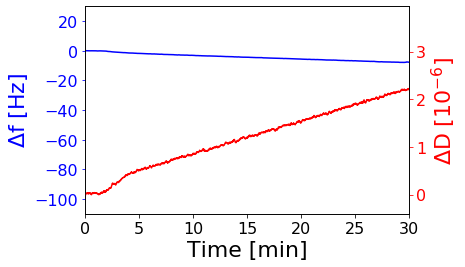

In [50]:
####Figure 1####
#8, 10 --> lo conc
show = [72] #hex
show


fig,ax=plt.subplots()
ax2=ax.twinx()
# da2.D7[(da2.index<=0)].plot(ax=ax2,legend=None)
for i in show:
    table.loc[i, "D7"].rolling(10).mean().plot(ax=ax2,color="r",legend=None)
    (table.loc[i, "F7"]*-1).rolling(10).mean().plot(ax=ax,color="b",legend=None)
    box = ax.get_position()
    ax.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    box = ax2.get_position()
    ax2.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    ax.tick_params(axis='y', labelsize=16,colors="b")
    ax.tick_params(axis='x', labelsize=16)
    ax2.tick_params(axis='y', labelsize=16,colors="r")
    ax.set_ylabel(r'$\Delta$f [Hz]', size=22,color="b")
    ax.set_xlabel('Time [min]', size=22)
    ax2.set_ylabel(r'$\Delta$D [$10^{-6}$]', size=22,color="r")
    ax.yaxis.set_major_locator(MaxNLocator(9)) 
    ax.set_ylim([-110,30])
    ax.set_xlim([0,30])
#     ax.set_xlim([min(table.loc[i, "D7"].index),max(table.loc[i, "D7"].index)])
#     ax2.set_ylim([-1,1])
    plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
#     fig.set_size_inches(5.11, 2.87)

[0.012419330651552265, 0.0034052358212947604, 0.00493790547090731, 0.013065226764425961]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

oct_- vs. oct_+: Custom statistical test, P_val:1.242e-02
hex_- vs. hex_+: Custom statistical test, P_val:3.405e-03
hex_+ vs. oct_+: Custom statistical test, P_val:4.938e-03
hex_- vs. oct_-: Custom statistical test, P_val:1.307e-02


(<matplotlib.axes._subplots.AxesSubplot at 0x216e6abae80>,
  <statannotations.Annotation.Annotation at 0x216e6a504e0>])

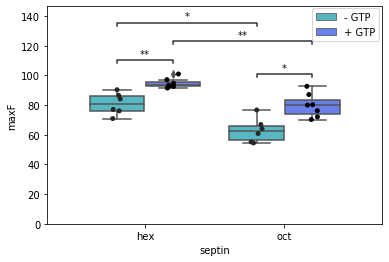

In [7]:
to_plot = 'maxF'

hue_plot_params = {
    'data': table[(table.GTP != "~")&(table.lipids == "mix")&(table.conc == 50)],
    'x': 'septin',
    'y': to_plot,
    "hue": "GTP",
}

pairs = [
    
    [('oct', '+'), ('oct', '-')],
    [('hex', '+'), ('hex', '-')],
    [('oct', '+'), ('hex', '+')],
    [('oct', '-'), ('hex', '-')],
    
    
    ]
groups = table[(table.lipids == "mix")&(table.conc == 50)].groupby(['septin', 'GTP'])

pvalues = []

for i in pairs:
    x = groups.get_group(i[0])[to_plot]
    y = groups.get_group(i[1])[to_plot]
    pvalues.append(mannwhitneyu(x,y, alternative="two-sided").pvalue)
    
    
    
# print(groups.get_group(('hex', "+"))['maxF'])


print(pvalues)
fig,ax=plt.subplots()
ax = sns.boxplot(**hue_plot_params, palette=['#47c6d2ff', '#5471ffff'])
sns.stripplot(**hue_plot_params,dodge=True, color = 'black')
ax.set_ylim(bottom = 0) 
handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], ["- GTP", "+ GTP"], bbox_to_anchor=(0.79, 0.991), loc=2, borderaxespad=0.)

annotator = Annotator(ax, pairs, **hue_plot_params)
annotator.set_pvalues(pvalues)
annotator.annotate()
# fig.savefig(r"V:\tnw\bn\gk\GL\Papers\2022 - Membrane with Felix and Djim\Figures\Fig_2"+"\error_fit_"+".png", dpi=500)

# https://levelup.gitconnected.com/statistics-on-seaborn-plots-with-statannotations-2bfce0394c00

[0.012419330651552265, 0.0034052358212947604, 0.00493790547090731, 0.013065226764425961]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

oct_- vs. oct_+: Custom statistical test, P_val:1.242e-02
hex_- vs. hex_+: Custom statistical test, P_val:3.405e-03
hex_+ vs. oct_+: Custom statistical test, P_val:4.938e-03
hex_- vs. oct_-: Custom statistical test, P_val:1.307e-02


(<matplotlib.axes._subplots.AxesSubplot at 0x2055f80c898>,
  <statannotations.Annotation.Annotation at 0x2055f8ecd68>])

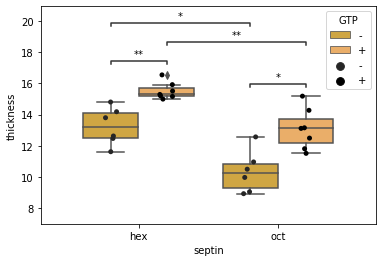

In [98]:
to_plot = 'thickness'

hue_plot_params = {
    'data': table[(table.GTP != "~")&(table.lipids == "mix")&(table.conc == 50)],
    'x': 'septin',
    'y': to_plot,
    "hue": "GTP",
}

pairs = [
    
    [('oct', '+'), ('oct', '-')],
    [('hex', '+'), ('hex', '-')],
    [('oct', '+'), ('hex', '+')],
    [('oct', '-'), ('hex', '-')],
    
    
    ]
groups = table[(table.lipids == "mix")&(table.conc == 50)].groupby(['septin', 'GTP'])

pvalues = []

for i in pairs:
    x = groups.get_group(i[0])[to_plot]
    y = groups.get_group(i[1])[to_plot]
    pvalues.append(mannwhitneyu(x,y, alternative="two-sided").pvalue)
    
    
    
# print(groups.get_group(('hex', "+"))['maxF'])


print(pvalues)
fig,ax=plt.subplots()
ax = sns.boxplot(**hue_plot_params, palette=['#e6af2cff', '#ffaf54ff'])
sns.stripplot(**hue_plot_params,dodge=True, color = 'black')
ax.set_ylim(bottom = 7) 
handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
# l = plt.legend(handles[0:0], ["- GTP", "+ GTP"], bbox_to_anchor=(0.79, 0.991), loc=2, borderaxespad=0.)

annotator = Annotator(ax, pairs, **hue_plot_params)
annotator.set_pvalues(pvalues)
annotator.annotate()
# fig.savefig(r"V:\tnw\bn\gk\GL\Papers\2022 - Membrane with Felix and Djim\Figures\Fig_2"+"\error_fit_"+".png", dpi=500)


[0.0034109425808640723, 0.0008977928869863494, 0.000652866286491697, 0.002740889116741266]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

oct_- vs. oct_+: Custom statistical test, P_val:3.411e-03
hex_- vs. hex_+: Custom statistical test, P_val:8.978e-04
hex_+ vs. oct_+: Custom statistical test, P_val:6.529e-04
hex_- vs. oct_-: Custom statistical test, P_val:2.741e-03


(<matplotlib.axes._subplots.AxesSubplot at 0x26c774d7470>,
  <statannotations.Annotation.Annotation at 0x26c779debe0>])

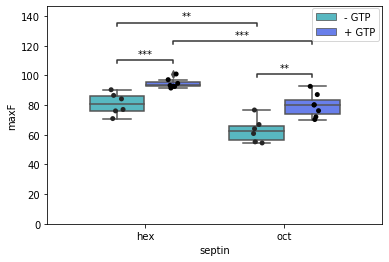

In [98]:
to_plot = 'maxF'

hue_plot_params = {
    'data': table[(table.GTP != "~")&(table.lipids == "mix")&(table.conc == 50)],
    'x': 'septin',
    'y': to_plot,
    "hue": "GTP",
}

pairs = [
    
    [('oct', '+'), ('oct', '-')],
    [('hex', '+'), ('hex', '-')],
    [('oct', '+'), ('hex', '+')],
    [('oct', '-'), ('hex', '-')],
    
    
    ]
groups = table[(table.lipids == "mix")&(table.conc == 50)].groupby(['septin', 'GTP'])

pvalues = []

for i in pairs:
    x = groups.get_group(i[0])[to_plot]
    y = groups.get_group(i[1])[to_plot]
    pvalues.append(ttest_ind(x,y).pvalue)
    
    
    
# print(groups.get_group(('hex', "+"))['maxF'])

# ['#ffa5a6ff', "#f14648ff"]
print(pvalues)
fig,ax=plt.subplots()
ax = sns.boxplot(**hue_plot_params, palette=['#47c6d2ff', '#5471ffff'])
sns.stripplot(**hue_plot_params,dodge=True, color = 'black')
ax.set_ylim(bottom = 0) 
handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], ["- GTP", "+ GTP"], bbox_to_anchor=(0.79, 0.991), loc=2, borderaxespad=0.)

annotator = Annotator(ax, pairs, **hue_plot_params)
annotator.set_pvalues(pvalues)
annotator.annotate()
# fig.savefig(r"V:\tnw\bn\gk\GL\Papers\2022 - Membrane with Felix and Djim\Figures\Fig_3.1"+"\GTP_hex_maxafterF%"+".png", dpi=500)

# https://levelup.gitconnected.com/statistics-on-seaborn-plots-with-statannotations-2bfce0394c00

[0.1746214457079191, 0.5926714771969659, 0.0034109425808640723, 3.193003447177444e-06, 2.403605720133904e-07, 0.3421817132045379, 2.1777691571706684e-09, 7.400812384166617e-05, 0.11997762630490492]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

20%PS_+ vs. 20%PS_-: Custom statistical test, P_val:1.746e-01
DOPC_+ vs. DOPC_-: Custom statistical test, P_val:5.927e-01
pip_+ vs. pip_-: Custom statistical test, P_val:3.422e-01
mix_+ vs. mix_-: Custom statistical test, P_val:3.411e-03
pip_+ vs. mix_+: Custom statistical test, P_val:2.178e-09
pip_- vs. mix_-: Custom statistical test, P_val:7.401e-05
20%PS_+ vs. pip_+: Custom statistical test, P_val:1.200e-01
20%PS_+ vs. mix_+: Custom statistical test, P_val:2.404e-07
DOPC_+ vs. mix_+: Custom statistical test, P_val:3.193e-06


(<matplotlib.axes._subplots.AxesSubplot at 0x26c77696470>,
  <statannotations.Annotation.Annotation at 0x26c779dea90>])

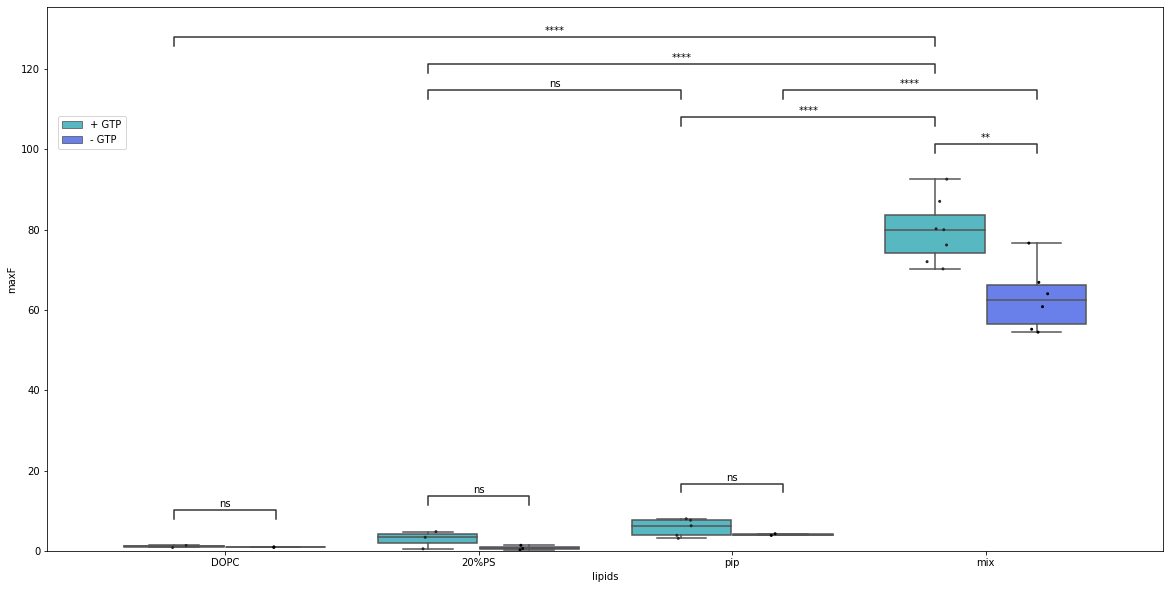

In [97]:

to_plot = 'maxF'

hue_plot_params = {
    'data': table[(table.GTP != "~")&(table.septin == "oct")&(table.conc == 50)],
    "order": ["DOPC","20%PS", "pip","mix"],
    'x': 'lipids',
    'y': to_plot,
   "hue": "GTP",
}

# print(groups.get_group(('hex', "+"))['maxF'])

pairs = [
    
    [('20%PS', '+'), ('20%PS', '-')], 
    [('DOPC', '+'), ('DOPC', '-')], 
    [('mix', '+'), ('mix', '-')], 
    [('DOPC', '+'), ('mix', '+')], 
    [('20%PS', '+'), ('mix', '+')], 
    [('pip', '+'), ('pip', '-')],
    [('pip', '+'), ('mix', '+')], 
    [('pip', '-'), ('mix', '-')],
    [('20%PS', '+'), ('pip', '+')]
    
    
    ]
# pairs = [
#     [('DOPC'), ('mix')], 
#     [('20%PS'), ('mix')], 
#     [('pip'), ('mix')], 
#     [('20%PS'), ('pip')]
    
    
#     ]
groups
groups = table[(table.septin == "oct")&(table.conc == 50)].groupby(['lipids', "GTP"])

pvalues = []

for i in pairs:
    x = groups.get_group(i[0])[to_plot]
    y = groups.get_group(i[1])[to_plot]
    pvalues.append(ttest_ind(x,y).pvalue)
    
    
    
# print(groups.get_group(('hex', "+"))['maxF'])
palette=['#47c6d2ff', '#5471ffff']
palette=['#ffa5a6ff', "#f14648ff"]

print(pvalues)
fig,ax=plt.subplots()
ax = sns.boxplot(**hue_plot_params, palette=['#47c6d2ff', '#5471ffff'])
sns.stripplot(**hue_plot_params,dodge=True, color = 'black', size = 3)
ax.set_ylim(bottom = 0, top = 110) 
handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], ["+ GTP", "- GTP"], bbox_to_anchor=(0.01, 0.8), loc=2, borderaxespad=0.)
fig.set_size_inches(20, 10)
annotator = Annotator(ax, pairs, **hue_plot_params)
annotator.set_pvalues(pvalues)
annotator.annotate()
# ax.set_ylim([-0,20])
# fig.savefig(r"V:\tnw\bn\gk\GL\Thesis\Thesis_LaTeX_V2\phd-thesis-template-master\figs\Figures_thesis\Thesis\Ch4\final_values"+
#             "\oct_lipids_F"+".pdf", dpi=1200)

# https://levelup.gitconnected.com/statistics-on-seaborn-plots-with-statannotations-2bfce0394c00

[0.1929296987516491, 0.2237772679932443, 0.9770114644552667, 0.4408151979848851]


NameError: name 'Annotator' is not defined

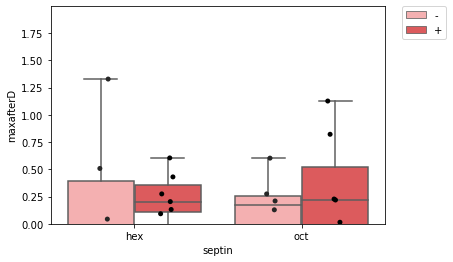

In [18]:
to_plot = 'maxafterD'

hue_plot_params = {
    'data': table[(table.GTP != "~")&(table.lipids == "mix")&(table.conc == 50)],
    'x': 'septin',
    'y': to_plot,
    "hue": "GTP",
}

pairs = [
    
    [('oct', '+'), ('oct', '-')],
    [('hex', '+'), ('hex', '-')],
    [('oct', '+'), ('hex', '+')],
    [('oct', '-'), ('hex', '-')],
    
    
    ]
groups = table[(table.lipids == "mix")&(table.conc == 50)].groupby(['septin', 'GTP'])

pvalues = []

for i in pairs:
    x = groups.get_group(i[0])[to_plot]
    y = groups.get_group(i[1])[to_plot]
    pvalues.append(ttest_ind(x,y).pvalue)
    
    
    
# print(groups.get_group(('hex', "+"))['maxF'])


print(pvalues)
fig,ax=plt.subplots()
ax = sns.boxplot(**hue_plot_params, palette=['#ffa5a6ff', "#f14648ff"])
sns.stripplot(**hue_plot_params,dodge=True, color = 'black')
ax.set_ylim(bottom = 0) 
handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

annotator = Annotator(ax, pairs, **hue_plot_params)
annotator.set_pvalues(pvalues)
annotator.annotate()

In [100]:
table[(table.lipids == "mix")&(table.septin == "oct")]

,F7,D7,soft,date,lipids,septin,GTP,conc,duration,maxF_fit,...,maxF,maxD,maxafterF,maxafterD,maxS,maxafterS,maxafterF%,maxafterD%,thickness,thickness_after
8,Time -39.491565 -23.219263 -39.473544 -23....,Time -39.491565 1.258141 -39.473544 1.24...,Time -39.491565 -0.054185 -39.473544 -0.05...,20220531,mix,oct,+,17.3,35,26.0731,...,23.8024,4.50362,6.29829,0.329182,0.188854,0.340287,26.4608,7.30926,3.90203,1.03251
9,Time -39.993898 -23.485324 -39.975803 -23....,Time -39.993898 1.324440 -39.975803 1.39...,Time -39.993898 -0.056394 -39.975803 -0.05...,20220531,mix,oct,+,50,35,96.971,...,92.6077,6.3257,6.95028,0.0141932,0.0681102,0.343853,7.50508,0.224373,15.1816,1.13939
10,Time -39.993843 -22.399589 -39.975751 -22....,Time -39.993843 1.318209 -39.975751 1.34...,Time -39.993843 -0.058850 -39.975751 -0.05...,20220531,mix,oct,+,17.3,34,29.3367,...,23.2741,4.63819,5.12837,-0.75423,0.197166,0.401637,22.0347,-16.2613,3.81542,0.840717
12,Time -24.990682 -22.658604 -24.972439 -22....,Time -24.990682 1.342240 -24.972439 1.39...,Time -24.990682 -0.059238 -24.972439 -0.06...,20220531,mix,oct,+,50,33,82.5698,...,80.0029,6.57287,8.12303,0.218407,0.0797671,0.347824,10.1534,3.32285,13.1152,1.33164
13,Time -24.990699 -22.182408 -24.972443 -22....,Time -24.990699 0.767623 -24.972443 0.78...,Time -24.990699 -0.034605 -24.972443 -0.03...,20220531,mix,oct,-,50,33,64.4729,...,64.0481,3.84818,10.1462,0.128218,0.0608802,0.184228,15.8415,3.33192,10.4997,1.66331
14,Time -26.985024 -23.236708 -26.966793 -23....,Time -26.985024 1.507972 -26.966793 1.47...,Time -26.985024 -0.064896 -26.966793 -0.06...,20220531,mix,oct,+,50,32,81.381,...,76.205,8.42693,7.76519,-0.112424,0.112302,0.304562,10.1899,-1.3341,12.4926,1.27298
15,Time -25.476648 -22.614579 -25.458411 -22....,Time -25.476648 1.329738 -25.458411 1.36...,Time -25.476648 -0.058800 -25.458411 -0.06...,20220531,mix,oct,-,50,32,62.4003,...,54.477,8.1623,8.96904,-2.26926,0.150565,0.29862,16.4639,-27.8017,8.93065,1.47033
20,Time -29.002513 -23.548629 -28.984422 -23....,Time -29.002513 1.261968 -28.984422 1.28...,Time -29.002513 -0.053590 -28.984422 -0.05...,20220531,mix,oct,+,50,33.5,73.5719,...,72.0437,8.57865,8.6321,0.821199,0.117152,0.308403,11.9818,9.57259,11.8104,1.4151
21,Time -29.002796 -22.558327 -28.984726 -22....,Time -29.002796 1.278155 -28.984726 1.29...,Time -29.002796 -0.056660 -28.984726 -0.05...,20220531,mix,oct,-,50,33.5,57.4056,...,55.2101,5.3445,10.516,0.209469,0.0956231,0.204673,19.0473,3.91933,9.05083,1.72394
22,Time -30.988605 -23.744697 -30.970726 -23....,Time -30.988605 1.469472 -30.970726 1.47...,Time -30.988605 -0.061886 -30.970726 -0.06...,20220531,mix,oct,+,50,33,93.1668,...,87.0696,6.90949,7.37598,1.12623,0.0791465,0.368502,8.47137,16.2997,14.2737,1.20918


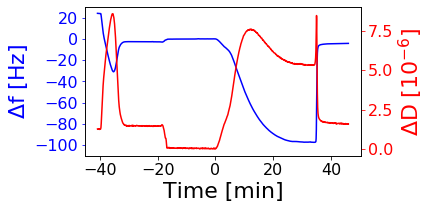

In [22]:
####Figure 1####
#8, 10 --> lo conc
show = [11] #hex
show


fig,ax=plt.subplots()
ax2=ax.twinx()
# da2.D7[(da2.index<=0)].plot(ax=ax2,legend=None)
for i in show:
    table.loc[i, "D7"].rolling(10).mean().plot(ax=ax2,color="r",legend=None)
    (table.loc[i, "F7"]*-1).rolling(10).mean().plot(ax=ax,color="b",legend=None)
    box = ax.get_position()
    ax.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    box = ax2.get_position()
    ax2.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    ax.tick_params(axis='y', labelsize=16,colors="b")
    ax.tick_params(axis='x', labelsize=16)
    ax2.tick_params(axis='y', labelsize=16,colors="r")
    ax.set_ylabel(r'$\Delta$f [Hz]', size=22,color="b")
    ax.set_xlabel('Time [min]', size=22)
    ax2.set_ylabel(r'$\Delta$D [$10^{-6}$]', size=22,color="r")
    ax.yaxis.set_major_locator(MaxNLocator(9)) 
    ax.set_ylim([-110,30])
    #ax.set_xlim([min(table.loc[i, "D7"].index),max(table.loc[i, "D7"].index)])
#     ax2.set_ylim([-1,1])
    plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
    fig.set_size_inches(5.11, 2.87)
fig.savefig(r"V:\tnw\bn\gk\GL\Thesis\Thesis_LaTeX_V2\phd-thesis-template-master\figs\Figures_thesis\Thesis\Ch4\QCM_D_intro"+"\curve_"+
            "-".join(str(e) for e in show)+".pdf", dpi=1200)

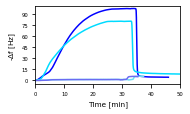

In [101]:
####Figure 1 - F ####

# show = [4, 30, 28, 36] #hex
# show = [9, 13, 11, 25] #oct
# show = [0, 6, 34] #hex no GTP: DOPC, noSLB, mix
show = [11, 12, 64, 57]


fig,ax=plt.subplots()
# da2.D7[(da2.index<=0)].plot(ax=ax2,legend=None)
for i in show:
    F = table.loc[i, "F7"]
    if table.loc[i, "lipids"] == "mix" and table.loc[i, "septin"] == "hex":
        F[(F.index >= 0)].rolling(10).mean().plot(ax=ax,color="#0000ffff",legend=None)
    if table.loc[i, "lipids"] == "DOPC" and table.loc[i, "septin"] == "hex":
        F[(F.index >= 0)].rolling(10).mean().plot(ax=ax,color="#6b6bf2ff",legend=None)
    if table.loc[i, "lipids"] == "mix" and table.loc[i, "septin"] == "oct":
        F[(F.index >= 0)].rolling(10).mean().plot(ax=ax,color="#00dbffff",legend=None)
    if table.loc[i, "lipids"] == "DOPC" and table.loc[i, "septin"] == "oct":
        F[(F.index >= 0)].rolling(10).mean().plot(ax=ax,color="#6bdff2ff",legend=None)
    box = ax.get_position()
    ax.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    ax.tick_params(axis='y', labelsize=16/3)
    ax.tick_params(axis='x', labelsize=16/3)
    ax.set_ylabel(r'-$\Delta$f [Hz]', size=22/3)
    ax.set_xlabel('Time [min]', size=22/3)
    ax.yaxis.set_major_locator(MaxNLocator(9)) 
    ax.set_ylim([-5,100])
    ax.set_xlim([0,50])
#     ax2.set_ylim([-1,1])
    plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
#     fig.set_size_inches(9/3, 6/3)
    fig.set_size_inches(2.67717, 1.49606)
fig.savefig(r"V:\tnw\bn\gk\GL\Thesis\Thesis_LaTeX_V2\phd-thesis-template-master\figs\Figures_thesis\Thesis\Ch4\QCM_D_intro"+r"\samples_F"+
            "-".join(str(e) for e in show)+".pdf", bbox_inches='tight',dpi=1200)

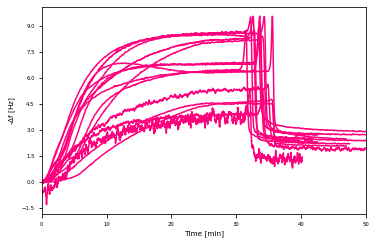

In [110]:
####Figure 1 - D ####

# show = [4, 30, 28, 36] #hex
# show = [9, 13, 11, 25] #oct
# show = [0, 7, 34] #hex, no GTP, DOPC, noSLB, mix
# show = [11, 12, 64, 57]
show = list(table[(table.lipids == "mix")&(table.septin == "ot")].index)


fig,ax=plt.subplots()
# da2.D7[(da2.index<=0)].plot(ax=ax2,legend=None)
for i in show:
    F = table.loc[i, "D7"]
    if table.loc[i, "lipids"] == "mix" and table.loc[i, "septin"] == "hex":
        F[(F.index >= 0)].rolling(10).mean().plot(ax=ax,color="#ff0000ff",legend=None)
    if table.loc[i, "lipids"] == "DOPC" and table.loc[i, "septin"] == "hex":
        F[(F.index >= 0)].rolling(10).mean().plot(ax=ax,color="#ff8e8eff",legend=None)
    if table.loc[i, "lipids"] == "mix" and table.loc[i, "septin"] == "oct":
        F[(F.index >= 0)].rolling(10).mean().plot(ax=ax,color="#ff007cff",legend=None)
    if table.loc[i, "lipids"] == "DOPC" and table.loc[i, "septin"] == "oct":
        F[(F.index >= 0)].rolling(10).mean().plot(ax=ax,color="#ff81beff",legend=None)
    box = ax.get_position()
    ax.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    ax.tick_params(axis='y', labelsize=16/3)
    ax.tick_params(axis='x', labelsize=16/3)
    ax.set_ylabel(r'-$\Delta$f [Hz]', size=22/3)
    ax.set_xlabel('Time [min]', size=22/3)
    ax.yaxis.set_major_locator(MaxNLocator(9)) 
    ax.set_ylim([0,9])
    ax.set_xlim([0,50])
#     ax2.set_ylim([-1,1])
    plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
#     fig.set_size_inches(9/3, 6/3)
# fig.set_size_inches(2.67717, 1.49606)
# fig.savefig(r"V:\tnw\bn\gk\GL\Thesis\Thesis_LaTeX_V2\phd-thesis-template-master\figs\Figures_thesis\Thesis\Ch4\QCM_D_intro"+r"\samples_D"+
#             "-".join(str(e) for e in show)+".pdf", bbox_inches='tight',dpi=1200)

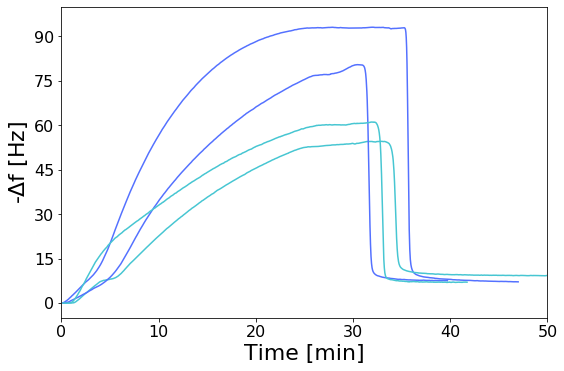

In [222]:
####Figure 2 - F ####

# show = [4, 30, 28, 36] #hex
show = [9, 15, 26, 25] #oct
# show = [0, 6, 34] #hex, no GTP, DOPC, noSLB, mix



fig,ax=plt.subplots()
# da2.D7[(da2.index<=0)].plot(ax=ax2,legend=None)
for i in show:
    F = table.loc[i, "F7"]
    if table.loc[i, "GTP"] == "+":
        F[(F.index >= 0)].rolling(10).mean().plot(ax=ax,color="#5471ffff",legend=None)
    if table.loc[i, "GTP"] == "-":
        F[(F.index >= 0)].rolling(10).mean().plot(ax=ax,color="#47c6d2ff",legend=None)
    box = ax.get_position()
    ax.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    ax.tick_params(axis='y', labelsize=16)
    ax.tick_params(axis='x', labelsize=16)
    ax.set_ylabel(r'-$\Delta$f [Hz]', size=22)
    ax.set_xlabel('Time [min]', size=22)
    ax.yaxis.set_major_locator(MaxNLocator(9)) 
    ax.set_ylim([-5,100])
    ax.set_xlim([0,50])
#     ax2.set_ylim([-1,1])
    plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
    fig.set_size_inches(9, 6)
fig.savefig(r"V:\tnw\bn\gk\GL\Papers\2022 - Membrane with Felix and Djim\Figures\Fig_2"+"\GTP_oct_F_2"+
            "-".join(str(e) for e in show)+".png", dpi=300)



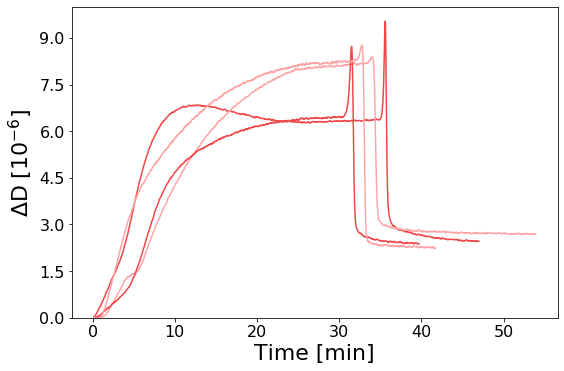

In [223]:
####Figure 2 - D ####

# show = [4, 30, 28, 36] #hex
show = [9, 15, 26, 25] #oct


fig,ax=plt.subplots()
# da2.D7[(da2.index<=0)].plot(ax=ax2,legend=None)
for i in show:
    D = table.loc[i, "D7"]
    if table.loc[i, "GTP"] == "+":
        D[(D.index >= 0)].rolling(10).mean().plot(ax=ax,color="#f14648ff",legend=None)
    if table.loc[i, "GTP"] == "-":
        D[(D.index >= 0)].rolling(10).mean().plot(ax=ax,color="#ffa5a6ff",legend=None)
    box = ax.get_position()
    ax.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    ax.tick_params(axis='y', labelsize=16)
    ax.tick_params(axis='x', labelsize=16)
    ax.set_ylabel(r'$\Delta$D [$10^{-6}$]', size=22)
    ax.set_xlabel('Time [min]', size=22)
    ax.yaxis.set_major_locator(MaxNLocator(9)) 
    ax.set_ylim([0,10])
#     ax.set_xlim([0,50])
#     ax2.set_ylim([-1,1])
    plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
    fig.set_size_inches(9, 6)
fig.savefig(r"V:\tnw\bn\gk\GL\Papers\2022 - Membrane with Felix and Djim\Figures\Fig_2"+"\GTP_oct_D_2"+
            "-".join(str(e) for e in show)+".png", dpi=300)

KeyError: 'the label [F5] is not in the [index]'

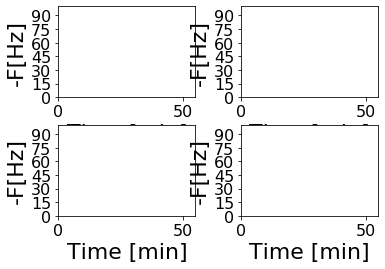

In [80]:
# show = [4, 30, 28, 36] #hex
# show = [9, 15, 26, 25] #oct
show = list(table[(table.GTP != "~")&(table.lipids == "mix")&(table.conc == 50)].index)

fig,ax=plt.subplots(2,2)
for a in ax.flat:
    box = a.get_position()
    a.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    a.tick_params(axis='y', labelsize=16)
    a.tick_params(axis='x', labelsize=16)
    a.set_ylabel(r'-F[Hz]', size=22)
    a.set_xlabel(r'Time [min]', size=22)
    a.yaxis.set_major_locator(MaxNLocator(9)) 
    a.set_ylim([0,100])
    a.set_xlim([0, 55])
# da2.D7[(da2.index<=0)].plot(ax=ax2,legend=None)
# [0:table.loc[i,"duration"]]
for i in show:
    D = table.loc[i, "F7"]
    if table.loc[i, "GTP"] == "+" and table.loc[i, "septin"] == "hex":
        D[(D.index >= 0)].rolling(10).mean().plot(ax=ax[0,0],color="#5471ffff",legend=None)
    elif table.loc[i, "GTP"] == "-" and table.loc[i, "septin"] == "hex":
        D[(D.index >= 0)].rolling(10).mean().plot(ax=ax[0,1],color="#47c6d2ff",legend=None)
    elif table.loc[i, "GTP"] == "+" and table.loc[i, "septin"] == "oct":
        D[(D.index >= 0)].rolling(10).mean().plot(ax=ax[1,0],color="#5471ffff",legend=None)
    elif table.loc[i, "GTP"] == "-" and table.loc[i, "septin"] == "oct":
        D[(D.index >= 0)].rolling(10).mean().plot(ax=ax[1,1],color="#47c6d2ff",legend=None)
#     box = ax.get_position()
#     ax.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
#     ax.tick_params(axis='y', labelsize=16)
#     ax.tick_params(axis='x', labelsize=16)
#     ax.set_ylabel(r'Softness[$10^{-6}$/Hz]', size=22)
#     ax.set_xlabel('Time [min]', size=22)
#     ax.yaxis.set_major_locator(MaxNLocator(9)) 
#     ax.set_ylim([0,0.3])
    #ax.set_xlim([0,50])
#     ax2.set_ylim([-1,1])
    plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
    fig.set_size_inches(20, 15)
#fig.savefig(r"V:\tnw\bn\gk\GL\Results\QCM-D\Softness"+"\F"+"-".join(str(e) for e in show)+".png", dpi=300)

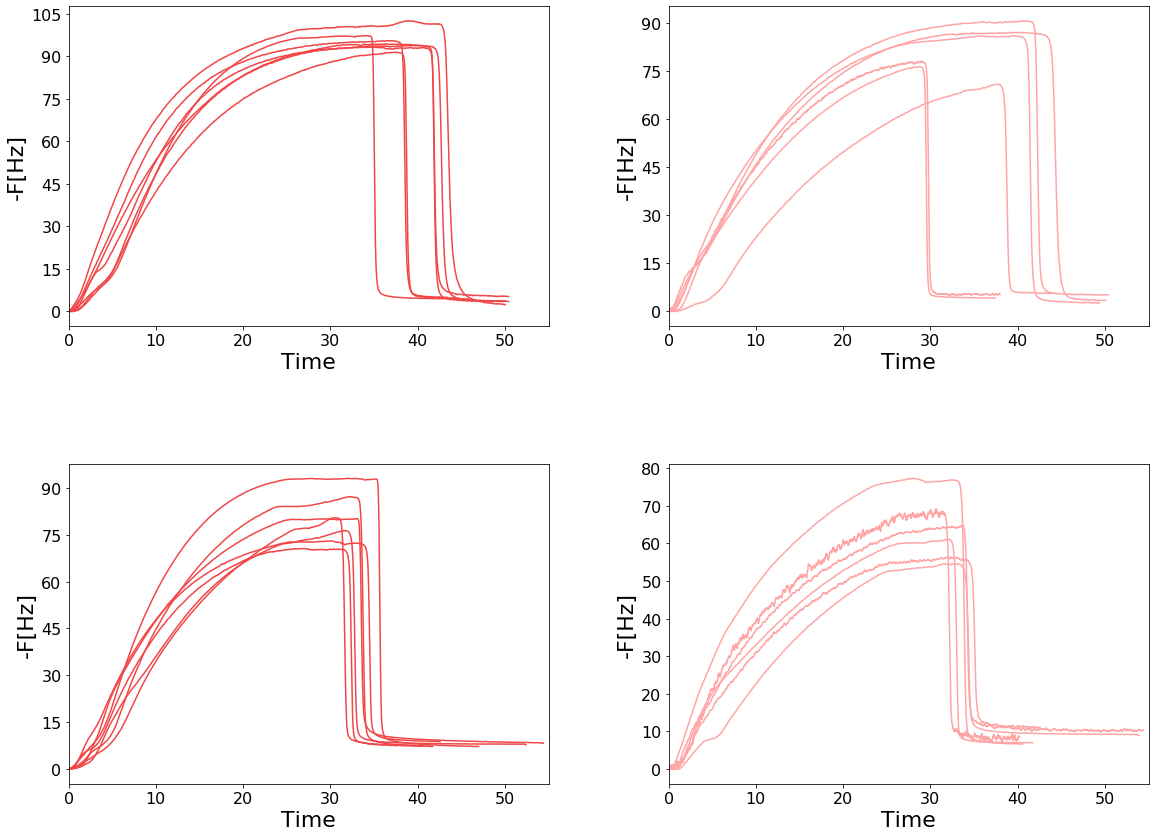

In [239]:
# show = [4, 30, 28, 36] #hex
# show = [9, 15, 26, 25] #oct
show = list(table[(table.GTP != "~")&(table.lipids == "mix")&(table.conc == 50)].index)

fig,ax=plt.subplots(2,2)
for a in ax.flat:
    box = a.get_position()
    a.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    a.tick_params(axis='y', labelsize=16)
    a.tick_params(axis='x', labelsize=16)
    a.set_ylabel(r'-F[Hz]', size=22)
    a.set_xlabel(r'Time [min]', size=22)
    a.yaxis.set_major_locator(MaxNLocator(9)) 
#     a.set_ylim([0,10])
    a.set_xlim([0, 55])
# da2.D7[(da2.index<=0)].plot(ax=ax2,legend=None)
# [0:table.loc[i,"duration"]]
for i in show:
    D = table.loc[i, "F7"]
    if table.loc[i, "GTP"] == "+" and table.loc[i, "septin"] == "hex":
        D[(D.index >= 0)].rolling(10).mean().plot(ax=ax[0,0],color="#f14648ff",legend=None)
    elif table.loc[i, "GTP"] == "-" and table.loc[i, "septin"] == "hex":
        D[(D.index >= 0)].rolling(10).mean().plot(ax=ax[0,1],color="#ffa5a6ff",legend=None)
    elif table.loc[i, "GTP"] == "+" and table.loc[i, "septin"] == "oct":
        D[(D.index >= 0)].rolling(10).mean().plot(ax=ax[1,0],color="#f14648ff",legend=None)
    elif table.loc[i, "GTP"] == "-" and table.loc[i, "septin"] == "oct":
        D[(D.index >= 0)].rolling(10).mean().plot(ax=ax[1,1],color="#ffa5a6ff",legend=None)
#     box = ax.get_position()
#     ax.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
#     ax.tick_params(axis='y', labelsize=16)
#     ax.tick_params(axis='x', labelsize=16)
#     ax.set_ylabel(r'Softness[$10^{-6}$/Hz]', size=22)
#     ax.set_xlabel('Time [min]', size=22)
#     ax.yaxis.set_major_locator(MaxNLocator(9)) 
#     ax.set_ylim([0,0.3])
    #ax.set_xlim([0,50])
#     ax2.set_ylim([-1,1])
    plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
    fig.set_size_inches(20, 15)
# fig.savefig(r"V:\tnw\bn\gk\GL\Thesis\Thesis_LaTeX_V2\phd-thesis-template-master\figs\Figures_thesis\Thesis\Ch4\Softness and D"
#             +"\D"+"-".join(str(e) for e in show)+".pdf", dpi=1200)

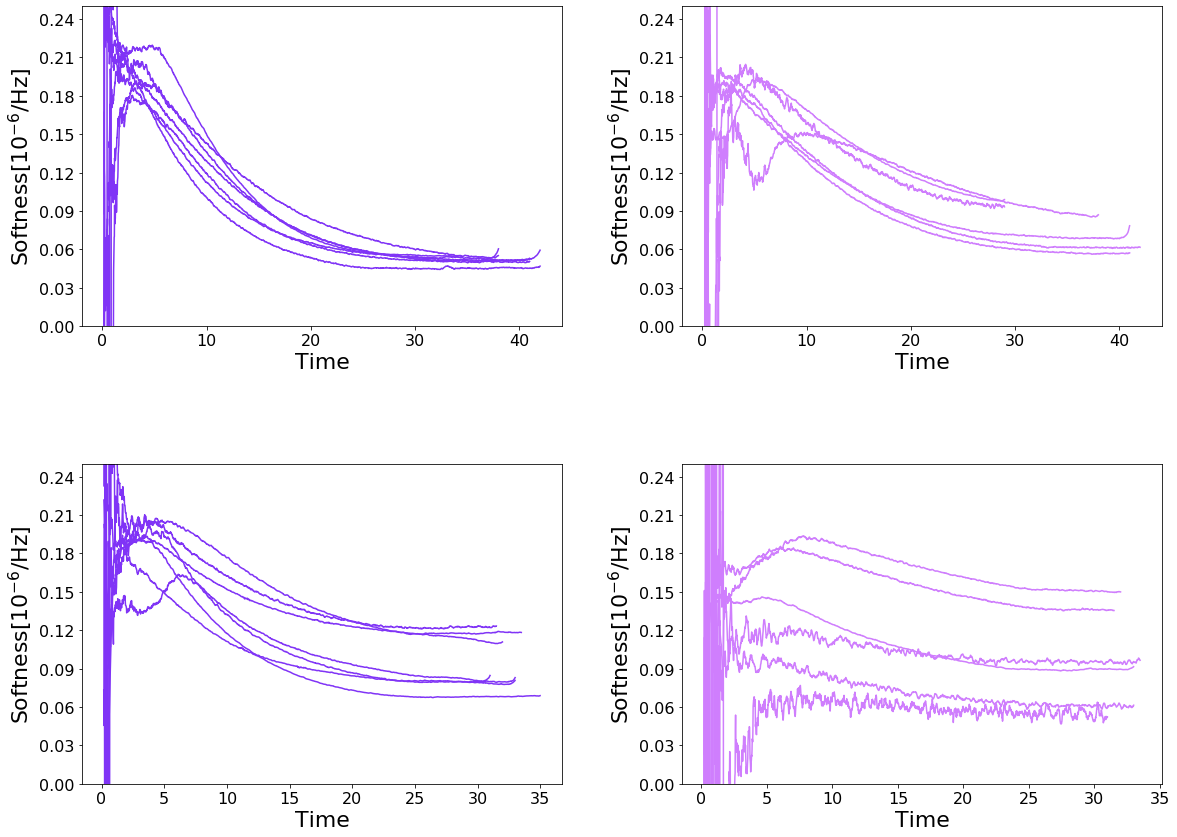

In [166]:
####Softness####

# show = [4, 30, 28, 36] #hex
# show = [9, 15, 26, 25] #oct
show = list(table[(table.GTP != "~")&(table.lipids == "mix")&(table.conc == 50)].index)

fig,ax=plt.subplots(2,2)
for a in ax.flat:
    box = a.get_position()
    a.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    a.tick_params(axis='y', labelsize=16)
    a.tick_params(axis='x', labelsize=16)
    a.set_ylabel(r'Softness[$10^{-6}$/Hz]', size=22)
    a.set_xlabel(r'Time [min]', size=22)
    a.yaxis.set_major_locator(MaxNLocator(9)) 
    a.set_ylim([0,0.25])
#     a.set_xlim([0,29])
# da2.D7[(da2.index<=0)].plot(ax=ax2,legend=None)
for i in show:
    D = table.loc[i, "soft"][0:table.loc[i,"duration"]]
    if table.loc[i, "GTP"] == "+" and table.loc[i, "septin"] == "hex":
        D[(D.index >= 0)].rolling(10).mean().plot(ax=ax[0,0],color="#8034f6ff",legend=None)
    elif table.loc[i, "GTP"] == "-" and table.loc[i, "septin"] == "hex":
        D[(D.index >= 0)].rolling(10).mean().plot(ax=ax[0,1],color="#cf7efdff",legend=None)
    elif table.loc[i, "GTP"] == "+" and table.loc[i, "septin"] == "oct":
        D[(D.index >= 0)].rolling(10).mean().plot(ax=ax[1,0],color="#8034f6ff",legend=None)
    elif table.loc[i, "GTP"] == "-" and table.loc[i, "septin"] == "oct":
        D[(D.index >= 0)].rolling(10).mean().plot(ax=ax[1,1],color="#cf7efdff",legend=None)
#     box = ax.get_position()
#     ax.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
#     ax.tick_params(axis='y', labelsize=16)
#     ax.tick_params(axis='x', labelsize=16)
#     ax.set_ylabel(r'Softness[$10^{-6}$/Hz]', size=22)
#     ax.set_xlabel('Time [min]', size=22)
#     ax.yaxis.set_major_locator(MaxNLocator(9)) 
#     ax.set_ylim([0,0.3])
    #ax.set_xlim([0,50])
#     ax2.set_ylim([-1,1])
    plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
    fig.set_size_inches(20, 15)
# fig.savefig(r"V:\tnw\bn\gk\GL\Results\QCM-D\Softness"+"\over_T"+"-".join(str(e) for e in show)+".png", dpi=300)

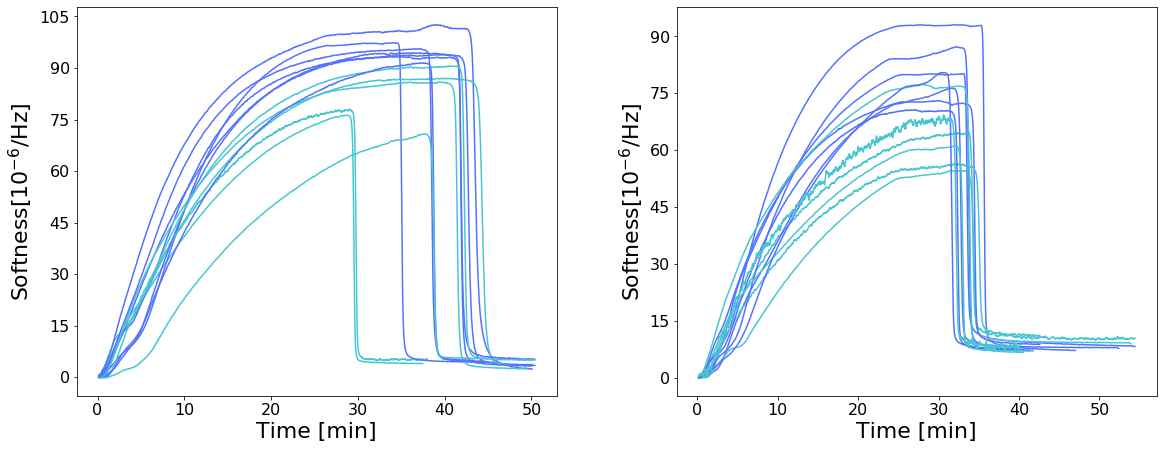

In [282]:
####Softness####

# show = [4, 30, 28, 36] #hex
# show = [9, 15, 26, 25] #oct
show = list(table[(table.GTP != "~")&(table.lipids == "mix")&(table.conc == 50)].index)

fig,(ax1, ax2) =plt.subplots(1,2)
# for a in ax.flat:
#     box = a.get_position()
#     a.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
#     a.tick_params(axis='y', labelsize=16)
#     a.tick_params(axis='x', labelsize=16)
#     a.set_ylabel(r'Softness[$10^{-6}$/Hz]', size=22)
#     a.set_xlabel(r'Time [min]', size=22)
#     a.yaxis.set_major_locator(MaxNLocator(9)) 
#     a.set_ylim([0,0.25])
#     a.set_xlim([0,29])
# da2.D7[(da2.index<=0)].plot(ax=ax2,legend=None)
# [0:table.loc[i,"duration"]]


for i in show:
    D = table.loc[i, "F7"]
    if table.loc[i, "GTP"] == "+" and table.loc[i, "septin"] == "hex":
        D[(D.index >= 0)].rolling(10).mean().plot(ax=ax1,color="#5471ffff",legend=None)
    elif table.loc[i, "GTP"] == "-" and table.loc[i, "septin"] == "hex":
        D[(D.index >= 0)].rolling(10).mean().plot(ax=ax1,color="#47c6d2ff",legend=None)
    elif table.loc[i, "GTP"] == "+" and table.loc[i, "septin"] == "oct":
        D[(D.index >= 0)].rolling(10).mean().plot(ax=ax2,color="#5471ffff",legend=None)
    elif table.loc[i, "GTP"] == "-" and table.loc[i, "septin"] == "oct":
        D[(D.index >= 0)].rolling(10).mean().plot(ax=ax2,color="#47c6d2ff",legend=None)
    ax1.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    ax1.tick_params(axis='y', labelsize=16)
    ax1.tick_params(axis='x', labelsize=16)
    ax1.set_ylabel(r'Softness[$10^{-6}$/Hz]', size=22)
    ax1.set_xlabel(r'Time [min]', size=22)
    ax1.yaxis.set_major_locator(MaxNLocator(9)) 
#     ax1.set_ylim([0,0.25])
#     ax1.set_xlim([0,29])
    ax2.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    ax2.tick_params(axis='y', labelsize=16)
    ax2.tick_params(axis='x', labelsize=16)
    ax2.set_ylabel(r'Softness[$10^{-6}$/Hz]', size=22)
    ax2.set_xlabel(r'Time [min]', size=22)
    ax2.yaxis.set_major_locator(MaxNLocator(9)) 
#     ax2.set_ylim([0,0.25])
#     ax2.set_xlim([0,30])
    plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
    fig.set_size_inches(20, 7.5)
fig.savefig(r"V:\tnw\bn\gk\GL\Thesis\Thesis_LaTeX_V2\phd-thesis-template-master\figs\Figures_thesis\Thesis\Ch4\final_values"
            +r"\Fcurves"+"-".join(str(e) for e in show)+".pdf", dpi=1200)

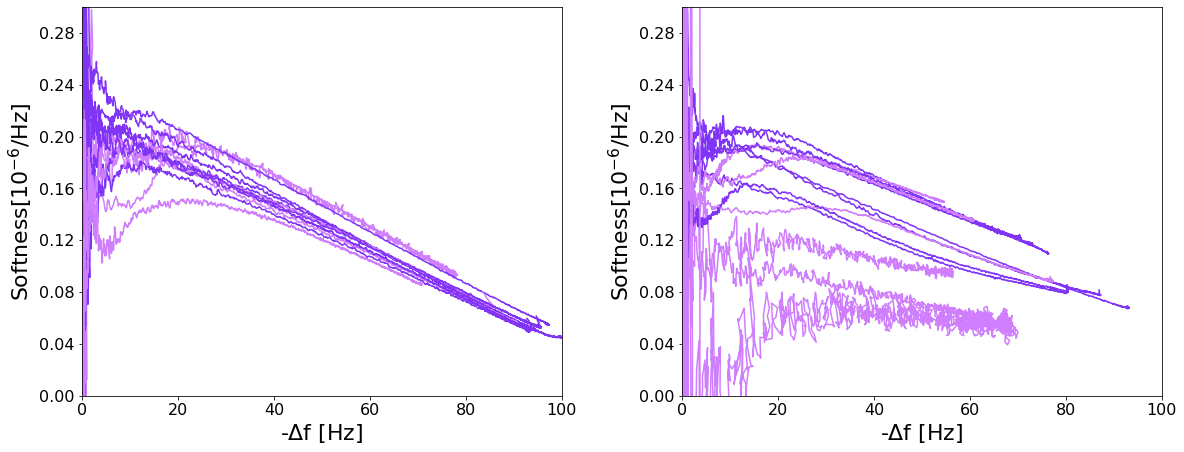

In [8]:
####Softness####

# show = [4, 30, 28, 36] #hex
#show = [9, 15, 26, 25] #oct
show = list(table[(table.GTP != "~")&(table.lipids == "mix")&(table.conc == 50)].index)

fig,(ax1, ax2) =plt.subplots(1,2)
# for a in ax.flat:
#     box = a.get_position()
#     a.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
#     a.tick_params(axis='y', labelsize=16)
#     a.tick_params(axis='x', labelsize=16)
#     a.set_ylabel(r'Softness[$10^{-6}$/Hz]', size=22)
#     a.set_xlabel(r'-$\Delta$f [Hz]', size=22)
#     a.yaxis.set_major_locator(MaxNLocator(9)) 
#     a.set_ylim([0,0.3])
#     a.set_xlim([0,100])
# da2.D7[(da2.index<=0)].plot(ax=ax2,legend=None)
for i in show:
    duration = table.loc[i,"duration"]
    S = np.array(table.loc[i, "soft"][0: duration].rolling(5).mean())
    F7 = np.array(table.loc[i, "F7"][0: duration].rolling(5).mean())
    if table.loc[i, "GTP"] == "+" and table.loc[i, "septin"] == "hex":
        ax1.plot(F7,S,color="#8034f6ff")
    elif table.loc[i, "GTP"] == "-" and table.loc[i, "septin"] == "hex":
        ax1.plot(F7,S,color="#cf7efdff")
    elif table.loc[i, "GTP"] == "+" and table.loc[i, "septin"] == "oct":
        ax2.plot(F7,S,color="#8034f6ff")
    elif table.loc[i, "GTP"] == "-" and table.loc[i, "septin"] == "oct":
        ax2.plot(F7,S,color="#cf7efdff")
    box = ax1.get_position()
    ax1.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    ax1.tick_params(axis='y', labelsize=16)
    ax1.tick_params(axis='x', labelsize=16)
    ax1.set_ylabel(r'Softness[$10^{-6}$/Hz]', size=22)
    ax1.set_xlabel(r'-$\Delta$f [Hz]', size=22)
    ax1.yaxis.set_major_locator(MaxNLocator(9)) 
    ax1.set_ylim([0,0.3])
    ax1.set_xlim([0,100])
    ax2.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    ax2.tick_params(axis='y', labelsize=16)
    ax2.tick_params(axis='x', labelsize=16)
    ax2.set_ylabel(r'Softness[$10^{-6}$/Hz]', size=22)
    ax2.set_xlabel(r'-$\Delta$f [Hz]', size=22)
    ax2.yaxis.set_major_locator(MaxNLocator(9)) 
    ax2.set_ylim([0,0.3])
    ax2.set_xlim([0,100])
    plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
    fig.set_size_inches(20, 7.5)
#fig.savefig(r"V:\tnw\bn\gk\GL\Thesis\Thesis_LaTeX_V2\phd-thesis-template-master\figs\Figures_thesis\Thesis\Ch4\QCM_D_intro"
#            +"\over_F"+ "-".join(str(e) for e in show)+".pdf", dpi=1200)

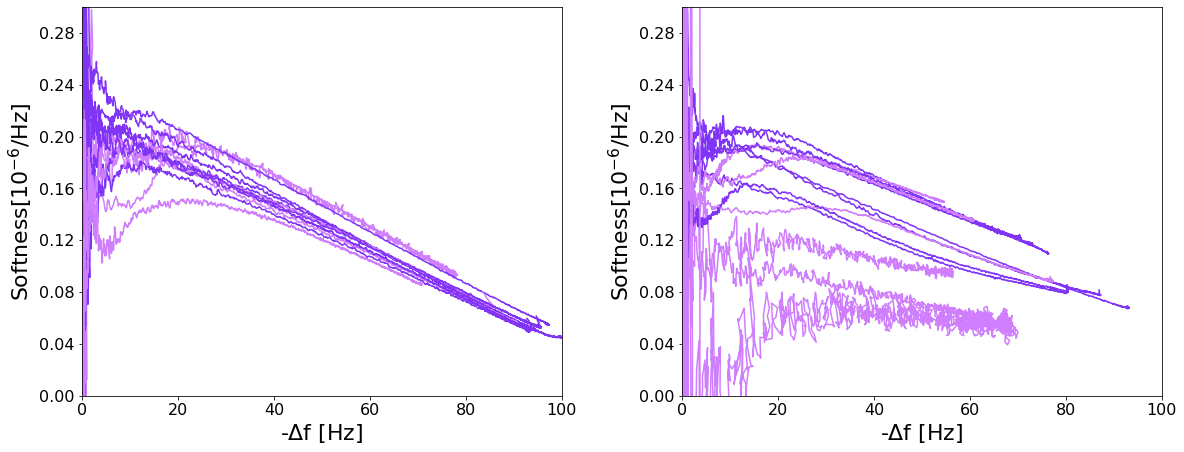

In [153]:
####Softness####

# show = [4, 30, 28, 36] #hex
#show = [9, 15, 26, 25] #oct
show = list(table[(table.GTP != "~")&(table.lipids == "mix")&(table.conc == 50)].index)

fig,(ax1, ax2) =plt.subplots(1,2)
# for a in ax.flat:
#     box = a.get_position()
#     a.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
#     a.tick_params(axis='y', labelsize=16)
#     a.tick_params(axis='x', labelsize=16)
#     a.set_ylabel(r'Softness[$10^{-6}$/Hz]', size=22)
#     a.set_xlabel(r'-$\Delta$f [Hz]', size=22)
#     a.yaxis.set_major_locator(MaxNLocator(9)) 
#     a.set_ylim([0,0.3])
#     a.set_xlim([0,100])
# da2.D7[(da2.index<=0)].plot(ax=ax2,legend=None)
for i in show:
    duration = table.loc[i,"duration"]
    S = np.array(table.loc[i, "soft"][0: duration].rolling(5).mean())
    F7 = np.array(table.loc[i, "F7"][0: duration].rolling(5).mean())
    if table.loc[i, "GTP"] == "+" and table.loc[i, "septin"] == "hex":
        ax1.plot(F7,S,color="#8034f6ff")
    elif table.loc[i, "GTP"] == "-" and table.loc[i, "septin"] == "hex":
        ax1.plot(F7,S,color="#cf7efdff")
    elif table.loc[i, "GTP"] == "+" and table.loc[i, "septin"] == "oct":
        ax2.plot(F7,S,color="#8034f6ff")
    elif table.loc[i, "GTP"] == "-" and table.loc[i, "septin"] == "oct":
        ax2.plot(F7,S,color="#cf7efdff")
    box = ax1.get_position()
    ax1.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    ax1.tick_params(axis='y', labelsize=16)
    ax1.tick_params(axis='x', labelsize=16)
    ax1.set_ylabel(r'Softness[$10^{-6}$/Hz]', size=22)
    ax1.set_xlabel(r'-$\Delta$f [Hz]', size=22)
    ax1.yaxis.set_major_locator(MaxNLocator(9)) 
    ax1.set_ylim([0,0.3])
    ax1.set_xlim([0,100])
    ax2.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    ax2.tick_params(axis='y', labelsize=16)
    ax2.tick_params(axis='x', labelsize=16)
    ax2.set_ylabel(r'Softness[$10^{-6}$/Hz]', size=22)
    ax2.set_xlabel(r'-$\Delta$f [Hz]', size=22)
    ax2.yaxis.set_major_locator(MaxNLocator(9)) 
    ax2.set_ylim([0,0.3])
    ax2.set_xlim([0,100])
    plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
    fig.set_size_inches(20, 7.5)
# fig.savefig(r"V:\tnw\bn\gk\GL\Thesis\Thesis_LaTeX_V2\phd-thesis-template-master\figs\Figures_thesis\Thesis\Ch4\QCM_D_intro"
#             +"\over_F"+ "-".join(str(e) for e in show)+".pdf", dpi=1200)

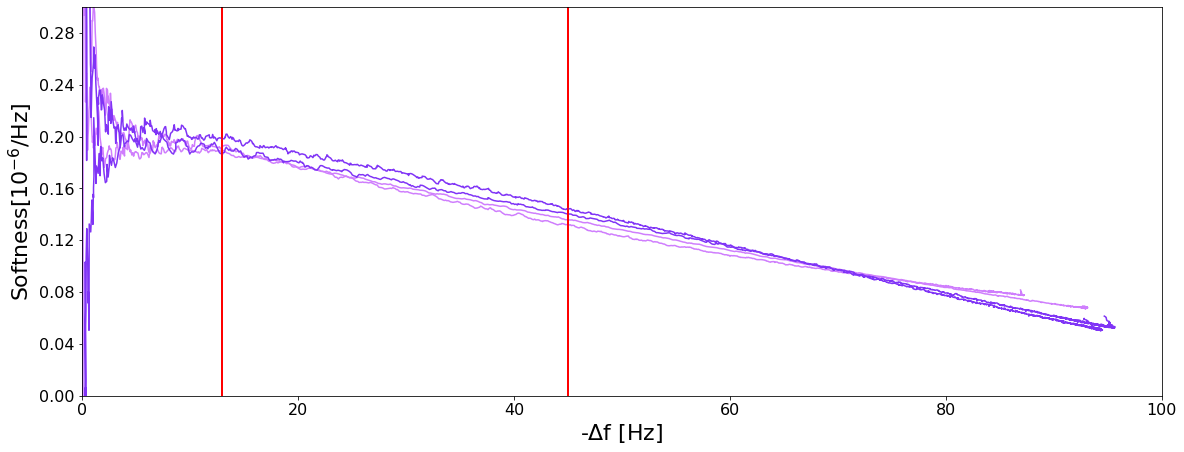

In [158]:
####Softness####

# show = [4, 30, 28, 36] #hex
#show = [9, 15, 26, 25] #oct
show = [9, 22, 36, 28]
# show = list(table[(table.GTP != "~")&(table.lipids == "mix")&(table.conc == 50)].index)

fig,ax1 =plt.subplots()
# for a in ax.flat:
#     box = a.get_position()
#     a.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
#     a.tick_params(axis='y', labelsize=16)
#     a.tick_params(axis='x', labelsize=16)
#     a.set_ylabel(r'Softness[$10^{-6}$/Hz]', size=22)
#     a.set_xlabel(r'-$\Delta$f [Hz]', size=22)
#     a.yaxis.set_major_locator(MaxNLocator(9)) 
#     a.set_ylim([0,0.3])
#     a.set_xlim([0,100])
# da2.D7[(da2.index<=0)].plot(ax=ax2,legend=None)
for i in show:
    duration = table.loc[i,"duration"]
    S = np.array(table.loc[i, "soft"][0: duration].rolling(5).mean())
    F7 = np.array(table.loc[i, "F7"][0: duration].rolling(5).mean())
    if table.loc[i, "GTP"] == "+" and table.loc[i, "septin"] == "hex":
        ax1.plot(F7,S,color="#8034f6ff")
#     elif table.loc[i, "GTP"] == "-" and table.loc[i, "septin"] == "hex":
#         ax1.plot(F7,S,color="#cf7efdff")
    elif table.loc[i, "GTP"] == "+" and table.loc[i, "septin"] == "oct":
        ax1.plot(F7,S,color="#cf7efdff")
#     elif table.loc[i, "GTP"] == "-" and table.loc[i, "septin"] == "oct":
#         ax1.plot(F7,S,color="#cf7efdff")
    box = ax1.get_position()
    ax1.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    ax1.tick_params(axis='y', labelsize=16)
    ax1.tick_params(axis='x', labelsize=16)
    ax1.set_ylabel(r'Softness[$10^{-6}$/Hz]', size=22)
    ax1.set_xlabel(r'-$\Delta$f [Hz]', size=22)
    ax1.yaxis.set_major_locator(MaxNLocator(9)) 
    ax1.set_ylim([0,0.3])
    ax1.set_xlim([0,100])
    ax1.axvline(x=13, color='red')
    ax1.axvline(x=45, color='red')
#     ax2.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
#     ax2.tick_params(axis='y', labelsize=16)
#     ax2.tick_params(axis='x', labelsize=16)
#     ax2.set_ylabel(r'Softness[$10^{-6}$/Hz]', size=22)
#     ax2.set_xlabel(r'-$\Delta$f [Hz]', size=22)
#     ax2.yaxis.set_major_locator(MaxNLocator(9)) 
#     ax2.set_ylim([0,0.3])
#     ax2.set_xlim([0,100])
    plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
    fig.set_size_inches(20, 7.5)
# fig.savefig(r"V:\tnw\bn\gk\GL\Thesis\Thesis_LaTeX_V2\phd-thesis-template-master\figs\Figures_thesis\Thesis\Ch4\QCM_D_intro"
#             +"\over_F"+ "-".join(str(e) for e in show)+".pdf", dpi=1200)

In [54]:
table[(table.GTP == "+")&(table.lipids == "mix")&(table.conc == 50)&(table.maxF >= 92)]

,F7,D7,soft,date,lipids,septin,GTP,conc,duration,maxF_fit,...,maxafterD,maxS,maxafterS,soft60,soft29t,soft70,maxafterF%,maxafterD%,thickness,thickness_after
9,Time -39.993898 -23.485324 -39.975803 -23....,Time -39.993898 1.324440 -39.975803 1.39...,Time -39.993898 -0.056394 -39.975803 -0.05...,20220531,mix,oct,+,50,35,96.971,...,0.0141932,0.0681102,0.343853,,0.0678048,0.097166,7.50508,0.224373,15.1816,1.13939
11,Time -40.980951 -24.044872 -40.962726 -24....,Time -40.980951 1.238244 -40.962726 1.24...,Time -40.980951 -0.051497 -40.962726 -0.05...,20220531,mix,hex,+,50,34,105.893,...,0.203536,0.0556183,0.372508,,0.0559131,0.106631,4.16723,3.86211,15.9179,0.663335
28,Time -47.997596 -24.032402 -47.984379 -23....,Time -47.997596 1.572077 -47.984379 1.43...,Time -47.997596 -0.065415 -47.984379 -0.05...,20220531,mix,hex,+,50,42,95.2453,...,0.13126,0.052778,0.303101,,0.0536313,0.095760,3.56414,2.48185,15.2061,0.541968
29,Time -47.997585 -23.302673 -47.984421 -23....,Time -47.997585 1.290804 -47.984421 1.28...,Time -47.997585 -0.055393 -47.984421 -0.05...,20220531,mix,hex,+,50,42,100.529,...,0.60429,0.045076,0.358694,,0.0448389,0.096307,1.83071,13.4922,16.5437,0.302867
31,Time -33.007055 -25.321036 -32.989443 -25....,Time -33.007055 1.583862 -32.989443 1.75...,Time -33.007055 -0.062551 -32.989443 -0.06...,20220531,mix,hex,+,50,41,95.4324,...,0.0921608,0.0514907,0.185266,,0.0517841,0.090518,5.15648,1.97263,15.1631,0.781883
32,Time -32.988611 -22.422577 -32.970824 -22....,Time -32.988611 1.784647 -32.970824 1.84...,Time -32.988611 -0.079592 -32.970824 -0.08...,20220531,mix,hex,+,50,41,97.1826,...,0.430218,0.0533778,0.361239,,0.0540838,0.095128,3.32849,8.71158,15.2903,0.508937
36,Time -26.993053 -20.946691 -26.975761 -20....,Time -26.993053 1.889026 -26.975761 1.93...,Time -26.993053 -0.090183 -26.975761 -0.09...,20220531,mix,hex,+,50,38,95.8163,...,0.274182,0.0540994,0.272599,,0.053379,0.097888,4.85919,4.89697,15.5084,0.753582


In [154]:
av = 50

show = list(table[(table.GTP != "~")&(table.conc == 50)&(table.lipids == "mix")].index)

result = {"+GTP":[], "-GTP":[]}
df = pd.DataFrame(columns = ["slope", "GTP", "septin"])
fig,ax=plt.subplots()

for i in show:
    septin = table.loc[i, "septin"]
    test = pd.DataFrame() 
    test["S"] = np.array(table.loc[i, "D7"][0: 29])
    test["F7"] = np.array(table.loc[i, "F7"][0: 29])
    s= test.set_index(["F7"])
    slope, intercept, r_value, p_value, std_err = linregress(list(s[s.index < 35].index), list(s[s.index < 35]["S"]))
    
    if table.loc[i, "GTP"] == "+":
        df.loc[i]= [slope, "+", septin]
    if table.loc[i, "GTP"] == "-":
        df.loc[i]= [slope, "-", septin]
to_plot = "slope"
pairs = [
    
    [('oct', '+'), ('oct', '-')],
    [('hex', '+'), ('hex', '-')],
    [('oct', '+'), ('hex', '+')],
    [('oct', '-'), ('hex', '-')],
    
    
    ]
groups = df.groupby(['septin', 'GTP'])

pvalues = []

for i in pairs:
    x = groups.get_group(i[0])[to_plot]
    y = groups.get_group(i[1])[to_plot]
    pvalues.append(mannwhitneyu(x,y, alternative="two-sided").pvalue)
        
ax = sns.boxplot(x="septin", y="slope", hue = "GTP", data=df, palette=['#ffa5a6ff', "#f14648ff"])
ax = sns.stripplot(x="septin", y="slope",hue = "GTP",dodge=True, color = 'black', data=df)
ax.set_ylim(bottom = 0, top  = 0.21) 
annotator = Annotator(ax, pairs, **hue_plot_params)
annotator.set_pvalues(pvalues)
annotator.annotate()
fig.savefig(r"V:\tnw\bn\gk\GL\Thesis\Thesis_LaTeX_V2\phd-thesis-template-master\figs\Figures_thesis\Thesis\Ch4\Softness and D"
            +"\slopesFT"+ "-".join(str(e) for e in show)+".pdf", dpi=1200)

SyntaxError: invalid syntax (<ipython-input-154-84f6f2bd5206>, line 3)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

hex vs. oct: Custom statistical test, P_val:5.777e-02


(<matplotlib.axes._subplots.AxesSubplot at 0x1eb6d40ba58>,
 [<statannotations.Annotation.Annotation at 0x1eb6eb97b70>])

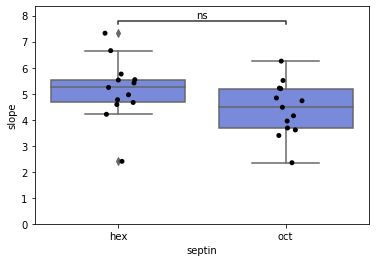

In [60]:
av = 50

show = list(table[(table.GTP != "~")&(table.conc == 50)&(table.lipids == "mix")].index)

result = {"+GTP":[], "-GTP":[]}
df = pd.DataFrame(columns = ["slope", "GTP", "septin"])
fig,ax=plt.subplots()

for i in show:
    septin = table.loc[i, "septin"]
    s = table.loc[i, "F7"][0: 10]
    slope, intercept, r_value, p_value, std_err = linregress(list(s.index), list(s))
    
    if table.loc[i, "GTP"] == "+":
        df.loc[i]= [slope, "+", septin]
    if table.loc[i, "GTP"] == "-":
        df.loc[i]= [slope, "-", septin]
to_plot = "slope"
pairs = [
    
    [('hex'), ('oct')]
    
    
    ]
groups = df.groupby(['septin'])

pvalues = []

for i in pairs:
    x = groups.get_group(i[0])[to_plot]
    y = groups.get_group(i[1])[to_plot]
    pvalues.append(mannwhitneyu(x,y, alternative="two-sided").pvalue)
        
ax = sns.boxplot(x="septin", y="slope", data=df, palette=['#697feaff'])
ax = sns.stripplot(x="septin", y="slope",dodge=True, color = 'black', data=df)
ax.set_ylim(bottom = 0, top  = 5) 
annotator = Annotator(ax, pairs, x="septin", y="slope", data=df)
annotator.set_pvalues(pvalues)
annotator.annotate()
# fig.savefig(r"V:\tnw\bn\gk\GL\Thesis\Thesis_LaTeX_V2\phd-thesis-template-master\figs\Figures_thesis\Thesis\Ch4\Softness and D"
#             +"\slopesFT"+ "-".join(str(e) for e in show)+".pdf", dpi=1200)

In [6]:
df = pd.DataFrame(columns = ["slope","intercept", "GTP", "septin", "time"])
start = 20
end = 50
show = list(table[(table.GTP != "~")&(table.conc == 50)&(table.lipids == "mix")&(table.maxF >= 60)].index)
for i in show:
    septin = table.loc[i, "septin"]
    test = pd.DataFrame() 
    test["soft"] = np.array(table.loc[i, "soft"][1: 29])
    test["F7"] = np.array(table.loc[i, "F7"][1: 29])
    s= test.set_index(["F7"])
    slope1, intercept1, r_value1, p_value1, std_err1 = linregress(list(s[(s.index >start)&(s.index < end)].index), 
                                                                  list(s[(s.index >start)&(s.index < end)]["soft"]))
    if table.loc[i, "GTP"] == "+":
        df.loc[i]= [slope1, intercept1,"+", septin, "early"]
    if table.loc[i, "GTP"] == "-":
        df.loc[i]= [slope1,intercept1, "-", septin, "early"]
    slope2, intercept2, r_value2, p_value2, std_err2 = linregress(list(s[s.index > end].index), list(s[s.index > end]["soft"]))
    i2 = i+0.5
    if table.loc[i, "GTP"] == "+":
        df.loc[i2]= [slope2,intercept2, "+", septin, "late"]
    if table.loc[i, "GTP"] == "-":
        df.loc[i2]= [slope2,intercept2, "-", septin, "late"]
# df
table[(table.GTP == "+")&(table.conc == 50)&(table.lipids == "mix")&(table.maxF >= 60)]

,F7,D7,soft,date,lipids,septin,GTP,conc,duration,maxF_fit,...,maxafterD,maxS,maxafterS,soft60,soft29t,soft70,maxafterF%,maxafterD%,thickness,thickness_after
9,Time -39.993898 -23.485324 -39.975803 -23....,Time -39.993898 1.324440 -39.975803 1.39...,Time -39.993898 -0.056394 -39.975803 -0.05...,20220531,mix,oct,+,50,35,96.971012,...,0.014193,0.06811,0.343853,,0.067805,0.097166,7.505079,0.224373,15.181597,1.139391
11,Time -40.980951 -24.044872 -40.962726 -24....,Time -40.980951 1.238244 -40.962726 1.24...,Time -40.980951 -0.051497 -40.962726 -0.05...,20220531,mix,hex,+,50,34,105.892787,...,0.203536,0.055618,0.372508,,0.055913,0.106631,4.16723,3.862114,15.917882,0.663335
12,Time -24.990682 -22.658604 -24.972439 -22....,Time -24.990682 1.342240 -24.972439 1.39...,Time -24.990682 -0.059238 -24.972439 -0.06...,20220531,mix,oct,+,50,33,82.569784,...,0.218407,0.079767,0.347824,,0.079232,0.087645,10.153416,3.322854,13.115235,1.331644
14,Time -26.985024 -23.236708 -26.966793 -23....,Time -26.985024 1.507972 -26.966793 1.47...,Time -26.985024 -0.064896 -26.966793 -0.06...,20220531,mix,oct,+,50,32,81.381003,...,-0.112424,0.112302,0.304562,,0.114138,0.120573,10.189868,-1.334103,12.49263,1.272982
20,Time -29.002513 -23.548629 -28.984422 -23....,Time -29.002513 1.261968 -28.984422 1.28...,Time -29.002513 -0.053590 -28.984422 -0.05...,20220531,mix,oct,+,50,33.5,73.571946,...,0.821199,0.117152,0.308403,,0.117262,0.121180,11.981754,9.572588,11.810441,1.415098
22,Time -30.988605 -23.744697 -30.970726 -23....,Time -30.988605 1.469472 -30.970726 1.47...,Time -30.988605 -0.061886 -30.970726 -0.06...,20220531,mix,oct,+,50,33,93.166848,...,1.126226,0.079147,0.368502,,0.079259,0.095314,8.471371,16.299692,14.273697,1.209178
24,Time -25.505978 -22.878181 -25.488681 -22....,Time -25.505978 1.227353 -25.488681 1.33...,Time -25.505978 -0.053647 -25.488681 -0.05...,20220531,mix,oct,+,50,31.5,73.69859,...,-0.628655,0.122742,0.347466,,0.12356,0.123127,10.167199,-7.212443,11.515393,1.170793
26,Time -27.491964 -24.365005 -27.474793 -24....,Time -27.491964 1.391389 -27.474793 1.41...,Time -27.491964 -0.057106 -27.474793 -0.05...,20220531,mix,oct,+,50,31,91.505499,...,0.227146,0.080689,0.317197,,0.081703,0.089329,9.271498,3.395206,13.152512,1.219435
28,Time -47.997596 -24.032402 -47.984379 -23....,Time -47.997596 1.572077 -47.984379 1.43...,Time -47.997596 -0.065415 -47.984379 -0.05...,20220531,mix,hex,+,50,42,95.245324,...,0.13126,0.052778,0.303101,,0.053631,0.095760,3.564143,2.481848,15.206138,0.541968
29,Time -47.997585 -23.302673 -47.984421 -23....,Time -47.997585 1.290804 -47.984421 1.28...,Time -47.997585 -0.055393 -47.984421 -0.05...,20220531,mix,hex,+,50,42,100.52856,...,0.60429,0.045076,0.358694,,0.044839,0.096307,1.830714,13.492156,16.54367,0.302867


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

late_hex vs. late_oct: Custom statistical test, P_val:9.524e-03
early_hex vs. early_oct: Custom statistical test, P_val:1.905e-02
early_hex vs. late_hex: Custom statistical test, P_val:2.597e-02
early_oct vs. late_oct: Custom statistical test, P_val:6.857e-01


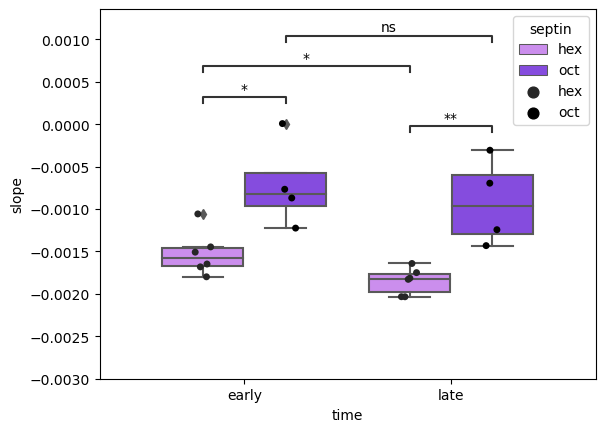

In [28]:
to_plot = 'slope'
# 
data = df[df.GTP == "-"]
hue_plot_params = {
    'data': data,
    'x': 'time',
    'y': to_plot,
    "hue": "septin",
}

pairs = [
    
    [('early', 'hex'), ('late', 'hex')],
    [('early', 'oct'), ('late', 'oct')],
    [('early', 'hex'), ('early', 'oct')],
    [('late', 'hex'), ('late', 'oct')],
    
    
    ]
groups = data.groupby(['time', 'septin'])

pvalues = []

for i in pairs:
    x = groups.get_group(i[0])[to_plot]
    y = groups.get_group(i[1])[to_plot]
    pvalues.append(mannwhitneyu(x,y, alternative="two-sided").pvalue)
    
    
    
# print(groups.get_group(('hex', "+"))['maxF'])


# print(pvalues)
fig,ax=plt.subplots()
ax = sns.boxplot(**hue_plot_params, palette=['#cf7efdff', '#8034f6ff'])
sns.stripplot(**hue_plot_params,dodge=True, color = 'black')
ax.set_ylim(-0.003, 0.0005) 
handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
# l = plt.legend(handles[0:0], ["- GTP", "+ GTP"], bbox_to_anchor=(0.79, 0.991), loc=2, borderaxespad=0.)

annotator = Annotator(ax, pairs, **hue_plot_params)
annotator.set_pvalues(pvalues)
annotator.annotate()
fig.savefig(r"M:\tnw\bn\gk\GL\Thesis\Thesis_LaTeX_V2\phd-thesis-template-master\figs\Figures_thesis\Thesis\Ch4\Softness and D"
            +"\slopes_box-GTP"+".pdf", dpi=1200)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

late_+ vs. late_-: Custom statistical test, P_val:3.152e-01
early_+ vs. early_-: Custom statistical test, P_val:6.061e-03
early_+ vs. late_+: Custom statistical test, P_val:4.079e-03
early_- vs. late_-: Custom statistical test, P_val:6.857e-01


(<Axes: xlabel='time', ylabel='slope'>,
  <statannotations.Annotation.Annotation at 0x219934b4dd0>])

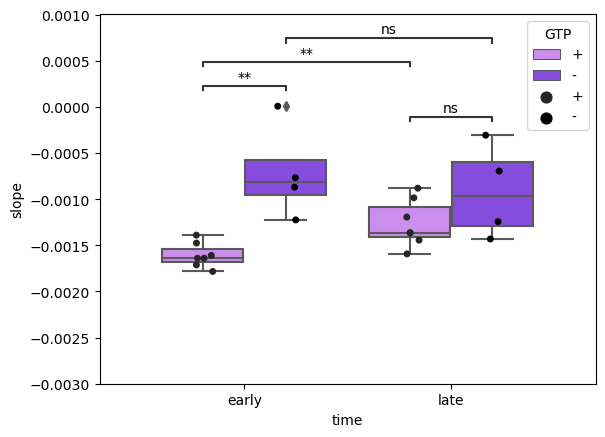

In [17]:
to_plot = 'slope'
# 
data = df[df.septin == "oct"]
hue_plot_params = {
    'data': data,
    'x': 'time',
    'y': to_plot,
    "hue": "GTP",
}

pairs = [
    
    [('early', '+'), ('late', '+')],
    [('early', '-'), ('late', '-')],
    [('early', '+'), ('early', '-')],
    [('late', '+'), ('late', '-')],
    
    
    ]
groups = data.groupby(['time', 'GTP'])

pvalues = []

for i in pairs:
    x = groups.get_group(i[0])[to_plot]
    y = groups.get_group(i[1])[to_plot]
    pvalues.append(mannwhitneyu(x,y, alternative="two-sided").pvalue)
    
    
    
# print(groups.get_group(('hex', "+"))['maxF'])


# print(pvalues)
fig,ax=plt.subplots()
ax = sns.boxplot(**hue_plot_params, palette=['#cf7efdff', '#8034f6ff'])
sns.stripplot(**hue_plot_params,dodge=True, color = 'black')
ax.set_ylim(-0.003, -0.0005) 
handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
# l = plt.legend(handles[0:0], ["- GTP", "+ GTP"], bbox_to_anchor=(0.79, 0.991), loc=2, borderaxespad=0.)

annotator = Annotator(ax, pairs, **hue_plot_params)
annotator.set_pvalues(pvalues)
annotator.annotate()
# fig.savefig(r"M:\tnw\bn\gk\GL\Thesis\Thesis_LaTeX_V2\phd-thesis-template-master\figs\Figures_thesis\Thesis\Ch4\Softness and D"
#             +"\slopes_box"+".pdf", dpi=1200)

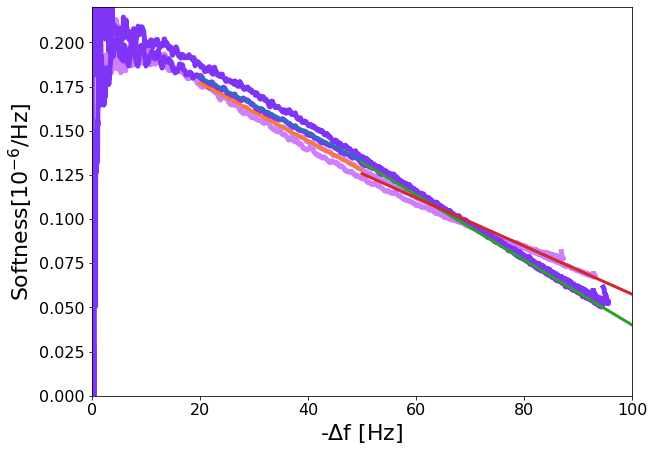

In [260]:
####Softness####

# show = [4, 30, 28, 36] #hex
#show = [9, 15, 26, 25] #oct
show = [9, 22, 36, 28]
# show = list(table[(table.GTP != "~")&(table.lipids == "mix")&(table.conc == 50)].index)

fig,ax1 =plt.subplots()
# for a in ax.flat:
#     box = a.get_position()
#     a.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
#     a.tick_params(axis='y', labelsize=16)
#     a.tick_params(axis='x', labelsize=16)
#     a.set_ylabel(r'Softness[$10^{-6}$/Hz]', size=22)
#     a.set_xlabel(r'-$\Delta$f [Hz]', size=22)
#     a.yaxis.set_major_locator(MaxNLocator(9)) 
#     a.set_ylim([0,0.3])
#     a.set_xlim([0,100])
# da2.D7[(da2.index<=0)].plot(ax=ax2,legend=None)
for i in show:
    duration = table.loc[i,"duration"]
    S = np.array(table.loc[i, "soft"][0: duration].rolling(5).mean())
    F7 = np.array(table.loc[i, "F7"][0: duration].rolling(5).mean())
    if table.loc[i, "GTP"] == "+" and table.loc[i, "septin"] == "hex":
        ax1.plot(F7,S,color="#8034f6ff", linewidth = 5)
#     elif table.loc[i, "GTP"] == "-" and table.loc[i, "septin"] == "hex":
#         ax1.plot(F7,S,color="#cf7efdff")
    if table.loc[i, "GTP"] == "+" and table.loc[i, "septin"] == "oct":
        ax1.plot(F7,S,color="#cf7efdff", linewidth = 5)
#     elif table.loc[i, "GTP"] == "-" and table.loc[i, "septin"] == "oct":
#         ax1.plot(F7,S,color="#cf7efdff")

# x = np.arange(0, 100, 0.1)
# y = df.loc[i,"slope"] * x + df.loc[i,"intercept"]


box = ax1.get_position()
ax1.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
ax1.tick_params(axis='y', labelsize=16)
ax1.tick_params(axis='x', labelsize=16)
ax1.set_ylabel(r'Softness[$10^{-6}$/Hz]', size=22)
ax1.set_xlabel(r'-$\Delta$f [Hz]', size=22)
ax1.yaxis.set_major_locator(MaxNLocator(9)) 
ax1.set_ylim([0,0.22])
ax1.set_xlim([0,100])
# ax1.axvline(x=13, color='red')
# ax1.axvline(x=45, color='red')
#     ax2.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
#     ax2.tick_params(axis='y', labelsize=16)
#     ax2.tick_params(axis='x', labelsize=16)
#     ax2.set_ylabel(r'Softness[$10^{-6}$/Hz]', size=22)
#     ax2.set_xlabel(r'-$\Delta$f [Hz]', size=22)
#     ax2.yaxis.set_major_locator(MaxNLocator(9)) 
#     ax2.set_ylim([0,0.3])
#     ax2.set_xlim([0,100])


x = np.arange(start, end, 0.1)
y = np.median(df.slope[(df.time == "early")&(df.septin  == "hex")&(df.GTP  == "+")]) * x +  np.median(df.intercept[(df.time == "early")&(df.septin  == "hex")&(df.GTP  == "+")])
ax1.plot(x,y,linewidth = 3)
y = np.median(df.slope[(df.time == "early")&(df.septin  == "oct")&(df.GTP  == "+")]) * x +  np.median(df.intercept[(df.time == "early")&(df.septin  == "oct")&(df.septin  == "oct")])
ax1.plot(x,y,linewidth = 3)
x = np.arange(end, 100, 0.1)
y = np.median(df.slope[(df.time == "late")&(df.septin  == "hex")&(df.GTP  == "+")]) * x +  np.median(df.intercept[(df.time == "late")&(df.septin  == "hex")&(df.GTP  == "+")])
ax1.plot(x,y,linewidth = 3)
y = np.median(df.slope[(df.time == "late")&(df.septin  == "oct")&(df.GTP  == "+")]) * x +  np.median(df.intercept[(df.time == "late")&(df.septin  == "oct")&(df.GTP  == "+")])
ax1.plot(x,y,linewidth = 3)
plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
fig.set_size_inches(10, 7.5)
    
    
    
fig.savefig(r"V:\tnw\bn\gk\GL\Thesis\Thesis_LaTeX_V2\phd-thesis-template-master\figs\Figures_thesis\Thesis\Ch4\Softness and D"
            +"\slopes_soft"+ "-".join(str(e) for e in show)+".pdf", dpi=1200)

In [240]:
(df.intercept[(df.time == "early")&(df.septin  == "oct")&(df.GTP  == "+")])

9.0     0.209785
12.0    0.187358
14.0    0.238449
20.0    0.218786
22.0    0.211502
24.0    0.225677
26.0    0.192200
Name: intercept, dtype: float64

In [313]:
test = pd.DataFrame() 
test["S"] = np.array(table.loc[5, "D7"][0: 29])
test["F7"] = np.array(table.loc[5, "F7"][0: 29])
s= test.set_index(["F7"])
slope, intercept, r_value, p_value, std_err = linregress(list(s[s.index < 35].index), list(s[s.index < 35]["S"]))


[0.8641010269517988, 0.05761535723734474, 0.0004453148678772885, 0.36945075299553587]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

oct_- vs. oct_+: Custom statistical test, P_val:8.641e-01
hex_- vs. hex_+: Custom statistical test, P_val:5.762e-02
hex_+ vs. oct_+: Custom statistical test, P_val:4.453e-04
hex_- vs. oct_-: Custom statistical test, P_val:3.695e-01


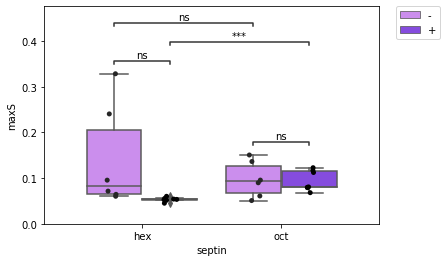

In [160]:
to_plot = 'maxS'

hue_plot_params = {
    'data': table[(table.GTP != "~")&(table.lipids == "mix")&(table.conc == 50)],
    'x': 'septin',
    'y': to_plot,
    "hue": "GTP",
}

pairs = [
    
    [('oct', '+'), ('oct', '-')],
    [('hex', '+'), ('hex', '-')],
    [('oct', '+'), ('hex', '+')],
    [('oct', '-'), ('hex', '-')],
    
    
    ]
groups = table[(table.lipids == "mix")&(table.conc == 50)].groupby(['septin', 'GTP'])

pvalues = []

for i in pairs:
    x = groups.get_group(i[0])[to_plot]
    y = groups.get_group(i[1])[to_plot]
    pvalues.append(ttest_ind(x,y).pvalue)
    
    
    
# print(groups.get_group(('hex', "+"))['maxF'])


print(pvalues)
fig,ax=plt.subplots()
ax = sns.boxplot(**hue_plot_params, palette=["#cf7efdff", '#8034f6ff'])
sns.stripplot(**hue_plot_params,dodge=True, color = 'black')
ax.set_ylim(bottom = 0) 
handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

annotator = Annotator(ax, pairs, **hue_plot_params)
annotator.set_pvalues(pvalues)
annotator.annotate()
# fig.savefig(r"V:\tnw\bn\gk\GL\Results\QCM-D\Softness"+r"\final_values"+"-".join(str(e) for e in show)+".png", dpi=300)

[0.6869970544568866, 0.7086354748601515, 0.20403194125682178, 0.9790337901764742]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

oct_- vs. oct_+: Custom statistical test, P_val:6.870e-01
hex_- vs. hex_+: Custom statistical test, P_val:7.086e-01
hex_+ vs. oct_+: Custom statistical test, P_val:2.040e-01
hex_- vs. oct_-: Custom statistical test, P_val:9.790e-01


(<matplotlib.axes._subplots.AxesSubplot at 0x26c7ae5fac8>,
  <statannotations.Annotation.Annotation at 0x26c797b4cf8>])

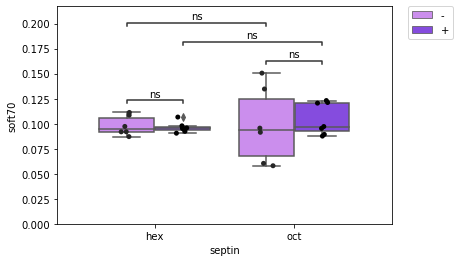

In [200]:
to_plot = 'soft70'

hue_plot_params = {
    'data': table[(table.GTP != "~")&(table.lipids == "mix")&(table.conc == 50)],
    'x': 'septin',
    'y': to_plot,
    "hue": "GTP",
}

pairs = [
    
    [('oct', '+'), ('oct', '-')],
    [('hex', '+'), ('hex', '-')],
    [('oct', '+'), ('hex', '+')],
    [('oct', '-'), ('hex', '-')],
    
    
    ]
groups = table[(table.lipids == "mix")&(table.conc == 50)].groupby(['septin', 'GTP'])

pvalues = []

for i in pairs:
    x = groups.get_group(i[0])[to_plot]
    y = groups.get_group(i[1])[to_plot]
    pvalues.append(ttest_ind(x,y).pvalue)
    
    
    
# print(groups.get_group(('hex', "+"))['maxF'])


print(pvalues)
fig,ax=plt.subplots()
ax = sns.boxplot(**hue_plot_params, palette=["#cf7efdff", '#8034f6ff'])
sns.stripplot(**hue_plot_params,dodge=True, color = 'black')
ax.set_ylim(bottom = 0) 
handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

annotator = Annotator(ax, pairs, **hue_plot_params)
annotator.set_pvalues(pvalues)
annotator.annotate()
# fig.savefig(r"V:\tnw\bn\gk\GL\Results\QCM-D\Softness"+r"\final_values"+"-".join(str(e) for e in show)+".png", dpi=300)

[0.836393500211561, 0.0019311027798175932, 0.0004936795216455565, 0.35671214440585863]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

oct_- vs. oct_+: Custom statistical test, P_val:8.364e-01
hex_- vs. hex_+: Custom statistical test, P_val:1.931e-03
hex_+ vs. oct_+: Custom statistical test, P_val:4.937e-04
hex_- vs. oct_-: Custom statistical test, P_val:3.567e-01


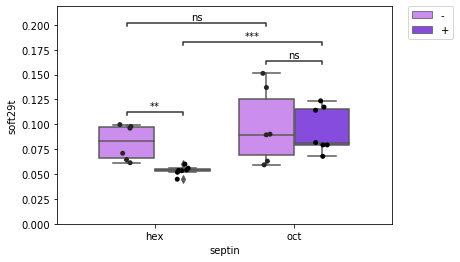

In [366]:
to_plot = 'soft29t'

hue_plot_params = {
    'data': table[(table.GTP != "~")&(table.lipids == "mix")&(table.conc == 50)],
    'x': 'septin',
    'y': to_plot,
    "hue": "GTP",
}

pairs = [
    
    [('oct', '+'), ('oct', '-')],
    [('hex', '+'), ('hex', '-')],
    [('oct', '+'), ('hex', '+')],
    [('oct', '-'), ('hex', '-')],
    
    
    ]
groups = table[(table.lipids == "mix")&(table.conc == 50)].groupby(['septin', 'GTP'])

pvalues = []

for i in pairs:
    x = groups.get_group(i[0])[to_plot]
    y = groups.get_group(i[1])[to_plot]
    pvalues.append(ttest_ind(x,y).pvalue)
    
    
    
# print(groups.get_group(('hex', "+"))['maxF'])


print(pvalues)
fig,ax=plt.subplots()
ax = sns.boxplot(**hue_plot_params, palette=["#cf7efdff", '#8034f6ff'])
sns.stripplot(**hue_plot_params,dodge=True, color = 'black')
ax.set_ylim(bottom = 0) 
handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

annotator = Annotator(ax, pairs, **hue_plot_params)
annotator.set_pvalues(pvalues)
annotator.annotate()
fig.savefig(r"V:\tnw\bn\gk\GL\Thesis\Thesis_LaTeX_V2\phd-thesis-template-master\figs\Figures_thesis\Thesis\Ch4\Softness and D"
            +"\S_at29"+ "-".join(str(e) for e in show)+".pdf", dpi=1200)

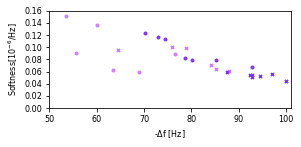

In [246]:
####Softness####

# show = [4, 30, 28, 36] #hex
#show = [9, 15, 26, 25] #oct
show = list(table[(table.GTP != "~")&(table.lipids == "mix")&(table.conc == 50)].index)

fig,ax1 =plt.subplots()
for i in show:
    S=table.loc[i, "soft"][min(list(table.loc[i, "soft"].index), key=lambda x: abs(x - 29))] 
    F7 = table.loc[i, "F7"][min(list(table.loc[i, "soft"].index), key=lambda x: abs(x - 29))]
#     print(S, F7, table.loc[i, "GTP"], table.loc[i, "septin"])
    if table.loc[i, "GTP"] == "+" and table.loc[i, "septin"] == "hex":
        ax1.scatter(F7,S,color="#8034f6ff", marker = "x", s = 10)
    elif table.loc[i, "GTP"] == "-" and table.loc[i, "septin"] == "hex":
        ax1.scatter(F7,S,color="#cf7efdff", marker = "x", s = 10)
    elif table.loc[i, "GTP"] == "+" and table.loc[i, "septin"] == "oct":
        ax1.scatter(F7,S,color="#8034f6ff", marker = "8", s = 10)
    elif table.loc[i, "GTP"] == "-" and table.loc[i, "septin"] == "oct":
        ax1.scatter(F7,S,color="#cf7efdff", marker = "8", s = 10)
#     box = a.get_position()
    ax1.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    ax1.tick_params(axis='y', labelsize=8)
    ax1.tick_params(axis='x', labelsize=8)
    ax1.set_ylabel(r'Softness[$10^{-6}$/Hz]', size=8)
    ax1.set_xlabel(r'-$\Delta$f [Hz]', size=8)
    ax1.yaxis.set_major_locator(MaxNLocator(9)) 
    ax1.set_ylim([0.0,0.16])
    ax1.set_xlim([50,101])
    plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
    fig.set_size_inches(4.477086614, 1.87905512)
fig.savefig(r"V:\tnw\bn\gk\GL\Thesis\Thesis_LaTeX_V2\phd-thesis-template-master\figs\Figures_thesis\Thesis\Ch4\QCM_D_intro"
            +"\overF_at29"+ "-".join(str(e) for e in show)+".pdf", dpi=1200)

In [179]:
print(table.loc[6, "soft"][min(list(table.loc[6, "soft"].index), key=lambda x: abs(x - 29))], 
table.loc[6, "F7"][min(list(table.loc[6, "soft"].index), key=lambda x: abs(x - 29))])

# table.loc[6, "soft"][min(list(table.loc[6, "soft"].index), key=lambda x: abs(x - 29))]

0.05761627155955104 54.83453084315577


[0.0016086708566822499, 0.0016086708566822499, 0.5308693039685082]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

20%PS vs. mix: Custom statistical test, P_val:1.609e-03
DOPC vs. 20%PS: Custom statistical test, P_val:5.309e-01
DOPC vs. mix: Custom statistical test, P_val:1.609e-03


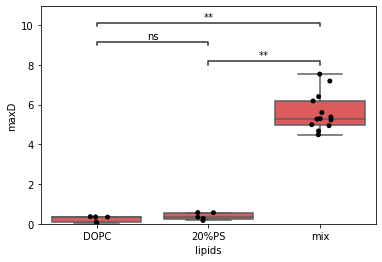

In [64]:
to_plot = 'maxD'

septin = 'hex'
hue_plot_params = {
    'data': table[(table.GTP != "~")&(table.septin == septin)&(table.conc == 50)],
    "order": ["DOPC","20%PS","mix"],
    'x': 'lipids',
    'y': to_plot,
#     "hue": "GTP",
}

# print(groups.get_group(('hex', "+"))['maxF'])

pairs = [
    [('DOPC'), ('mix')], 
    [('20%PS'), ('mix')],
    [('DOPC'), ('20%PS')]
    ]
groups = table[(table.septin == septin)&(table.conc == 50)].groupby(['lipids'])

pvalues = []

for i in pairs:
    x = groups.get_group(i[0])[to_plot]
    y = groups.get_group(i[1])[to_plot]
    pvalues.append(mannwhitneyu(x,y, alternative="two-sided").pvalue)
    
    
    
# print(groups.get_group(('hex', "+"))['maxF'])
# palette=['#47c6d2ff', '#5471ffff'])
# palette=['#ffa5a6ff', "#f14648ff"]

print(pvalues)
fig,ax=plt.subplots()
# "#f14648ff" D
# '#5471ffff' F
ax = sns.boxplot(**hue_plot_params, palette=["#f14648ff"])
sns.stripplot(**hue_plot_params,dodge=True, color = 'black')
ax.set_ylim(bottom = 0) 
handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
# l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(0.05, 0.991), loc=2, borderaxespad=0.)

annotator = Annotator(ax, pairs, **hue_plot_params)
annotator.set_pvalues(pvalues)
annotator.annotate()
# ax.set_ylim([-0,20])
fig.savefig(r"V:\tnw\bn\gk\GL\Presentations\GM\Pictures GM 20221107"+"\lipids_maxD_hex"+".png", dpi=500)

# https://levelup.gitconnected.com/statistics-on-seaborn-plots-with-statannotations-2bfce0394c00

In [35]:
groups = table[(table.septin == "oct")&(table.conc == 50)].groupby(['lipids', 'GTP'])
groups.groups.keys()
# print(groups.get_group(('20%PS', "+"))['maxF'])

dict_keys([('20%PS', '+'), ('20%PS', '-'), ('DOPC', '+'), ('DOPC', '-'), ('mix', '+'), ('mix', '-')])

In [20]:
table

,F7,D7,soft,date,lipids,septin,GTP,conc,duration,maxF_fit,t_c,error_fit,maxF,maxD,maxafterF,maxafterD,maxafterF%,maxafterD%
0,Time -26.000265 -25.099136 -25.982252 -25....,Time -26.000265 -1.021051 -25.982252 -1.02...,Time -26.000265 0.040681 -25.982252 0.04...,20220531,DOPC,hex,-,50,32,NaN,NaN,NaN,0.138891,0.0877692,3.99976,1.38833,2879.78,1581.79
1,Time -26.001192 -23.775233 -25.983310 -23....,Time -26.001192 0.050690 -25.983310 0.01...,Time -26.001192 -0.002132 -25.983310 -0.00...,20220531,DOPC,hex,-,50,32,NaN,NaN,NaN,0.374512,0.0156682,-1.43086,-0.639523,-382.06,-4081.65
2,Time -25.982108 -24.908556 -25.964350 -24....,Time -25.982108 0.108198 -25.964350 0.07...,Time -25.982108 -0.004344 -25.964350 -0.00...,20220531,20%PS,hex,-,50,32,NaN,NaN,NaN,0.509247,0.16715,3.76729,1.37441,739.776,822.261
3,Time -25.982120 -23.481879 -25.964472 -23....,Time -25.982120 0.267298 -25.964472 0.23...,Time -25.982120 -0.011383 -25.964472 -0.01...,20220531,20%PS,hex,-,50,32,NaN,NaN,NaN,0.32126,0.26564,-5.25375,-1.87199,-1635.36,-704.712
4,Time -24.503133 -24.086088 -24.487069 -23....,Time -24.503133 1.556273 -24.487069 1.66...,Time -24.503133 -0.064613 -24.487069 -0.07...,20220531,mix,hex,-,50,29,79.484,6.95566,1.97137,77.0264,7.18376,4.45552,1.56534,5.7844,21.7899
5,Time -24.996367 -23.553899 -24.980309 -23....,Time -24.996367 1.412673 -24.980309 1.37...,Time -24.996367 -0.059976 -24.980309 -0.05...,20220531,mix,hex,-,50,29,77.9348,7.54111,2.22587,76.0689,7.53211,3.89882,1.67418,5.12538,22.2272
6,Time -26.492848 2.688809 -26.476844 2....,Time -26.492848 1.411001 -26.476844 1.41...,Time -26.492848 0.524768 -26.476844 0.54...,20220531,noSLB,hex,-,50,28,NaN,NaN,NaN,92.5715,3.15109,45.5889,2.89,49.2472,91.7143
7,Time -26.493433 4.657833 -26.477422 4....,Time -26.493433 0.989545 -26.477422 1.02...,Time -26.493433 0.212447 -26.477422 0.21...,20220531,noSLB,hex,-,50,28,NaN,NaN,NaN,90.1334,1.97198,44.8571,1.74806,49.7675,88.6445
8,Time -39.491565 -23.219263 -39.473544 -23....,Time -39.491565 1.258141 -39.473544 1.24...,Time -39.491565 -0.054185 -39.473544 -0.05...,20220531,mix,oct,+,17.3,35,26.0731,9.0856,0.58045,23.8024,4.50362,6.29829,2.19192,26.4608,48.6701
9,Time -39.993898 -23.485324 -39.975803 -23....,Time -39.993898 1.324440 -39.975803 1.39...,Time -39.993898 -0.056394 -39.975803 -0.05...,20220531,mix,oct,+,50,35,96.971,6.91507,2.03409,92.6077,6.3257,6.95028,2.40501,7.50508,38.0197


In [173]:
# [0:48]


In [107]:
diff(x)

array([-0.20482576,  0.30875911,  0.00784329, ..., -0.09725145,
        0.08515442,  0.03024764])

In [105]:
gradient(x)

array([-0.20482576,  0.05196668,  0.1583012 , ..., -0.00604851,
        0.05770103,  0.03024764])

In [262]:
list(table[(table.GTP != "~")&(table.septin == "hex")&(table.conc == 50)&(table.lipids == "mix")].index)

[4, 5, 11, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]

NameError: name 'gradient' is not defined

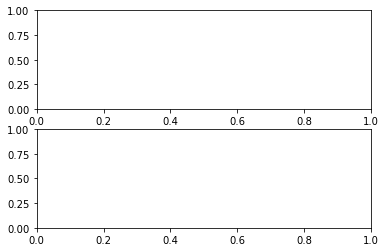

In [302]:
# show = [9, 13, 11, 25] #oct
# show = [4, 30, 28, 36] #hex
av = 50

show = list(table[(table.GTP != "~")&(table.conc == 50)&(table.lipids == "mix")].index)

result = {"+GTP":[], "-GTP":[]}
df = pd.DataFrame(columns = ["slope", "GTP", "septin"])
fig,(ax, ax2)=plt.subplots(2,1)
# da2.D7[(da2.index<=0)].plot(ax=ax2,legend=None)
for i in show:
    duration = table.loc[i,"duration"]
    septin = table.loc[i,"septin"]
    x2 = table.loc[i, "F7"].rolling(av).mean()
    y = table.loc[i, "F7"].index
    dxdy=pd.Series(gradient(x2)/gradient(y),y)
#     print(np.median(dxdy[6:10]))
    
    if table.loc[i, "GTP"] == "+":
#         print ("+")
        df.loc[i]= [float(pd.Series([np.mean(dxdy[6:10])])), "+", septin]
        ax.plot(dxdy[0:],color="#5471ffff")
#         ax.plot(x2[0:],color="#5471ffff")
    if table.loc[i, "GTP"] == "-":
#         print("-")
        df.loc[i]= [float(pd.Series([np.mean(dxdy[6:10])])), "-", septin]
        result["-GTP"].append(np.mean(dxdy[6:10]))
        ax.plot(dxdy[0:duration],color="#47c6d2ff")
#         ax.plot(x2[0:duration],color="#47c6d2ff")
    box = ax.get_position()
    ax.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    ax.tick_params(axis='y', labelsize=16)
    ax.tick_params(axis='x', labelsize=16)
    ax.set_ylabel(r"-$\Delta$f' [Hz]", size=22)
    ax.set_xlabel('Time [min]', size=22)
    ax.yaxis.set_major_locator(MaxNLocator(9)) 
    ax.set_ylim([-2,50])
    ax.set_xlim([2,15])
#     ax2.set_ylim([-1,1])
    plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
    fig.set_size_inches(12, 18)
    
# print(df)
ax2 = sns.boxplot(x="septin", y="slope", hue = "GTP", data=df)
ax2 = sns.stripplot(x="septin", y="slope",hue = "GTP",dodge=True, color = 'black', data=df)
ax2.set_ylim(bottom = 0) 
# print(result)
    
# fig.savefig(r"V:\tnw\bn\gk\GL\Papers\2022 - Membrane with Felix and Djim\Figures\Fig_2"+"\GTP_oct_F_"+
#             "-".join(str(e) for e in show)+".png", dpi=300)

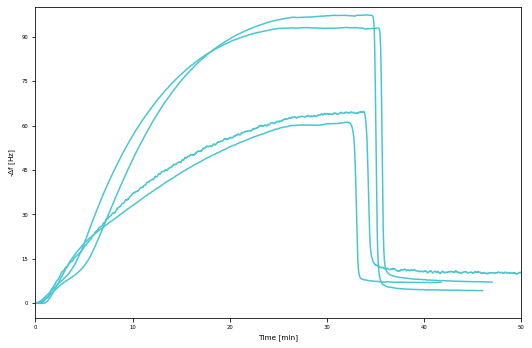

In [198]:
####Figure 1 - F ####

# show = [4, 30, 28, 36] #hex
show = [9, 13, 11, 25] #oct
# show = [0, 6, 34] #hex, no GTP, DOPC, noSLB, mix



fig,ax=plt.subplots()
# da2.D7[(da2.index<=0)].plot(ax=ax2,legend=None)
for i in show:
    F = table.loc[i, "F7"]
    if table.loc[i, "lipids"] == "noSLB":
        F[(F.index >= 0)].rolling(10).mean().plot(ax=ax,color="#5471ffff",legend=None)
    elif table.loc[i, "lipids"] == "mix":
        F[(F.index >= 0)].rolling(10).mean().plot(ax=ax,color="#47c6d2ff",legend=None)
    elif table.loc[i, "lipids"] == "DOPC":
        F[(F.index >= 0)].rolling(10).mean().plot(ax=ax,color="#8ce7e3ff",legend=None)
    box = ax.get_position()
    ax.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    ax.tick_params(axis='y', labelsize=16/3)
    ax.tick_params(axis='x', labelsize=16/3)
    ax.set_ylabel(r'-$\Delta$f [Hz]', size=22/3)
    ax.set_xlabel('Time [min]', size=22/3)
    ax.yaxis.set_major_locator(MaxNLocator(9)) 
    ax.set_ylim([-5,100])
    ax.set_xlim([0,50])
#     ax2.set_ylim([-1,1])
    plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
#     fig.set_size_inches(9/3, 6/3)
    fig.set_size_inches(9, 6)

In [ ]:
#Talk with Felix to fit with his model. 
#Have a look at the 

Older code

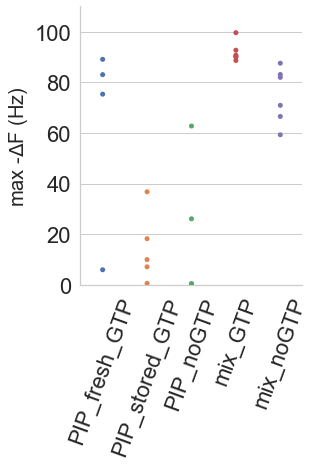

In [6]:
def end_result(inp):
    result = []
    for i in inp: 
        da = pd.read_table(i.split(";")[0], decimal=',', sep='\t', lineterminator='\n')
        if i.split(";")[0][-20:-4] == "20220531_8_noSLB":
            da = da.set_axis(['Time', 'F5', 'D5', 'F7', 'D7', 'F9', 'D9', "Meas.Temp.Time", "Tact"], axis=1, inplace=False)
        else:
            da = da.set_axis(['Time', 'F3', 'D3', 'F5', 'D5', 'F7', 'D7', 'F9', 'D9', 'F11', 'D13', "Meas.Temp.Time", "Tact"], axis=1, inplace=False)
        da = da.drop(["Meas.Temp.Time", "Tact"], axis=1)
        da= da.dropna()
        da2=da.astype(float)
        da2.Time=da2.Time/60
        T=int(i.split(";")[1])
        da2.Time=da2.Time-find_nearest(da2.Time,T)
        da2.F7=da2.F7-float(da2.F7[da2.Time==0.0])
        da2.D7=da2.D7-float(da2.D7[da2.Time==0.0])

        da2=da2.set_index('Time')

        data = da2.F7[(da2.index>=0) & (da2.index<=int(i.split(";")[2]))]
        result.append((data[int(i.split(";")[2])-1:int(i.split(";")[2])].mean(axis=0))*-1)
    return (result)
        

pip_stored_GTP = [path4+file41+";45;40", path5+file53+";40;40",path6+file61+";38;20", path6+file62+";38;20", path6+file63+";25;39"]
pip_GTP = [path6+file64+";25;39", path6+file65+";25;39", path7+file73+";20;42", path7+file74+";20;42"]
pip_noGTP = [path4+file42+";45;40", path5+file54+";40;40",path6+file66+";38;20", path6+file67+";38;20", path7+file77+";20;42"]
mix_GTP = [path8+file81+";40;45", path8+file82+";40;45", path8+file84+";30;44", path8+file85+";30;44",
           path8+file88+";25;39", path8+file89+";25;29"]
mix_noGTP = [path8+file83+";40;45", path8+file86+";30;44", path8+file87+";30;44", path8+file810+";25;39", path15+file155+";21;30", path15+file156+";21;30"]
# mix_noGTP_new = [path15+file155+";21;30", path15+file156+";21;30"]
no_SLB = [path15+file157+";21;30", path15+file158+";21;30"]
        
# GTP = [path4+file41+";45;40", path5+file53+";40;40", path6+file64+";25;39", path6+file65+";25;39", path7+file73+";20;42",
#        path7+file74+";20;42"]
# noGTP = [path4+file42+";45;40", path5+file54+";40;40",path6+file66+";38;20", path6+file67+";38;20", path7+file77+";20;42"]
# GTP_spin = [path7+file71+";28;35", path7+file72+";28;35"]
# noGTP_spin = [path7+file75+";28;35", path7+file76+";28;35"]

results = {}
results["PIP_fresh_GTP"] = end_result(pip_GTP)
results["PIP_stored_GTP"] = end_result(pip_stored_GTP)
results["PIP_noGTP"] = end_result(pip_noGTP)
results["mix_GTP"] = end_result(mix_GTP)
results["mix_noGTP"] = end_result(mix_noGTP)
# results["mix_noGTP_new"] = end_result(mix_noGTP_new)
# results["no_SLB"] = end_result(no_SLB)
results2 = []

# #finish --> make dataframe as for dataframes for R
# for i in lists:
#     for j in end_result(i):
#         print (a)

df=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in results.items() ]))
pl= 0
pl = sns.catplot(jitter=False,data=df, height=5, aspect=1)
plt.ylabel(ylabel = "max -$\Delta$F (Hz)", fontsize = 20)
sns.set_theme(style = "whitegrid", font_scale= 2) #
pl.set_xticklabels( rotation=70)
pl.set(ylim=(0, 110))

# pl.savefig(r"M:\tnw\bn\gk\GL\Results\QCM-D\no_SLB.png", dpi=100)

6.184104373709664
3.3963297930213696
44.29521463126532
45.416674157575116


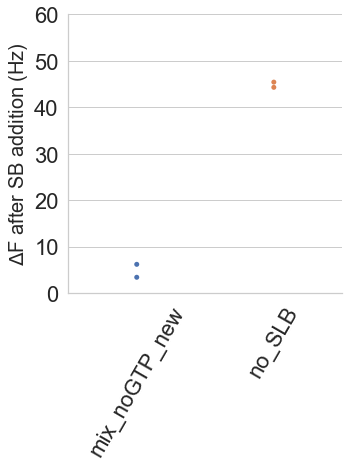

In [73]:
def end_result(inp):
    result = []
    for i in inp: 
        da = pd.read_table(i.split(";")[0], decimal=',', sep='\t', lineterminator='\n')
        if i.split(";")[0][-20:-4] == "20220531_8_noSLB":
            da = da.set_axis(['Time', 'F5', 'D5', 'F7', 'D7', 'F9', 'D9', "Meas.Temp.Time", "Tact"], axis=1, inplace=False)
        else:
            da = da.set_axis(['Time', 'F3', 'D3', 'F5', 'D5', 'F7', 'D7', 'F9', 'D9', 'F11', 'D13', "Meas.Temp.Time", "Tact"], axis=1, inplace=False)
        da = da.drop(["Meas.Temp.Time", "Tact"], axis=1)
        da= da.dropna()
        da2=da.astype(float)
        da2.Time=da2.Time/60
        T=int(i.split(";")[1])
        da2.Time=da2.Time-find_nearest(da2.Time,T)
        da2.F7=da2.F7-float(da2.F7[da2.Time==0.0])
        da2.D7=da2.D7-float(da2.D7[da2.Time==0.0])

        da2=da2.set_index('Time')

        data = da2.F7[(da2.index>=0)]
        print((data[data.index[-100:-1]].mean(axis=0)*-1))
        result.append((data[data.index[-100:-1]].mean(axis=0)*-1))
    return (result)
        

pip_stored_GTP = [path4+file41+";45;40", path5+file53+";40;40",path6+file61+";38;20", path6+file62+";38;20", path6+file63+";25;39"]
pip_GTP = [path6+file64+";25;39", path6+file65+";25;39", path7+file73+";20;42", path7+file74+";20;42"]
pip_noGTP = [path4+file42+";45;40", path5+file54+";40;40",path6+file66+";38;20", path6+file67+";38;20", path7+file77+";20;42"]
mix_GTP = [path8+file81+";40;45", path8+file82+";40;45", path8+file84+";30;44", path8+file85+";30;44",
           path8+file88+";25;39", path8+file89+";25;29"]
mix_noGTP = [path8+file83+";40;45", path8+file86+";30;44", path8+file87+";30;44", path8+file810+";25;39"]
mix_noGTP_new = [path15+file155+";21;30", path15+file156+";21;30"]
no_SLB = [path15+file157+";21;30", path15+file158+";21;30"]
        
# GTP = [path4+file41+";45;40", path5+file53+";40;40", path6+file64+";25;39", path6+file65+";25;39", path7+file73+";20;42",
#        path7+file74+";20;42"]
# noGTP = [path4+file42+";45;40", path5+file54+";40;40",path6+file66+";38;20", path6+file67+";38;20", path7+file77+";20;42"]
# GTP_spin = [path7+file71+";28;35", path7+file72+";28;35"]
# noGTP_spin = [path7+file75+";28;35", path7+file76+";28;35"]

results = {}
# results["PIP_fresh_GTP"] = end_result(pip_GTP)
# results["PIP_stored_GTP"] = end_result(pip_stored_GTP)
# results["PIP_noGTP"] = end_result(pip_noGTP)
# results["mix_GTP"] = end_result(mix_GTP)
# results["mix_noGTP"] = end_result(mix_noGTP)
results["mix_noGTP_new"] = end_result(mix_noGTP_new)
results["no_SLB"] = end_result(no_SLB)
results2 = []

# #finish --> make dataframe as for dataframes for R
# for i in lists:
#     for j in end_result(i):
#         print (a)

df=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in results.items() ]))
pl= 0
pl = sns.catplot(jitter=False,data=df, height=5, aspect=1)
plt.ylabel(ylabel = "$\Delta$F after SB addition (Hz)", fontsize = 20)
sns.set_theme(style = "whitegrid", font_scale= 2) #
pl.set_xticklabels( rotation=60)
pl.set(ylim=(0, 60))

pl.savefig(r"M:\tnw\bn\gk\GL\Results\QCM-D\F_after_SB.png", dpi=100)

In [91]:
results

{'PIP_fresh_GTP': [83.05989570155201,
  6.000706160074804,
  89.09910799954689,
  75.33672928530716],
 'PIP_stored_GTP': [36.77775965926674,
  0.6469160735936504,
  7.160170157192947,
  10.018568025885386,
  18.27610330902189],
 'PIP_noGTP': [26.120323643206703,
  0.45337319693403094,
  0.5305826253864718,
  -0.28936692907213396,
  62.76501789826565],
 'mix_GTP': [92.70696966518601,
  99.62385071961911,
  90.19335563682124,
  90.76411690760375,
  88.63900342092855,
  90.05490470649094],
 'mix_noGTP': [83.13019744834551,
  87.57519239893568,
  81.97957619399587,
  66.5456329696471]}

In [90]:
x_col = 'conditions'
y_col = 'max -$\Delta$F (Hz)'
ax = sns.stripplot(data=results)
# nobs = results.groupby.count()
# for i,n in enumerate(nobs):
#     ax.annotate(f'n={n}', xy=(i,0), xycoords=('data','axes fraction'), ha='center')

KeyError: 0

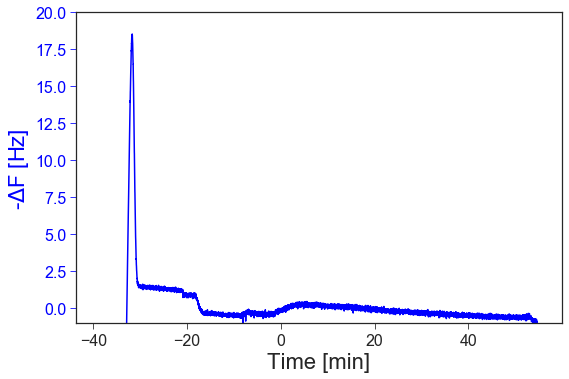

In [171]:
path=path1
file=file13
da = pd.read_table(path+file, decimal=',', sep='\t', lineterminator='\r')
da = da.set_axis(['Time', "F1", "D1",'F3', 'D3', 'F5', 'D5', 'F7', 'D7', 'F9', 'D9', 'F11', 'D13', "Meas.Temp.Time", "Tact"], axis=1, inplace=False)
da2=da.astype(float)
da2.Time=da2.Time/60
T=39
da2.Time=da2.Time-find_nearest(da2.Time,T)
da2.F7=da2.F7-float(da2.F7[da2.Time==0.0])
da2.F7=da2.F7*-1
da2=da2.set_index('Time')


fig,ax=plt.subplots()
da2.F7.plot(ax=ax,color="b",legend=None)
box = ax.get_position()
ax.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
#ax.legend(loc='center left',bbox_to_anchor=(0.05,0.9),frameon=False)
#ax2.legend(loc='center left',bbox_to_anchor=(0.05,0.8),frameon=False)
ax.tick_params(axis='y', labelsize=16,colors="b")
ax.tick_params(axis='x', labelsize=16)
ax.set_ylabel(r'-$\Delta$F [Hz]', size=22,color="b")
plt.ylim([-1, 20])
# plt.xlim([0,27])
ax.set_xlabel('Time [min]', size=22)
# ax.set_ylim([-20,5])
# ax.set_xlim([86.5-86-2,150-86])
# ax2.set_ylim([-1,5])
plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
fig.set_size_inches(9, 6)
# fig.savefig(path+file[:-4]+"4"+".png", dpi=100)

In [49]:
fontP=FontProperties()
fontP.set_size('small')
blues=plt.get_cmap('Blues')
reds=plt.get_cmap('Reds')

In [36]:
table.loc[0, "F7"]

Time
-20.997744    23.960132
-20.981686    23.890257
-20.965472    23.958411
-20.949360    23.854344
-20.932514    23.933654
-20.916146    23.751059
-20.899675    23.793116
-20.883299    23.887944
-20.866920    23.893226
-20.850844    23.869545
-20.834813    23.794566
-20.818744    23.649900
-20.802512    23.789312
-20.786429    23.799767
-20.770037    23.698142
-20.754054    23.800495
-20.737811    23.699336
-20.721583    23.838436
-20.705139    23.727601
-20.688732    23.785506
-20.672638    23.835272
-20.656224    23.784897
-20.639914    23.793948
-20.623421    23.823859
-20.606996    23.779382
-20.590876    23.863855
-20.574701    23.748405
-20.558393    23.919771
-20.541992    23.823299
-20.525620    23.851563
                ...    
 40.979052    -3.363059
 40.995945    -3.367825
 41.012153    -3.424860
 41.028311    -3.490451
 41.044746    -3.348412
 41.060693    -3.345945
 41.077005    -3.370805
 41.093298    -3.415256
 41.109309    -3.419759
 41.125704    -3.387420
 41.142030 

In [14]:
table.loc[38,"F7"]

Time
-26.000837   -26.630370
-25.963948   -26.636617
-25.927128   -26.599086
-25.890195   -26.602929
-25.853193   -26.425825
-25.816307   -26.530135
-25.779467   -26.702016
-25.742538   -26.626818
-25.705536   -26.604239
-25.668546   -26.416255
-25.631589   -26.725683
-25.594587   -26.610409
-25.557673   -26.564300
-25.520730   -26.521844
-25.483837   -26.503784
-25.446945   -26.568306
-25.410164   -26.415920
-25.373250   -26.566394
-25.336319   -26.510688
-25.299311   -26.781120
-25.262332   -26.601890
-25.225450   -26.190083
-25.188558   -26.646734
-25.151485   -26.571175
-25.114544   -26.668262
-25.077654   -26.276024
-25.040706   -26.660032
-25.003782   -26.650257
-24.966968   -26.801957
-24.929966   -26.570203
                ...    
 67.748299     3.361635
 67.785708     3.131770
 67.822917     3.091610
 67.859869     3.126895
 67.897650     3.228397
 67.934728     3.145460
 67.972139     3.185159
 68.008834     3.087539
 68.046400     3.205702
 68.083842     3.149572
 68.121593 

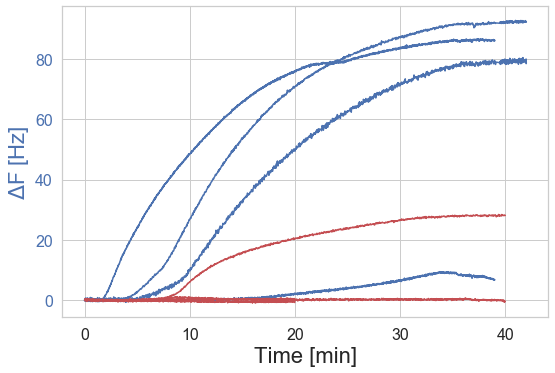

In [93]:
fig,ax=plt.subplots()
# ax2=ax.twinx()
# show = [51]
show = range(43, 51)
# print (list(show))
for i in show:
    D = table.loc[i,"D7"]
    F = table.loc[i,"F7"]
    duration = table.loc[i,"duration"]
#     print(duration)
#     D[(D.index>=2)].plot(ax=ax2,color="r",legend=None)
    if table.loc[i,"GTP"] == '+':
        F[(F.index>=0)&(F.index<=duration)].plot(ax=ax,color="b",legend=None, label = i)
    elif table.loc[i,"GTP"] == '-':
        F[(F.index>0)&(F.index<=duration)].plot(ax=ax,color="r",legend=None, label = i)
#     elif table.loc[i,"GTP"] == '~':
#         F[(F.index>0)].plot(ax=ax,color="y",legend=None, label = i)
    box = ax.get_position()
    ax.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
#     ax.legend(loc='center left',bbox_to_anchor=(0.05,0.9),frameon=False)
#     box = ax2.get_position()
#     ax2.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    #ax2.legend(loc='center left',bbox_to_anchor=(0.05,0.8),frameon=False)
    ax.tick_params(axis='y', labelsize=16,colors="b")
    ax.tick_params(axis='x', labelsize=16)
#     ax2.tick_params(axis='y', labelsize=16,colors="r")
    ax.set_ylabel(r'$\Delta$F [Hz]', size=22,color="b")
    ax.set_xlabel('Time [min]', size=22)
#     ax2.set_ylabel(r'$\Delta$D [$10^{-6}$]', size=22,color="r")
    # ax.set_ylim([-20,5])
#     ax.set_xlim([39,60])
    # ax2.set_ylim([-1,5])
    plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
    fig.set_size_inches(9, 6)
# fig.savefig(path+file[:-4]+"part"+".png", dpi=100)

In [95]:
table

,F7,D7,soft,date,lipids,septin,GTP,conc,duration,maxF,maxD,maxafterF,maxafterD
0,Time -26.000265 -25.099136 -25.982252 -25....,Time -26.000265 -1.021051 -25.982252 -1.02...,Time -26.000265 0.040681 -25.982252 0.04...,20220531,DOPC,hex,-,50,32,0.138891,0.0877692,3.99976,1.38833
1,Time -26.001192 -23.775233 -25.983310 -23....,Time -26.001192 0.050690 -25.983310 0.01...,Time -26.001192 -0.002132 -25.983310 -0.00...,20220531,DOPC,hex,-,50,32,0.374512,0.0156682,-1.43086,-0.639523
2,Time -25.982108 -24.908556 -25.964350 -24....,Time -25.982108 0.108198 -25.964350 0.07...,Time -25.982108 -0.004344 -25.964350 -0.00...,20220531,20%PS,hex,-,50,32,0.509247,0.16715,3.76729,1.37441
3,Time -25.982120 -23.481879 -25.964472 -23....,Time -25.982120 0.267298 -25.964472 0.23...,Time -25.982120 -0.011383 -25.964472 -0.01...,20220531,20%PS,hex,-,50,32,0.32126,0.26564,-5.25375,-1.87199
4,Time -24.503133 -24.086088 -24.487069 -23....,Time -24.503133 1.556273 -24.487069 1.66...,Time -24.503133 -0.064613 -24.487069 -0.07...,20220531,mix,hex,-,50,29,77.0264,7.18376,4.45552,1.56534
5,Time -24.996367 -23.553899 -24.980309 -23....,Time -24.996367 1.412673 -24.980309 1.37...,Time -24.996367 -0.059976 -24.980309 -0.05...,20220531,mix,hex,-,50,29,76.0689,7.53211,3.89882,1.67418
6,Time -26.492848 2.688809 -26.476844 2....,Time -26.492848 1.411001 -26.476844 1.41...,Time -26.492848 0.524768 -26.476844 0.54...,20220531,noSLB,hex,-,50,28,92.5715,3.15109,45.5889,2.89
7,Time -26.493433 4.657833 -26.477422 4....,Time -26.493433 0.989545 -26.477422 1.02...,Time -26.493433 0.212447 -26.477422 0.21...,20220531,noSLB,hex,-,50,28,90.1334,1.97198,44.8571,1.74806
8,Time -39.491565 -23.219263 -39.473544 -23....,Time -39.491565 1.258141 -39.473544 1.24...,Time -39.491565 -0.054185 -39.473544 -0.05...,20220531,mix,oct,+,17.3,35,23.8024,4.50362,6.29829,2.19192
9,Time -39.993898 -23.485324 -39.975803 -23....,Time -39.993898 1.324440 -39.975803 1.39...,Time -39.993898 -0.056394 -39.975803 -0.05...,20220531,mix,oct,+,50,35,92.6077,6.3257,6.95028,2.40501


In [293]:
# maxF = pd.DataFrame(columns=['hex+GTP', 'hex-GTP', 'oct+GTP', 'oct-GTP'])
# maxF['hex+GTP'] = table[(table.septin == "hex")&(table.lipids == "mix")&(table.GTP == "+")].loc[:,"maxF"]
# maxF['hex-GTP'] = table[(table.septin == "hex")&(table.lipids == "mix")&(table.GTP == "-")].loc[:,"maxF"]
# maxF['oct+GTP'] = table[(table.septin == "oct")&(table.lipids == "mix")&(table.GTP == "+")].loc[:,"maxF"]
# maxF['oct-GTP'] = table[(table.septin == "oct")&(table.lipids == "mix")&(table.GTP == "-")].loc[:,"maxF"]
# maxF

maxF_dict = { 'hex+GTP':list(table[(table.septin == "hex")&(table.lipids == "mix")&(table.GTP == "+")].loc[:,"maxF"]),
              'hex-GTP':list(table[(table.septin == "hex")&(table.lipids == "mix")&(table.GTP == "-")].loc[:,"maxF"]),
              'oct+GTP':list(table[(table.septin == "oct")&(table.lipids == "mix")&(table.GTP == "+")&(table.conc >= 50)].loc[:,"maxF"]),
              'oct-GTP':list(table[(table.septin == "oct")&(table.lipids == "mix")&(table.GTP == "-")].loc[:,"maxF"])
            }
maxF = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in maxF_dict.items() ]))

afterF_dict = { 'hex+GTP':list(table[(table.septin == "hex")&(table.lipids == "mix")&(table.GTP == "+")].loc[:,"maxafterF"]),
              'hex-GTP':list(table[(table.septin == "hex")&(table.lipids == "mix")&(table.GTP == "-")].loc[:,"maxafterF"]),
              'oct+GTP':list(table[(table.septin == "oct")&(table.lipids == "mix")&(table.GTP == "+")&(table.conc >= 50)].loc[:,"maxafterF"]),
              'oct-GTP':list(table[(table.septin == "oct")&(table.lipids == "mix")&(table.GTP == "-")].loc[:,"maxafterF"])
            }
afterF = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in afterF_dict.items() ]))

maxD_dict = { 'hex+GTP':list(table[(table.septin == "hex")&(table.lipids == "mix")&(table.GTP == "+")].loc[:,"maxD"]),
              'hex-GTP':list(table[(table.septin == "hex")&(table.lipids == "mix")&(table.GTP == "-")].loc[:,"maxD"]),
              'oct+GTP':list(table[(table.septin == "oct")&(table.lipids == "mix")&(table.GTP == "+")&(table.conc >= 50)].loc[:,"maxD"]),
              'oct-GTP':list(table[(table.septin == "oct")&(table.lipids == "mix")&(table.GTP == "-")].loc[:,"maxD"])
            }
maxD = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in maxD_dict.items() ]))

afterD_dict = { 'hex+GTP':list(table[(table.septin == "hex")&(table.lipids == "mix")&(table.GTP == "+")].loc[:,"maxafterD"]),
              'hex-GTP':list(table[(table.septin == "hex")&(table.lipids == "mix")&(table.GTP == "-")].loc[:,"maxafterD"]),
              'oct+GTP':list(table[(table.septin == "oct")&(table.lipids == "mix")&(table.GTP == "+")&(table.conc >= 50)].loc[:,"maxafterD"]),
              'oct-GTP':list(table[(table.septin == "oct")&(table.lipids == "mix")&(table.GTP == "-")].loc[:,"maxafterD"])
            }
afterD = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in afterD_dict.items() ]))
maxD

,hex+GTP,hex-GTP,oct+GTP,oct-GTP
0,5.306238,7.183763,6.325699,3.848184
1,5.288787,7.532112,6.572865,8.162297
2,4.478822,5.375265,8.426931,5.344505
3,4.671984,5.231769,8.578650,6.996365
4,4.938458,6.400990,6.909494,8.261703
5,4.990267,6.182914,8.716252,4.047679
6,5.599019,NaN,6.690190,NaN


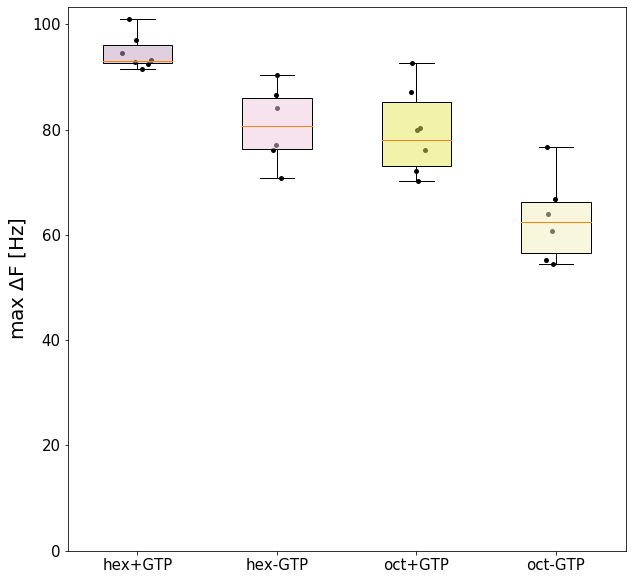

In [342]:
fig, ax = plt.subplots(figsize=(10,10)) 
labels = ['hex+GTP', 'hex-GTP', 'oct+GTP', 'oct-GTP']
box=ax.boxplot(maxF.dropna().values, patch_artist=True, showfliers = False, widths=([0.5]*4)) 
# ax.set_aspect(300)
plt.xticks(range(1,5),labels, rotation=0, fontsize=15)
plt.yticks(fontsize=15)
# plt.title('Septin Intensity/Inside Intensity at Peak Membrane Intensity',fontsize=20, y=1.01)
# I think you can remove the "experimental condition" in the bottom of the X axis
# plt.xlabel('Experimental Condition', fontsize=20)
ax.set_ylim(bottom=0)
plt.ylabel(r'max $\Delta$F [Hz]', fontsize=20)
#new format for the colors: [red, green, blue, transparency]. 
# For example, this is a 70% transparent pink: [1,0,0.5,0.3]
colors = [[195/255,161/255,191/255,0.5],
        [238/255,200/255,222/255,0.5],
        [233/255,230/255,89/255,0.5],
        [242/255,241/255,188/255,0.5]
         ]
for patch, color in zip(box['boxes'],colors):
    patch.set_facecolor(color)
for i,d in enumerate(maxF):
    y = maxF[d]
    x = np.random.normal(i+1, 0.04, len(y))
    plt.plot(x, y, 
             mfc = [[0/255,0/255,0/255,1],
            [0/255,0/255,0/255,1],
            [0/255,0/255,0/255,1],
            [0/255,0/255,0/255,1]
             ][i], mec=[1,1,1,0], ms=5, marker="o", linestyle="None")

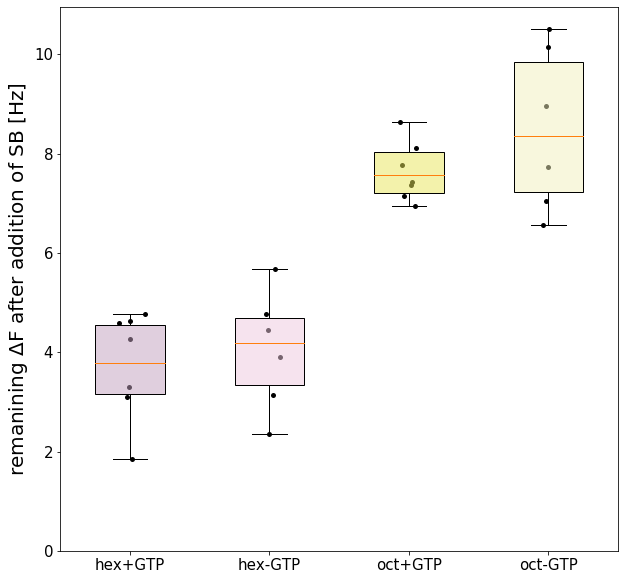

In [371]:
fig, ax = plt.subplots(figsize=(10,10)) 
labels = ['hex+GTP', 'hex-GTP', 'oct+GTP', 'oct-GTP']
box=ax.boxplot(afterF.dropna().values, patch_artist=True, showfliers = False, widths=([0.5]*4)) 
# ax.set_aspect(300)
plt.xticks(range(1,5),labels, rotation=0, fontsize=15)
plt.yticks(fontsize=15)
# plt.title('Septin Intensity/Inside Intensity at Peak Membrane Intensity',fontsize=20, y=1.01)
# I think you can remove the "experimental condition" in the bottom of the X axis
# plt.xlabel('Experimental Condition', fontsize=20)
ax.set_ylim(bottom=0)
plt.ylabel(r'remanining $\Delta$F after addition of SB [Hz]', fontsize=20)
#new format for the colors: [red, green, blue, transparency]. 
# For example, this is a 70% transparent pink: [1,0,0.5,0.3]
colors = [[195/255,161/255,191/255,0.5],
        [238/255,200/255,222/255,0.5],
        [233/255,230/255,89/255,0.5],
        [242/255,241/255,188/255,0.5]
         ]
for patch, color in zip(box['boxes'],colors):
    patch.set_facecolor(color)
for i,d in enumerate(afterF):
    y = afterF[d]
    x = np.random.normal(i+1, 0.04, len(y))
    plt.plot(x, y, 
             mfc = [[0/255,0/255,0/255,1],
            [0/255,0/255,0/255,1],
            [0/255,0/255,0/255,1],
            [0/255,0/255,0/255,1]
             ][i], mec=[1,1,1,0], ms=5, marker="o", linestyle="None")

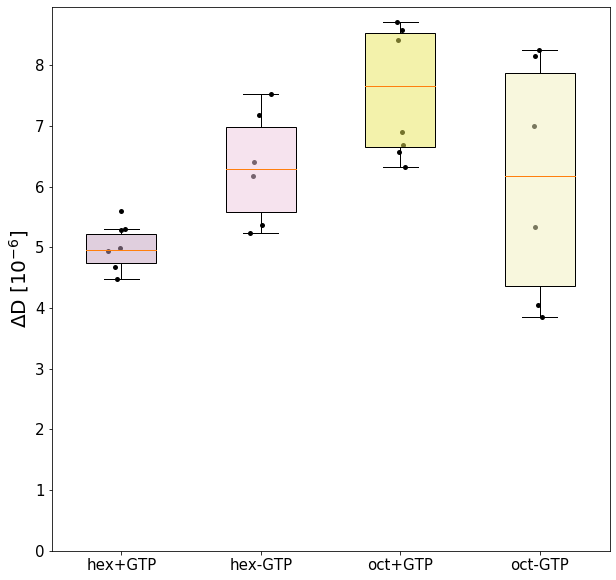

In [372]:
fig, ax = plt.subplots(figsize=(10,10)) 
labels = ['hex+GTP', 'hex-GTP', 'oct+GTP', 'oct-GTP']
box=ax.boxplot(maxD.dropna().values, patch_artist=True, showfliers = False, widths=([0.5]*4)) 
# ax.set_aspect(300)
plt.xticks(range(1,5),labels, rotation=0, fontsize=15)
plt.yticks(fontsize=15)
# plt.title('Septin Intensity/Inside Intensity at Peak Membrane Intensity',fontsize=20, y=1.01)
# I think you can remove the "experimental condition" in the bottom of the X axis
# plt.xlabel('Experimental Condition', fontsize=20)
ax.set_ylim(bottom=0)
plt.ylabel(r'$\Delta$D [$10^{-6}$]', fontsize=20)
#new format for the colors: [red, green, blue, transparency]. 
# For example, this is a 70% transparent pink: [1,0,0.5,0.3]
colors = [[195/255,161/255,191/255,0.5],
        [238/255,200/255,222/255,0.5],
        [233/255,230/255,89/255,0.5],
        [242/255,241/255,188/255,0.5]
         ]
for patch, color in zip(box['boxes'],colors):
    patch.set_facecolor(color)
for i,d in enumerate(maxD):
    y = maxD[d]
    x = np.random.normal(i+1, 0.04, len(y))
    plt.plot(x, y, 
             mfc = [[0/255,0/255,0/255,1],
            [0/255,0/255,0/255,1],
            [0/255,0/255,0/255,1],
            [0/255,0/255,0/255,1]
             ][i], mec=[1,1,1,0], ms=5, marker="o", linestyle="None")

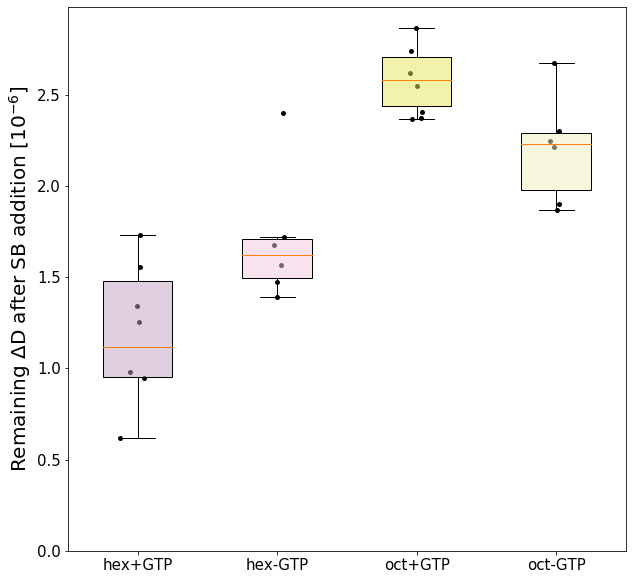

In [373]:
fig, ax = plt.subplots(figsize=(10,10)) 
labels = ['hex+GTP', 'hex-GTP', 'oct+GTP', 'oct-GTP']
box=ax.boxplot(afterD.dropna().values, patch_artist=True, showfliers = False, widths=([0.5]*4)) 
# ax.set_aspect(300)
plt.xticks(range(1,5),labels, rotation=0, fontsize=15)
plt.yticks(fontsize=15)
# plt.title('Septin Intensity/Inside Intensity at Peak Membrane Intensity',fontsize=20, y=1.01)
# I think you can remove the "experimental condition" in the bottom of the X axis
# plt.xlabel('Experimental Condition', fontsize=20)
ax.set_ylim(bottom=0)
plt.ylabel(r'Remaining $\Delta$D after SB addition [$10^{-6}$]', fontsize=20)
#new format for the colors: [red, green, blue, transparency]. 
# For example, this is a 70% transparent pink: [1,0,0.5,0.3]
colors = [[195/255,161/255,191/255,0.5],
        [238/255,200/255,222/255,0.5],
        [233/255,230/255,89/255,0.5],
        [242/255,241/255,188/255,0.5]
         ]
for patch, color in zip(box['boxes'],colors):
    patch.set_facecolor(color)
for i,d in enumerate(afterD):
    y = afterD[d]
    x = np.random.normal(i+1, 0.04, len(y))
    plt.plot(x, y, 
             mfc = [[0/255,0/255,0/255,1],
            [0/255,0/255,0/255,1],
            [0/255,0/255,0/255,1],
            [0/255,0/255,0/255,1]
             ][i], mec=[1,1,1,0], ms=5, marker="o", linestyle="None")

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


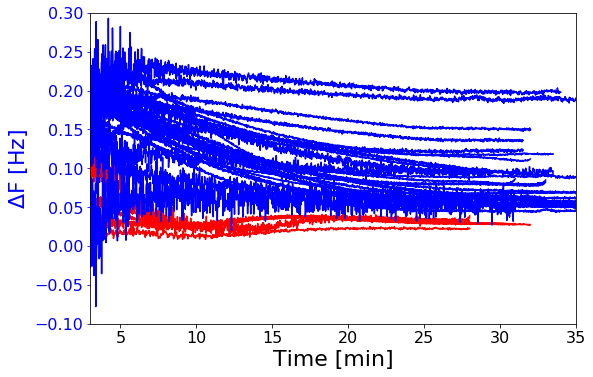

In [419]:
show=[]
for i in table.index:
    if table.iloc[i]['lipids'] == 'mix' or table.iloc[i]['lipids'] == 'noSLB' and table.iloc[i]['septin'] == 'hex':
        show.append(i)
print(show)
fig,ax=plt.subplots()
for i in show:
    soft = table.loc[i,"soft"]
    duration = table.loc[i,"duration"]
#     print(table.loc[i,"lipids"])
    if table.loc[i,"lipids"] == 'mix':
#         print('mix')
        soft[(soft.index>=0)&(soft.index<=duration)].plot(ax=ax,color="b",legend=None)
    elif table.loc[i,"lipids"] == 'noSLB':
        soft[(soft.index>0)&(soft.index<=duration)].plot(ax=ax, color="r",legend=None)
    box = ax.get_position()
    ax.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    #ax.legend(loc='center left',bbox_to_anchor=(0.05,0.9),frameon=False)
#     box = ax2.get_position()
#     ax2.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    #ax2.legend(loc='center left',bbox_to_anchor=(0.05,0.8),frameon=False)
    ax.tick_params(axis='y', labelsize=16,colors="b")
    ax.tick_params(axis='x', labelsize=16)
#     ax2.tick_params(axis='y', labelsize=16,colors="r")
    ax.set_ylabel(r'$\Delta$F [Hz]', size=22,color="b")
    ax.set_xlabel('Time [min]', size=22)
#     ax2.set_ylabel(r'$\Delta$D [$10^{-6}$]', size=22,color="r")
    # ax.set_ylim([-20,5])
    ax.set_xlim([3,35])
    ax.set_ylim([-0.1,0.3])
    plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
    fig.set_size_inches(9, 6)
# fig.savefig(path+file[:-4]+"part"+".png", dpi=100)

In [400]:
table.loc[15,'soft']

Time
-25.476648   -0.058800
-25.458411   -0.060380
-25.440453   -0.059700
-25.422220   -0.057398
-25.403975   -0.056341
-25.386036   -0.058941
-25.367955   -0.059367
-25.349758   -0.059460
-25.331568   -0.060975
-25.313329   -0.060209
-25.295321   -0.056986
-25.277182   -0.059496
-25.259154   -0.055975
-25.240894   -0.056841
-25.222661   -0.060935
-25.204409   -0.057929
-25.186680   -0.059826
-25.168598   -0.061473
-25.150434   -0.061190
-25.132195   -0.061205
-25.113914   -0.060855
-25.095944   -0.061037
-25.077671   -0.062730
-25.059258   -0.058559
-25.041141   -0.061834
-25.022970   -0.060502
-25.004867   -0.060776
-24.986836   -0.059151
-24.968820   -0.060408
-24.950689   -0.061167
                ...   
 53.345419    0.288537
 53.363874    0.286047
 53.383755    0.295175
 53.402271    0.289525
 53.421742    0.291118
 53.440614    0.295503
 53.460453    0.292944
 53.479183    0.296581
 53.498785    0.292588
 53.518539    0.299074
 53.537478    0.298015
 53.556899    0.282744
 53.57

C:\Programs\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Programs\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Programs\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Programs\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
C:\Programs\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Programs\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Programs\Anaconda3\lib\site-packages\matplotlib\cbook\__init__

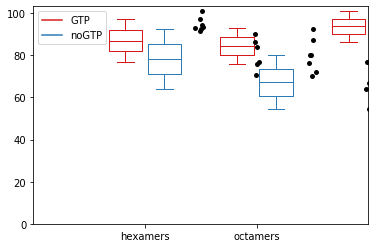

In [367]:
# # create a boxplot for two arrays separately,
# # the position specifies the location of the
# # particular box in the graph,
# # this can be changed as per your wish. Use width
# # to specify the width of the plot
# GTP = pd.DataFrame()
# GTP['hexamers'] = list(maxF['hex+GTP'])
# GTP['octamers'] = list(maxF['oct+GTP'])
# noGTP = pd.DataFrame()
# noGTP['hexamers'] = list(maxF['hex-GTP'])
# noGTP['octamers'] = list(maxF['oct-GTP'])

# GTP_plot = plt.boxplot(hexa, positions=np.array(np.arange(len(hexa)))*2.0-0.35, widths=0.6)
# noGTP_plot = plt.boxplot(octa, positions=np.array(np.arange(len(octa)))*2.0+0.35, widths=0.6)

# ticks = ['hexamers', 'octamers']
 
# # # each plot returns a dictionary, use plt.setp()
# # # function to assign the color code
# # # for all properties of the box plot of particular group
# # # use the below function to set color for particular group,
# # # by iterating over all properties of the box plot
# def define_box_properties(plot_name, color_code, label):
#     for k, v in plot_name.items():
# #         print(v)
#         plt.setp(plot_name.get(k), color=color_code)
         
#     # use plot function to draw a small line to name the legend.
#     plt.plot([], c=color_code, label=label)
#     plt.legend()
 
 
# # # setting colors for each groups
# define_box_properties(GTP_plot, '#D7191C', 'GTP')
# define_box_properties(noGTP_plot, '#2C7BB6', 'noGTP')
 
# # # set the x label values
# plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
 
# # # set the limit for x axis
# plt.xlim(-2, len(ticks)*2)
 
# # # set the limit for y axis
# plt.ylim(bottom = 0)
# # # set the title
# # plt.title('Grouped boxplot using matplotlib')

whiskers
caps
boxes
medians
fliers
means
whiskers
caps
boxes
medians
fliers
means


Text(0.5, 1.0, 'Grouped boxplot using matplotlib')

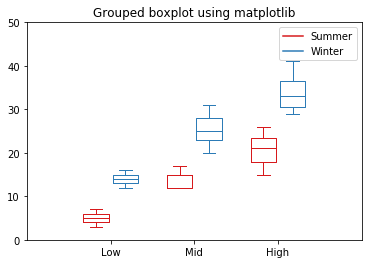

In [357]:
# import the matplotlib package
import matplotlib.pyplot as plt
 
# import the numpy package
import numpy as np
 
# create 2 - sample a 3-Dim array, that measures
# the summer and winter rain fall amount
summer_rain = [[3, 5, 7], [15, 17, 12, 12, 15],
               [26, 21, 15]]
winter_rain = [[16, 14, 12], [31, 20, 25, 23, 28],
               [29, 31, 35, 41]]
 
# the list named ticks, summarizes or groups
# the summer and winter rainfall as low, mid
# and high
ticks = ['Low', 'Mid', 'High']
 
# create a boxplot for two arrays separately,
# the position specifies the location of the
# particular box in the graph,
# this can be changed as per your wish. Use width
# to specify the width of the plot
summer_rain_plot = plt.boxplot(summer_rain,
                               positions=np.array(
    np.arange(len(summer_rain)))*2.0-0.35,
                               widths=0.6)
winter_rain_plot = plt.boxplot(winter_rain,
                               positions=np.array(
    np.arange(len(winter_rain)))*2.0+0.35,
                               widths=0.6)
 
# each plot returns a dictionary, use plt.setp()
# function to assign the color code
# for all properties of the box plot of particular group
# use the below function to set color for particular group,
# by iterating over all properties of the box plot
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        print(k)
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
 
 
# setting colors for each groups
define_box_properties(summer_rain_plot, '#D7191C', 'Summer')
define_box_properties(winter_rain_plot, '#2C7BB6', 'Winter')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
 
# set the limit for x axis
plt.xlim(-2, len(ticks)*2)
 
# set the limit for y axis
plt.ylim(0, 50)
 
# set the title
plt.title('Grouped boxplot using matplotlib')

In [355]:
list(maxF['hex+GTP'])

[97.03023539303717,
 92.75744213895493,
 100.91638711219028,
 92.49510824257251,
 93.27093670350544,
 91.45062139747736,
 94.60120280506581]

In [262]:
table[(table.septin == "hex")&(table.lipids == "mix")&(table.GTP == "-")].loc[:,"maxF"]

4     77.0264
5     76.0689
30    86.5153
33    90.3157
34    84.1681
37    70.8833
Name: maxF, dtype: object

In [388]:
table[(table.septin == "hex")&(table.lipids == "mix")]

,F7,D7,soft,date,lipids,septin,GTP,conc,duration
4,Time -24.503133 -24.086088 -24.487069 -23....,Time -24.503133 1.556273 -24.487069 1.66...,Time -24.503133 -0.064613 -24.487069 -0.07...,20220531,mix,hex,-,50,32
5,Time -24.996367 -23.553899 -24.980309 -23....,Time -24.996367 1.412673 -24.980309 1.37...,Time -24.996367 -0.059976 -24.980309 -0.05...,20220531,mix,hex,-,50,32
11,Time -39.975828 -23.977579 -39.957604 -24....,Time -39.975828 1.249914 -39.957604 1.25...,Time -39.975828 -0.052128 -39.957604 -0.05...,20220531,mix,hex,+,50,32
28,Time -20.000884 -27.999477 -19.987667 -27....,Time -20.000884 -0.590796 -19.987667 -0.72...,Time -20.000884 0.021100 -19.987667 0.02...,20220531,mix,hex,+,50,32
29,Time -19.987603 -26.055653 -19.974438 -26....,Time -19.987603 -0.232366 -19.974438 -0.24...,Time -19.987603 0.008918 -19.974438 0.00...,20220531,mix,hex,+,50,32
30,Time -19.987740 -26.442475 -19.974542 -26....,Time -19.987740 -0.461497 -19.974542 -0.37...,Time -19.987740 0.017453 -19.974542 0.01...,20220531,mix,hex,-,50,32
32,Time -24.996146 -22.945430 -24.978358 -23....,Time -24.996146 1.837411 -24.978358 1.89...,Time -24.996146 -0.080077 -24.978358 -0.08...,20220531,mix,hex,+,50,32
33,Time -24.996146 -21.578892 -24.978505 -21....,Time -24.996146 2.004167 -24.978505 2.00...,Time -24.996146 -0.092876 -24.978505 -0.09...,20220531,mix,hex,-,50,32
34,Time -24.977714 -22.304157 -24.960162 -22....,Time -24.977714 2.437715 -24.960162 2.51...,Time -24.977714 -0.109294 -24.960162 -0.11...,20220531,mix,hex,-,50,32
35,Time -24.990800 -23.140785 -24.973546 -22....,Time -24.990800 2.297817 -24.973546 2.39...,Time -24.990800 -0.099297 -24.973546 -0.10...,20220531,mix,hex,+,50,32


In [193]:
table.to_excel(r'M:\tnw\bn\gk\GL\Results\QCM-D\final_results\data.xlsx', index = False, header = False)

In [183]:
table

,F7,D7,soft,date,lipids,septin,GTP,conc,duration,maxF,maxD,maxafterF,maxafterD
0,Time -26.000265 -25.099136 -25.982252 -25....,Time -26.000265 -1.021051 -25.982252 -1.02...,Time -26.000265 0.040681 -25.982252 0.04...,20220531,DOPC,hex,-,50,32,0.138891,0.0877692,3.99976,1.38833
1,Time -26.001192 -23.775233 -25.983310 -23....,Time -26.001192 0.050690 -25.983310 0.01...,Time -26.001192 -0.002132 -25.983310 -0.00...,20220531,DOPC,hex,-,50,32,0.374512,0.0156682,-1.43086,-0.639523
2,Time -25.982108 -24.908556 -25.964350 -24....,Time -25.982108 0.108198 -25.964350 0.07...,Time -25.982108 -0.004344 -25.964350 -0.00...,20220531,20%PS,hex,-,50,32,0.509247,0.16715,3.76729,1.37441
3,Time -25.982120 -23.481879 -25.964472 -23....,Time -25.982120 0.267298 -25.964472 0.23...,Time -25.982120 -0.011383 -25.964472 -0.01...,20220531,20%PS,hex,-,50,32,0.32126,0.26564,-5.25375,-1.87199
4,Time -24.503133 -24.086088 -24.487069 -23....,Time -24.503133 1.556273 -24.487069 1.66...,Time -24.503133 -0.064613 -24.487069 -0.07...,20220531,mix,hex,-,50,29,77.0264,7.18376,4.45552,1.56534
5,Time -24.996367 -23.553899 -24.980309 -23....,Time -24.996367 1.412673 -24.980309 1.37...,Time -24.996367 -0.059976 -24.980309 -0.05...,20220531,mix,hex,-,50,29,76.0689,7.53211,3.89882,1.67418
6,Time -26.492848 2.688809 -26.476844 2....,Time -26.492848 1.411001 -26.476844 1.41...,Time -26.492848 0.524768 -26.476844 0.54...,20220531,noSLB,hex,-,50,28,92.5715,3.15109,45.5889,2.89
7,Time -26.493433 4.657833 -26.477422 4....,Time -26.493433 0.989545 -26.477422 1.02...,Time -26.493433 0.212447 -26.477422 0.21...,20220531,noSLB,hex,-,50,28,90.1334,1.97198,44.8571,1.74806
8,Time -39.491565 -23.219263 -39.473544 -23....,Time -39.491565 1.258141 -39.473544 1.24...,Time -39.491565 -0.054185 -39.473544 -0.05...,20220531,mix,oct,+,17.3,35,23.8024,4.50362,6.29829,2.19192
9,Time -39.993898 -23.485324 -39.975803 -23....,Time -39.993898 1.324440 -39.975803 1.39...,Time -39.993898 -0.056394 -39.975803 -0.05...,20220531,mix,oct,+,50,35,92.6077,6.3257,6.95028,2.40501


In [314]:
list(table[(table.septin == "oct")&(table.lipids == "mix")&(table.conc >=50)].index)
# group = table[(table.septin == "oct")&(table.lipids == "mix")].groupby("GTP")
# plt.plot(group["+"], group["-"])

[9, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27]

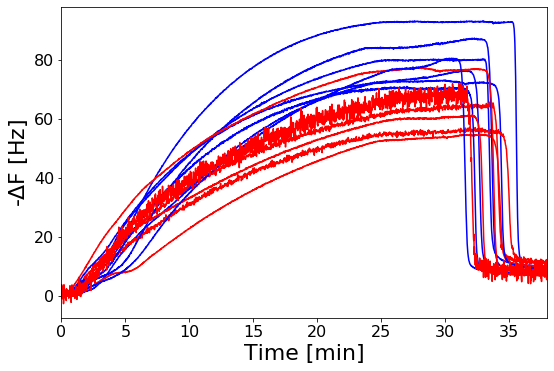

In [390]:
fig,ax=plt.subplots()
# ax2=ax.twinx()
show = list(table[(table.septin == "oct")&(table.lipids == "mix")&(table.conc >=50)].index)
for i in show:
    D = table.loc[i,"D7"]
    F = table.loc[i,"F7"]
    duration = table.loc[0,"duration"]
#     print(duration)
#     D[(D.index>=2)].plot(ax=ax2,color="r",legend=None)
    if table.loc[i,"GTP"] == '+':
        F[(F.index>=0)].plot(ax=ax,color="b",legend=None)
    elif table.loc[i,"GTP"] == '-':
        F[(F.index>=0)].plot(ax=ax,color="r",legend=None)
    box = ax.get_position()
    ax.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    #ax.legend(loc='center left',bbox_to_anchor=(0.05,0.9),frameon=False)
    box = ax2.get_position()
#     ax2.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    #ax2.legend(loc='center left',bbox_to_anchor=(0.05,0.8),frameon=False)
    ax.tick_params(axis='y', labelsize=16)
    ax.tick_params(axis='x', labelsize=16)
#     ax2.tick_params(axis='y', labelsize=16,colors="r")
    ax.set_ylabel(r'-$\Delta$F [Hz]', size=22)
    ax.set_xlabel('Time [min]', size=22)
#     ax2.set_ylabel(r'$\Delta$D [$10^{-6}$]', size=22,color="r")
    # ax.set_ylim([-20,5])
    ax.set_xlim([0,38])
    # ax2.set_ylim([-1,5])
    plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
    fig.set_size_inches(9, 6)
# fig.savefig(path+file[:-4]+"part"+".png", dpi=100)

In [399]:
soft = table.loc[15,"soft"]
soft
# fig,ax=plt.subplots()
# duration = table.loc[15,"duration"]

# print(duration)
# soft[(soft.index>=0) & (soft.index<=duration)].plot(ax=ax,legend=None)
# box = ax.get_position()
# ax.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
# ax.tick_params(axis='y', labelsize=16)
# ax.tick_params(axis='x', labelsize=16)
# ax.set_ylabel(r'$\Delta$F [Hz]', size=22)
# ax.set_xlabel('Time [min]', size=22)
# # ax.set_ylim([-20,5])
# # ax.set_xlim([86.5-86-2,150-86])
# ax.set_ylim([0,1])
# plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
# fig.set_size_inches(9, 6)

Time
-25.476648   -0.058800
-25.458411   -0.060380
-25.440453   -0.059700
-25.422220   -0.057398
-25.403975   -0.056341
-25.386036   -0.058941
-25.367955   -0.059367
-25.349758   -0.059460
-25.331568   -0.060975
-25.313329   -0.060209
-25.295321   -0.056986
-25.277182   -0.059496
-25.259154   -0.055975
-25.240894   -0.056841
-25.222661   -0.060935
-25.204409   -0.057929
-25.186680   -0.059826
-25.168598   -0.061473
-25.150434   -0.061190
-25.132195   -0.061205
-25.113914   -0.060855
-25.095944   -0.061037
-25.077671   -0.062730
-25.059258   -0.058559
-25.041141   -0.061834
-25.022970   -0.060502
-25.004867   -0.060776
-24.986836   -0.059151
-24.968820   -0.060408
-24.950689   -0.061167
                ...   
 53.345419    0.288537
 53.363874    0.286047
 53.383755    0.295175
 53.402271    0.289525
 53.421742    0.291118
 53.440614    0.295503
 53.460453    0.292944
 53.479183    0.296581
 53.498785    0.292588
 53.518539    0.299074
 53.537478    0.298015
 53.556899    0.282744
 53.57

[Int64Index([11, 28, 29, 31, 32, 35, 36], dtype='int64'),
 Int64Index([9, 12, 14, 20, 22, 24, 26], dtype='int64'),
 Int64Index([4, 5, 30, 33, 34, 37], dtype='int64'),
 Int64Index([13, 15, 21, 23, 25, 27], dtype='int64')]

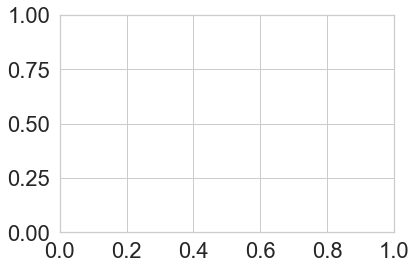

In [149]:
fig,ax=plt.subplots()
df2 = table[(table.lipids == "mix")&(table.conc >=50)].groupby(['GTP', 'septin'], axis=0.5)
df2['maxF'].get_group(('+', 'hex'))
# df2.groups.items()
plot_data = [data for name, data in df2.groups.items()]
plot_data
# sns.boxplot(column='maxF', rot=45, fontsize=12, figsize=(8,10), subplots = False) 

# df2.boxplot(column='maxF', rot=45, fontsize=12, figsize=(8,10), subplots = False) 

C:\Users\gcastrolinares\AppData\Local\Temp\ipykernel_4376\1105508435.py:12: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  x2 = table.loc[i, "F7"][0:duration]


Text(0.5, 0, 'Time (min)')

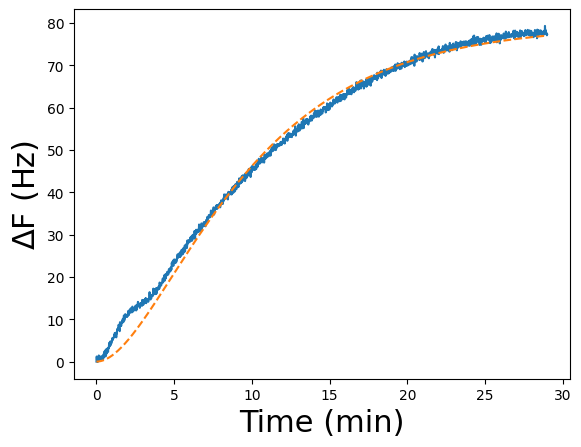

In [17]:
from scipy.optimize import curve_fit
# [4, 30, 28, 36]

use = [28, 4]
def FitFunction(time,N_0,t_c):
        return N_0*(1-np.exp(-time/t_c))**2
fig,ax=plt.subplots()
for i in use:
    p0=[1,0.1]

    duration = table.loc[i,"duration"]
    x2 = table.loc[i, "F7"][0:duration]
    y = x2.index  

    N_0,t_c=curve_fit(FitFunction,y,x2,p0)[0]
    
    
    
    
ax.plot(y,x2)
    # plt.plot(y,d2)
t_plot=np.linspace(0,duration,len(y))
ax.plot(t_plot,FitFunction(t_plot,N_0,t_c),"--")
ax.set_ylabel(r'$\Delta$F (Hz)', size=22)
ax.set_xlabel('Time (min)', size=22)
#     fig.savefig(r"V:\tnw\bn\gk\GL\Results\QCM-D\Summary for Ralf"+r"\fit_hex"+
#             "-".join(str(e) for e in use)+".png", dpi=300)
    # plt.set_xlim([0,10])
#     print(N_0, t_c)
#     print((1-np.exp(-1))**2)

In [54]:
error_fit = np.sqrt(np.mean((x2-FitFunction(t_plot,N_0,t_c))**2))
error_fit


1.971367754838065

In [231]:
show = list(table[(table.septin == "hex")&(table.lipids == "mix")&(table.conc >=50)&(table.GTP =="+")].index)
show

[11, 28, 29, 31, 32, 35, 36]

In [110]:
print((1-np.exp(-(-np.log(1-np.sqrt(0.5)))))**2)

#multiply t by (-np.log(1-np.sqrt(0.5))) for 50%

0.5000000000000001


[6, 7, 16, 17, 18, 19]


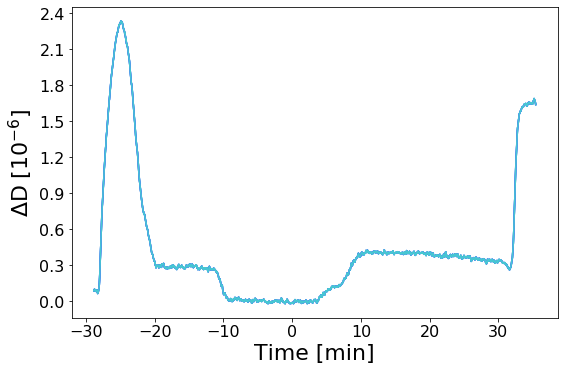

In [153]:
####Figure 2 - D ####
# '#47c6d2ff', '#5471ffff'
show = list(table[(table.septin == "hex")&(table.lipids == "noSLB")&(table.conc >=50)].index)
print(show)

fig,ax=plt.subplots()
# da2.D7[(da2.index<=0)].plot(ax=ax2,legend=None)
for i in show:
    F = table.loc[i, "F7"]
    if table.loc[i, "GTP"] == "+":
        D.rolling(10).mean().plot(ax=ax,color="#5471ffff",legend=None)
    if table.loc[i, "GTP"] == "-":
        D.rolling(10).mean().plot(ax=ax,color="#47c6d2ff",legend=None)
    box = ax.get_position()
    ax.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    ax.tick_params(axis='y', labelsize=16)
    ax.tick_params(axis='x', labelsize=16)
    ax.set_ylabel(r'$\Delta$D [$10^{-6}$]', size=22)
    ax.set_xlabel('Time [min]', size=22)
    ax.yaxis.set_major_locator(MaxNLocator(9)) 
#     ax.set_ylim([0,10])
#     ax.set_xlim([0,50])
#     ax2.set_ylim([-1,1])
    plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
    fig.set_size_inches(9, 6)
# fig.savefig(r"V:\tnw\bn\gk\GL\Papers\2022 - Membrane with Felix and Djim\Figures\Fig_2"+"\GTP_hex_D_"+
#             "-".join(str(e) for e in show)+".png", dpi=300)

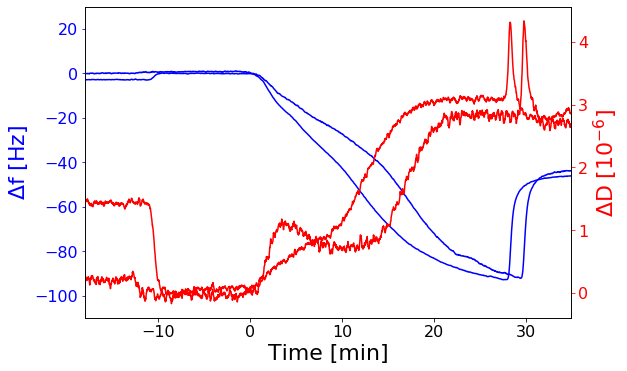

In [160]:
show = [6,18] #hex
show


fig,ax=plt.subplots()
ax2=ax.twinx()
# da2.D7[(da2.index<=0)].plot(ax=ax2,legend=None)
for i in show:
    table.loc[i, "D7"].rolling(10).mean().plot(ax=ax2,color="r",legend=None)
    (table.loc[i, "F7"]*-1).rolling(10).mean().plot(ax=ax,color="b",legend=None)
    box = ax.get_position()
    ax.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    box = ax2.get_position()
    ax2.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    ax.tick_params(axis='y', labelsize=16,colors="b")
    ax.tick_params(axis='x', labelsize=16)
    ax2.tick_params(axis='y', labelsize=16,colors="r")
    ax.set_ylabel(r'$\Delta$f [Hz]', size=22,color="b")
    ax.set_xlabel('Time [min]', size=22)
    ax2.set_ylabel(r'$\Delta$D [$10^{-6}$]', size=22,color="r")
    ax.yaxis.set_major_locator(MaxNLocator(9)) 
    ax.set_ylim([-110,30])
    ax.set_xlim([min(table.loc[i, "D7"].index),max(table.loc[i, "D7"].index)])
#     ax2.set_ylim([-1,1])
    plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
    fig.set_size_inches(9, 6)
    fig.savefig(r"V:\tnw\bn\gk\GL\Results\QCM-D\Summary for Ralf"+r"\a"+
            "-".join(str(e) for e in show)+".png", dpi=300)

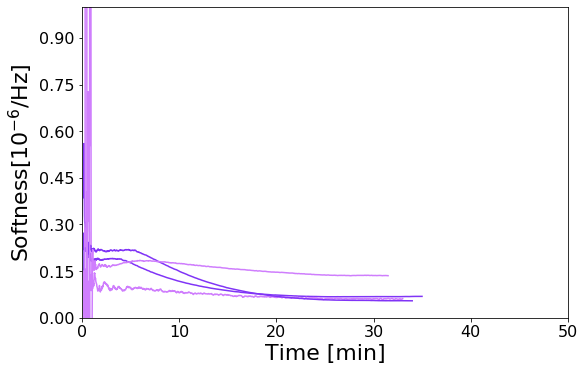

In [164]:
####Softness####

# show = [4, 30, 28, 36] #hex
show = [9, 13, 11, 25] #oct


fig,ax=plt.subplots()
# da2.D7[(da2.index<=0)].plot(ax=ax2,legend=None)
for i in show:
    D = table.loc[i, "soft"][0:table.loc[i,"duration"]]
    if table.loc[i, "GTP"] == "+":
        D[(D.index >= 0)].rolling(10).mean().plot(ax=ax,color="#8034f6ff",legend=None)
    if table.loc[i, "GTP"] == "-":
        D[(D.index >= 0)].rolling(10).mean().plot(ax=ax,color="#cf7efdff",legend=None)
    box = ax.get_position()
    ax.set_position([box.x0+box.width*0.12,box.y0+box.height*0.05,box.width*0.9,box.height*0.92])
    ax.tick_params(axis='y', labelsize=16)
    ax.tick_params(axis='x', labelsize=16)
    ax.set_ylabel(r'Softness[$10^{-6}$/Hz]', size=22)
    ax.set_xlabel('Time [min]', size=22)
    ax.yaxis.set_major_locator(MaxNLocator(9)) 
    ax.set_ylim([0,1])
    ax.set_xlim([0,50])
#     ax2.set_ylim([-1,1])
    plt.subplots_adjust(left=0.13, bottom=0.18, right=0.88, top=0.9, wspace=0.25, hspace=0.43)
    fig.set_size_inches(9, 6)
# fig.savefig(r"V:\tnw\bn\gk\GL\Papers\2022 - Membrane with Felix and Djim\Figures\Fig_2"+"\GTP_hex_D_"+
#             "-".join(str(e) for e in show)+".png", dpi=300)